In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
from vaneska.models import Gaussian
from vaneska.photometry import PSFPhotometry

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
from lightkurve import KeplerTargetPixelFile, LightCurve

In [5]:
tpf = KeplerTargetPixelFile.from_archive('kepler-10b', quarter=5)

INFO: Found cached file ./mastDownload/Kepler/kplr011904151_lc_Q111111110111011101/kplr011904151-2010174085026_lpd-targ.fits.gz with expected size 4685387. [astroquery.query]


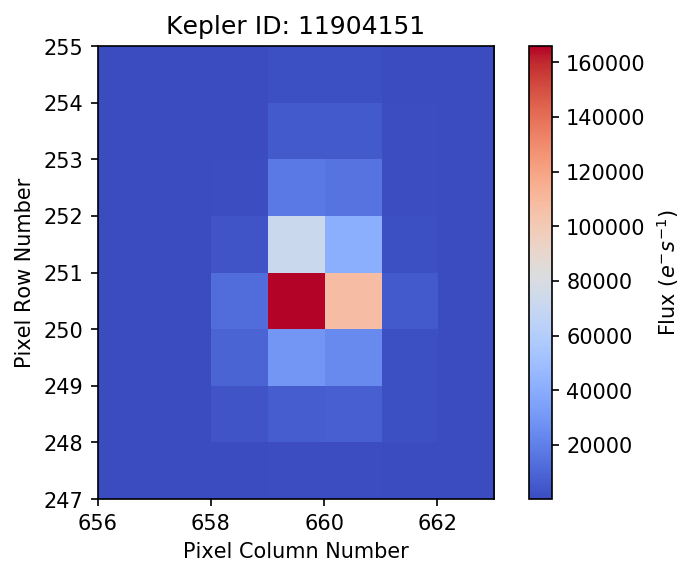

In [6]:
tpf.plot(scale=None, bkg=True, cmap='coolwarm')

In [7]:
gaussian = Gaussian(shape=tpf.shape[1:], col_ref=tpf.column, row_ref=tpf.row)

In [8]:
flux = tf.Variable(np.sum(tpf.flux[0]), dtype=tf.float64, name='flux')
col = tf.Variable(tpf.column+3.85, dtype=tf.float64, name='col')
row = tf.Variable(tpf.row+3.74, dtype=tf.float64, name='row')
a = tf.Variable(1., dtype=tf.float64, name='a')
b = tf.Variable(.0, dtype=tf.float64, name='b')
c = tf.Variable(1., dtype=tf.float64, name='c')
bkg = tf.Variable(np.mean(tpf.flux_bkg[0]), dtype=tf.float64, name='bkg')

In [9]:
mean = gaussian(flux, col, row, a, b, c) + bkg

In [10]:
data = tf.placeholder(dtype=tf.float64)

In [11]:
# Poisson likelihood
loss = tf.reduce_sum(tf.subtract(mean, tf.multiply(data, tf.log(mean))))

In [12]:
var_list=[flux, col, row, a, b, c, bkg]

In [13]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss=loss, var_list=var_list, method='TNC')

In [14]:
with tf.Session() as session:
    session.run(fetches=tf.global_variables_initializer())
    phot = PSFPhotometry(optimizer=optimizer)
    params = phot.fit(pixel_flux=tpf.flux + tpf.flux_bkg, data_placeholder=data,
                      var_list=var_list, session=session)

  0%|          | 0/4492 [00:00<?, ?it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474100.964149
  Number of iterations: 16
  Number of functions evaluations: 68


  0%|          | 1/4492 [00:00<13:45,  5.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473927.884956
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474403.581800
  Number of iterations: 8
  Number of functions evaluations: 43


  0%|          | 3/4492 [00:00<07:05, 10.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474917.689025
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475085.339656
  Number of iterations: 7
  Number of functions evaluations: 45


  0%|          | 5/4492 [00:00<05:50, 12.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474897.642035
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475006.542984
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475100.527352
  Number of iterations: 7
  Number of functions evaluations: 35


  0%|          | 8/4492 [00:00<04:41, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475497.459029
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475256.472671
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474411.054713
  Number of iterations: 4
  Number of functions evaluations: 15


  0%|          | 11/4492 [00:00<04:05, 18.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476108.895777
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475145.880229
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475150.715336
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471991.256086
  Number of iterations: 4
  Number of functions evaluations: 15


  0%|          | 15/4492 [00:00<03:34, 20.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475593.583737
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476010.134100
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476571.492595
  Number of iterations: 2
  Number of functions evaluations: 8


  0%|          | 18/4492 [00:00<03:24, 21.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476271.572674
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476095.933236
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476352.560139
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476198.300859
  Number of iterations: 9
  Number of functions evaluations: 51


  0%|          | 22/4492 [00:00<03:16, 22.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475414.983220
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475894.139134
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475915.703918
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476978.425006
  Number of iterations: 7
  Number of functions evaluations: 40


  1%|          | 26/4492 [00:01<03:08, 23.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476828.365245
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477158.542145
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477396.079797
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477843.877675
  Number of iterations: 6
  Number of functions evaluations: 26


  1%|          | 30/4492 [00:01<02:57, 25.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477537.319141
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477680.032699
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477735.066264
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477882.175494
  Number of iterations: 7
  Number of functions evaluations: 36


  1%|          | 34/4492 [00:01<02:53, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478115.873425
  Number of iterations: 9
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478434.591667
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478492.383910
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478076.579383
  Number of iterations: 4
  Number of functions evaluations: 15


  1%|          | 38/4492 [00:01<02:56, 25.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478543.399877
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478480.732001
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478241.729227
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478719.985239
  Number of iterations: 8
  Number of functions evaluations: 38


  1%|          | 42/4492 [00:01<02:52, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478649.248466
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479077.580253
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478721.810664
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479503.227472
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478826.068012
  Number of iterations: 7
  Number of functions evaluations: 25


  1%|          | 47/4492 [00:01<02:46, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479528.769843
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479690.360140
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479258.875617
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479018.577047
  Number of iterations: 3
  Number of functions evaluations: 11


  1%|          | 51/4492 [00:01<02:45, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479437.829348
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479141.553782
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479396.981037
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479895.410087
  Number of iterations: 11
  Number of functions evaluations: 49


  1%|          | 55/4492 [00:02<02:45, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479300.611056
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487101.640107
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479653.532408
  Number of iterations: 4
  Number of functions evaluations: 16


  1%|▏         | 58/4492 [00:02<02:44, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479618.489011
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479460.685035
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479452.175560
  Number of iterations: 7
  Number of functions evaluations: 28


  1%|▏         | 61/4492 [00:02<02:44, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479571.357190
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478794.029727
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478615.327162
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479157.878514
  Number of iterations: 6
  Number of functions evaluations: 31


  1%|▏         | 65/4492 [00:02<02:41, 27.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479775.313482
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480084.596439
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480094.896409
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480094.176344
  Number of iterations: 4
  Number of functions evaluations: 15


  2%|▏         | 69/4492 [00:02<02:41, 27.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479825.533383
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479976.802603
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479647.378035
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479729.574440
  Number of iterations: 7
  Number of functions evaluations: 31


  2%|▏         | 73/4492 [00:02<02:41, 27.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480173.941920
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479824.567802
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480605.768417
  Number of iterations: 7
  Number of functions evaluations: 35


  2%|▏         | 76/4492 [00:02<02:40, 27.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480463.323372
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480196.491060
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481589.899772
  Number of iterations: 7
  Number of functions evaluations: 36


  2%|▏         | 79/4492 [00:02<02:41, 27.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480647.475357
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481090.722994
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481057.360698
  Number of iterations: 6
  Number of functions evaluations: 31


  2%|▏         | 82/4492 [00:03<02:42, 27.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481286.033773
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481511.012885
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481271.412688
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480962.223701
  Number of iterations: 6
  Number of functions evaluations: 28


  2%|▏         | 86/4492 [00:03<02:40, 27.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481062.316593
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481418.048612
  Number of iterations: 9
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480891.547371
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481479.611556
  Number of iterations: 4
  Number of functions evaluations: 15


  2%|▏         | 90/4492 [00:03<02:38, 27.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481132.696322
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480632.273690
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481381.145526
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481188.856520
  Number of iterations: 3
  Number of functions evaluations: 11


  2%|▏         | 94/4492 [00:03<02:37, 27.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481457.112799
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481167.885502
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480952.974807
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481104.518358
  Number of iterations: 8
  Number of functions evaluations: 32


  2%|▏         | 98/4492 [00:03<02:36, 28.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481324.663363
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481079.312312
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480868.809751
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481616.890409
  Number of iterations: 5
  Number of functions evaluations: 30


  2%|▏         | 102/4492 [00:03<02:36, 28.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479704.297841
  Number of iterations: 5
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480412.414309
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480036.520854
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480909.329305
  Number of iterations: 9
  Number of functions evaluations: 51


  2%|▏         | 106/4492 [00:03<02:36, 28.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481448.718662
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481323.138968
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480575.415633
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480924.682269
  Number of iterations: 7
  Number of functions evaluations: 37


  2%|▏         | 110/4492 [00:03<02:35, 28.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481243.017476
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481494.175919
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481456.079230
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481619.749589
  Number of iterations: 8
  Number of functions evaluations: 35


  3%|▎         | 114/4492 [00:04<02:35, 28.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481221.713029
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482325.753380
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481538.398356
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480416.782279
  Number of iterations: 6
  Number of functions evaluations: 37


  3%|▎         | 118/4492 [00:04<02:35, 28.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480157.626438
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481412.460887
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474360.838574
  Number of iterations: 7
  Number of functions evaluations: 30


  3%|▎         | 121/4492 [00:04<02:35, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477767.412129
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478062.955212
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481358.136363
  Number of iterations: 4
  Number of functions evaluations: 15


  3%|▎         | 124/4492 [00:04<02:35, 28.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482103.361684
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481519.345341
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481478.134257
  Number of iterations: 2
  Number of functions evaluations: 8


  3%|▎         | 127/4492 [00:04<02:35, 28.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482194.352568
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482134.858642
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482243.437533
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482558.326719
  Number of iterations: 7
  Number of functions evaluations: 25


  3%|▎         | 131/4492 [00:04<02:35, 28.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481856.199182
  Number of iterations: 9
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482507.701712
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482048.871902
  Number of iterations: 6
  Number of functions evaluations: 23


  3%|▎         | 134/4492 [00:04<02:36, 27.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481541.957477
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482812.523040
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482087.551718
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482110.754928
  Number of iterations: 4
  Number of functions evaluations: 15


  3%|▎         | 138/4492 [00:04<02:35, 28.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482073.769702
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482143.153759
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482285.639276
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481953.891276
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482214.128054
  Number of iterations: 6
  Number of functions evaluations: 28


  3%|▎         | 143/4492 [00:05<02:32, 28.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481287.766602
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481090.863419
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481429.429211
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482346.090381
  Number of iterations: 5
  Number of functions evaluations: 24


  3%|▎         | 147/4492 [00:05<02:34, 28.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482147.791359
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481604.502785
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482255.762325
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482475.550890
  Number of iterations: 10
  Number of functions evaluations: 45


  3%|▎         | 151/4492 [00:05<02:35, 28.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482735.523931
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482594.618916
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482186.387154
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482179.493585
  Number of iterations: 7
  Number of functions evaluations: 36


  3%|▎         | 155/4492 [00:05<02:34, 28.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482951.209808
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482241.500796
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482700.894000
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482923.320001
  Number of iterations: 4
  Number of functions evaluations: 16


  4%|▎         | 159/4492 [00:05<02:33, 28.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482728.759187
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482749.540345
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482845.828087
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482945.673332
  Number of iterations: 8
  Number of functions evaluations: 30


  4%|▎         | 163/4492 [00:05<02:34, 28.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482527.323422
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482518.147745
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482543.197879
  Number of iterations: 10
  Number of functions evaluations: 48


  4%|▎         | 166/4492 [00:05<02:34, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482668.170417
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482852.464895
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482714.852020
  Number of iterations: 7
  Number of functions evaluations: 32


  4%|▍         | 169/4492 [00:06<02:34, 28.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482760.637814
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482823.457362
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482671.676369
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482982.816303
  Number of iterations: 6
  Number of functions evaluations: 29


  4%|▍         | 173/4492 [00:06<02:33, 28.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482856.922316
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482726.434754
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482899.842911
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483199.855625
  Number of iterations: 7
  Number of functions evaluations: 28


  4%|▍         | 177/4492 [00:06<02:32, 28.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482593.936488
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483679.822973
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483293.961814
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483064.590723
  Number of iterations: 10
  Number of functions evaluations: 43


  4%|▍         | 181/4492 [00:06<02:31, 28.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483941.221162
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482874.551052
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482617.450163
  Number of iterations: 5
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482052.223192
  Number of iterations: 3
  Number of functions evaluations: 11


  4%|▍         | 185/4492 [00:06<02:31, 28.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481660.069348
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482039.664065
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483221.958776
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483057.809676
  Number of iterations: 5
  Number of functions evaluations: 20


  4%|▍         | 189/4492 [00:06<02:30, 28.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483410.356295
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483435.123709
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483269.625847
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483233.061386
  Number of iterations: 8
  Number of functions evaluations: 40


  4%|▍         | 193/4492 [00:06<02:30, 28.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483848.255491
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483567.885287
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483513.463313
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483345.488174
  Number of iterations: 3
  Number of functions evaluations: 11


  4%|▍         | 197/4492 [00:06<02:30, 28.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484035.833995
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483962.895663
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484231.646567
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483461.126754
  Number of iterations: 9
  Number of functions evaluations: 37


  4%|▍         | 201/4492 [00:07<02:29, 28.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483514.351063
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483880.252145
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484298.838606
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484086.955575
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484159.358227
  Number of iterations: 4
  Number of functions evaluations: 15


  5%|▍         | 206/4492 [00:07<02:28, 28.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483416.263853
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484083.755042
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484064.455782
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484541.694121
  Number of iterations: 4
  Number of functions evaluations: 15


  5%|▍         | 210/4492 [00:07<02:27, 28.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483729.599250
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483935.176534
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484241.017557
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484084.291562
  Number of iterations: 7
  Number of functions evaluations: 30


  5%|▍         | 214/4492 [00:07<02:27, 28.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483433.724906
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484003.589503
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483728.979612
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483556.161631
  Number of iterations: 7
  Number of functions evaluations: 36


  5%|▍         | 218/4492 [00:07<02:27, 29.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484086.117871
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483509.919185
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484186.780896
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484344.310714
  Number of iterations: 7
  Number of functions evaluations: 31


  5%|▍         | 222/4492 [00:07<02:26, 29.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484072.519574
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483600.551543
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483293.926306
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482789.713610
  Number of iterations: 7
  Number of functions evaluations: 37


  5%|▌         | 226/4492 [00:07<02:26, 29.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483012.836893
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483419.787770
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484449.445450
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484204.592794
  Number of iterations: 6
  Number of functions evaluations: 25


  5%|▌         | 230/4492 [00:07<02:25, 29.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484030.503667
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484205.806018
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484486.766764
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483882.903367
  Number of iterations: 9
  Number of functions evaluations: 38


  5%|▌         | 234/4492 [00:08<02:26, 29.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483961.976806
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484235.560207
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484107.152425
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484158.755045
  Number of iterations: 9
  Number of functions evaluations: 45


  5%|▌         | 238/4492 [00:08<02:26, 29.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484163.663797
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484574.082479
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484132.380184
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484223.240974
  Number of iterations: 4
  Number of functions evaluations: 15


  5%|▌         | 242/4492 [00:08<02:25, 29.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484100.777392
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484372.807448
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483774.178043
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483939.332095
  Number of iterations: 4
  Number of functions evaluations: 15


  5%|▌         | 246/4492 [00:08<02:26, 29.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484122.646637
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484454.333587
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484182.102764
  Number of iterations: 7
  Number of functions evaluations: 34


  6%|▌         | 249/4492 [00:08<02:26, 28.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484288.607553
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484307.992620
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484717.469579
  Number of iterations: 4
  Number of functions evaluations: 14


  6%|▌         | 252/4492 [00:08<02:26, 28.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485286.331889
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484210.220115
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484601.196946
  Number of iterations: 6
  Number of functions evaluations: 26


  6%|▌         | 255/4492 [00:08<02:26, 28.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485139.069032
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484201.114672
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484793.930473
  Number of iterations: 7
  Number of functions evaluations: 35


  6%|▌         | 258/4492 [00:08<02:26, 28.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485040.284484
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484690.805792
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484472.170959
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484367.147265
  Number of iterations: 8
  Number of functions evaluations: 34


  6%|▌         | 262/4492 [00:09<02:26, 28.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484389.547047
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484232.829590
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483879.174939
  Number of iterations: 7
  Number of functions evaluations: 36


  6%|▌         | 265/4492 [00:09<02:26, 28.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483413.443933
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483765.145852
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483196.673977
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484929.075832
  Number of iterations: 9
  Number of functions evaluations: 32


  6%|▌         | 269/4492 [00:09<02:25, 28.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485223.748447
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484534.598607
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484880.991055
  Number of iterations: 8
  Number of functions evaluations: 37


  6%|▌         | 272/4492 [00:09<02:26, 28.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484998.455291
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484964.383400
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485449.520129
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485211.995866
  Number of iterations: 5
  Number of functions evaluations: 19


  6%|▌         | 276/4492 [00:09<02:25, 28.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485058.542328
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484887.034455
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485560.008548
  Number of iterations: 7
  Number of functions evaluations: 34


  6%|▌         | 279/4492 [00:09<02:25, 28.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485479.228966
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485017.798137
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485797.718067
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484765.905477
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485724.681680
  Number of iterations: 9
  Number of functions evaluations: 49


  6%|▋         | 284/4492 [00:09<02:25, 29.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485740.925697
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485303.172706
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485603.909505
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485231.499573
  Number of iterations: 2
  Number of functions evaluations: 8


  6%|▋         | 288/4492 [00:09<02:24, 29.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484924.696506
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485076.047416
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484861.768437
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484915.294565
  Number of iterations: 8
  Number of functions evaluations: 34


  7%|▋         | 292/4492 [00:10<02:24, 29.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485009.859781
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485157.112095
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485118.232780
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485182.973557
  Number of iterations: 2
  Number of functions evaluations: 8


  7%|▋         | 296/4492 [00:10<02:23, 29.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485328.584414
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485344.536999
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485438.244217
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484668.356489
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484910.712670
  Number of iterations: 4
  Number of functions evaluations: 16


  7%|▋         | 301/4492 [00:10<02:22, 29.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485229.162021
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484593.065395
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485319.560673
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485154.844196
  Number of iterations: 7
  Number of functions evaluations: 28


  7%|▋         | 305/4492 [00:10<02:23, 29.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484706.934875
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483601.798550
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484470.957463
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483987.463176
  Number of iterations: 4
  Number of functions evaluations: 15


  7%|▋         | 309/4492 [00:10<02:22, 29.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485535.183050
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484895.508225
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484929.027089
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485259.983642
  Number of iterations: 8
  Number of functions evaluations: 38


  7%|▋         | 313/4492 [00:10<02:22, 29.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484782.016363
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485332.176858
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485225.960262
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485155.684647
  Number of iterations: 6
  Number of functions evaluations: 32


  7%|▋         | 317/4492 [00:10<02:22, 29.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484888.366791
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485588.728819
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485603.140705
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485277.872319
  Number of iterations: 4
  Number of functions evaluations: 15


  7%|▋         | 321/4492 [00:10<02:22, 29.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485066.821477
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484859.740670
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485279.942287
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485336.904341
  Number of iterations: 6
  Number of functions evaluations: 31


  7%|▋         | 325/4492 [00:11<02:23, 29.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485800.885874
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485500.984357
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484982.819032
  Number of iterations: 6
  Number of functions evaluations: 25


  7%|▋         | 328/4492 [00:11<02:23, 29.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485323.552525
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485290.661230
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484920.262487
  Number of iterations: 6
  Number of functions evaluations: 30


  7%|▋         | 331/4492 [00:11<02:24, 28.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485261.983119
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485062.139349
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485107.388100
  Number of iterations: 6
  Number of functions evaluations: 34


  7%|▋         | 334/4492 [00:11<02:24, 28.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485214.039839
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484994.983672
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485017.965710
  Number of iterations: 9
  Number of functions evaluations: 40


  8%|▊         | 337/4492 [00:11<02:24, 28.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485626.563670
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484797.006851
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484816.922353
  Number of iterations: 9
  Number of functions evaluations: 44


  8%|▊         | 340/4492 [00:11<02:24, 28.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485849.170298
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484616.193725
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485348.924156
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484897.571113
  Number of iterations: 7
  Number of functions evaluations: 25


  8%|▊         | 344/4492 [00:11<02:24, 28.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484641.610334
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485021.588174
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483945.935205
  Number of iterations: 8
  Number of functions evaluations: 28


  8%|▊         | 347/4492 [00:12<02:24, 28.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484234.461602
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484211.035126
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485068.363969
  Number of iterations: 8
  Number of functions evaluations: 36


  8%|▊         | 350/4492 [00:12<02:24, 28.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484930.234547
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485211.809316
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485282.109658
  Number of iterations: 7
  Number of functions evaluations: 32


  8%|▊         | 353/4492 [00:12<02:25, 28.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484892.201438
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485506.065711
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484866.180000
  Number of iterations: 9
  Number of functions evaluations: 43


  8%|▊         | 356/4492 [00:12<02:25, 28.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485661.901777
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485271.120384
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484881.996737
  Number of iterations: 3
  Number of functions evaluations: 11


  8%|▊         | 359/4492 [00:12<02:25, 28.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485002.308412
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485305.692889
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485295.533505
  Number of iterations: 6
  Number of functions evaluations: 23


  8%|▊         | 362/4492 [00:12<02:26, 28.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485294.696948
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484903.966821
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484732.441555
  Number of iterations: 7
  Number of functions evaluations: 32


  8%|▊         | 365/4492 [00:12<02:25, 28.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485153.125402
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484848.109377
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485782.112625
  Number of iterations: 7
  Number of functions evaluations: 38


  8%|▊         | 368/4492 [00:13<02:26, 28.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484847.218533
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485093.583144
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485107.638250
  Number of iterations: 7
  Number of functions evaluations: 37


  8%|▊         | 371/4492 [00:13<02:26, 28.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485146.922235
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485263.429002
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485161.036308
  Number of iterations: 7
  Number of functions evaluations: 26


  8%|▊         | 374/4492 [00:13<02:26, 28.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485074.973004
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484676.035018
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485054.428875
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484868.397527
  Number of iterations: 5
  Number of functions evaluations: 21


  8%|▊         | 378/4492 [00:13<02:25, 28.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484767.473785
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484928.327690
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484682.536617
  Number of iterations: 8
  Number of functions evaluations: 39


  8%|▊         | 381/4492 [00:13<02:26, 28.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484597.934427
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484861.741523
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484592.200023
  Number of iterations: 5
  Number of functions evaluations: 19


  9%|▊         | 384/4492 [00:13<02:26, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484957.088618
  Number of iterations: 9
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484613.880945
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483121.681747
  Number of iterations: 8
  Number of functions evaluations: 39


  9%|▊         | 387/4492 [00:13<02:26, 27.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483445.373618
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483571.309364
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483875.892404
  Number of iterations: 7
  Number of functions evaluations: 34


  9%|▊         | 390/4492 [00:13<02:26, 27.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484502.150307
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484827.920641
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484919.083678
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485146.942012
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484711.448521
  Number of iterations: 10
  Number of functions evaluations: 51


  9%|▉         | 395/4492 [00:14<02:26, 27.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484557.955295
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484959.325581
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484630.563636
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484958.236342
  Number of iterations: 7
  Number of functions evaluations: 34


  9%|▉         | 399/4492 [00:14<02:26, 27.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485206.203869
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484985.190134
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484814.792278
  Number of iterations: 8
  Number of functions evaluations: 30


  9%|▉         | 402/4492 [00:14<02:26, 28.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485184.058124
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485179.260761
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485594.392771
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485355.261332
  Number of iterations: 6
  Number of functions evaluations: 25


  9%|▉         | 406/4492 [00:14<02:25, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484793.209149
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485277.513116
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485277.162532
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485140.354836
  Number of iterations: 9
  Number of functions evaluations: 53


  9%|▉         | 410/4492 [00:14<02:25, 28.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484958.485216
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485088.918591
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484715.071717
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484868.350935
  Number of iterations: 7
  Number of functions evaluations: 29


  9%|▉         | 414/4492 [00:14<02:25, 28.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485002.653742
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485245.916352
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485281.475916
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485012.971045
  Number of iterations: 2
  Number of functions evaluations: 8


  9%|▉         | 418/4492 [00:14<02:24, 28.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484739.929823
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485226.226122
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485041.249444
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485191.099645
  Number of iterations: 5
  Number of functions evaluations: 21


  9%|▉         | 422/4492 [00:15<02:24, 28.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485496.422491
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485134.529375
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485656.376143
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485083.021389
  Number of iterations: 3
  Number of functions evaluations: 11


  9%|▉         | 426/4492 [00:15<02:24, 28.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484589.706664
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484358.519018
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484737.454511
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483989.097401
  Number of iterations: 6
  Number of functions evaluations: 27


 10%|▉         | 430/4492 [00:15<02:24, 28.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485316.951612
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485520.491523
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485378.078484
  Number of iterations: 6
  Number of functions evaluations: 23


 10%|▉         | 433/4492 [00:15<02:24, 28.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485278.846327
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485091.514070
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484428.085880
  Number of iterations: 6
  Number of functions evaluations: 30


 10%|▉         | 436/4492 [00:15<02:24, 28.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484595.594135
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484807.960524
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484482.767911
  Number of iterations: 7
  Number of functions evaluations: 34


 10%|▉         | 439/4492 [00:15<02:24, 28.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485164.889281
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485089.906118
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484659.498321
  Number of iterations: 3
  Number of functions evaluations: 11


 10%|▉         | 442/4492 [00:15<02:24, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485256.629894
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484848.549739
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485361.355175
  Number of iterations: 2
  Number of functions evaluations: 8


 10%|▉         | 445/4492 [00:15<02:24, 28.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485120.900437
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485004.627709
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484922.175643
  Number of iterations: 7
  Number of functions evaluations: 37


 10%|▉         | 448/4492 [00:15<02:24, 28.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485135.685579
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484767.112590
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485308.520975
  Number of iterations: 7
  Number of functions evaluations: 38


 10%|█         | 451/4492 [00:16<02:24, 27.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485112.654658
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485063.724109
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485406.995059
  Number of iterations: 7
  Number of functions evaluations: 32


 10%|█         | 454/4492 [00:16<02:24, 27.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485218.268154
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485218.701801
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485110.941098
  Number of iterations: 4
  Number of functions evaluations: 15


 10%|█         | 457/4492 [00:16<02:24, 27.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485766.735496
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485086.667006
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485711.972980
  Number of iterations: 5
  Number of functions evaluations: 20


 10%|█         | 460/4492 [00:16<02:24, 27.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485881.819017
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485469.900810
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485409.308415
  Number of iterations: 7
  Number of functions evaluations: 27


 10%|█         | 463/4492 [00:16<02:24, 27.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484894.376074
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485318.194833
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485617.945875
  Number of iterations: 10
  Number of functions evaluations: 51


 10%|█         | 466/4492 [00:16<02:24, 27.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485159.646610
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484676.077584
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484489.333718
  Number of iterations: 4
  Number of functions evaluations: 15


 10%|█         | 469/4492 [00:16<02:24, 27.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483766.891784
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484559.355424
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485164.822707
  Number of iterations: 7
  Number of functions evaluations: 24


 11%|█         | 472/4492 [00:16<02:24, 27.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485387.496288
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485054.644412
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485169.426441
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484836.615991
  Number of iterations: 6
  Number of functions evaluations: 28


 11%|█         | 476/4492 [00:17<02:23, 27.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485155.550795
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485241.216578
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484790.818612
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485642.203199
  Number of iterations: 3
  Number of functions evaluations: 12


 11%|█         | 480/4492 [00:17<02:23, 27.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485324.391679
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485259.308988
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485716.133060
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485693.333148
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485053.398915
  Number of iterations: 8
  Number of functions evaluations: 35


 11%|█         | 485/4492 [00:17<02:22, 28.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485430.341772
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485650.668154
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485061.573771
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485448.862405
  Number of iterations: 4
  Number of functions evaluations: 14


 11%|█         | 489/4492 [00:17<02:22, 28.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485197.761949
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484810.469411
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484618.242213
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484996.230632
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485233.463621
  Number of iterations: 10
  Number of functions evaluations: 51


 11%|█         | 494/4492 [00:17<02:22, 28.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485929.413570
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484944.639885
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486113.219815
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485243.139902
  Number of iterations: 6
  Number of functions evaluations: 21


 11%|█         | 498/4492 [00:17<02:22, 28.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485860.263937
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485619.054928
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485241.773559
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485287.949021
  Number of iterations: 6
  Number of functions evaluations: 30


 11%|█         | 502/4492 [00:17<02:22, 28.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485351.876049
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485426.691133
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485492.543595
  Number of iterations: 7
  Number of functions evaluations: 37


 11%|█         | 505/4492 [00:17<02:21, 28.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484969.738494
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484990.045514
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484880.470600
  Number of iterations: 7
  Number of functions evaluations: 30


 11%|█▏        | 508/4492 [00:18<02:22, 28.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483989.635782
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484086.622387
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484279.533835
  Number of iterations: 2
  Number of functions evaluations: 8


 11%|█▏        | 511/4492 [00:18<02:22, 28.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484652.190564
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485576.313334
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485180.477104
  Number of iterations: 5
  Number of functions evaluations: 23


 11%|█▏        | 514/4492 [00:18<02:22, 28.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484624.995433
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484716.595195
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483622.759309
  Number of iterations: 7
  Number of functions evaluations: 29


 12%|█▏        | 517/4492 [00:18<02:22, 27.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484692.660915
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485220.096409
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484945.787947
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485431.380942
  Number of iterations: 4
  Number of functions evaluations: 14


 12%|█▏        | 521/4492 [00:18<02:21, 28.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485276.740669
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484826.200758
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479431.989198
  Number of iterations: 4
  Number of functions evaluations: 15


 12%|█▏        | 524/4492 [00:18<02:21, 27.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485126.805711
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484685.694269
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484565.220112
  Number of iterations: 8
  Number of functions evaluations: 40


 12%|█▏        | 527/4492 [00:18<02:22, 27.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485032.351526
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482490.439640
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484882.680562
  Number of iterations: 7
  Number of functions evaluations: 25


 12%|█▏        | 530/4492 [00:19<02:22, 27.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484943.371585
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485221.761323
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485152.349389
  Number of iterations: 3
  Number of functions evaluations: 11


 12%|█▏        | 533/4492 [00:19<02:22, 27.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484909.763551
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484920.801846
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485413.745594
  Number of iterations: 7
  Number of functions evaluations: 30


 12%|█▏        | 536/4492 [00:19<02:22, 27.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485311.544986
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484697.548460
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485526.210686
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484895.804011
  Number of iterations: 6
  Number of functions evaluations: 29


 12%|█▏        | 540/4492 [00:19<02:21, 27.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485456.375207
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485006.788826
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484744.788040
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485131.121818
  Number of iterations: 7
  Number of functions evaluations: 32


 12%|█▏        | 544/4492 [00:19<02:21, 27.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485467.869508
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485102.488869
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484924.956642
  Number of iterations: 7
  Number of functions evaluations: 37


 12%|█▏        | 547/4492 [00:19<02:21, 27.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485766.674903
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484673.731999
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483850.779376
  Number of iterations: 7
  Number of functions evaluations: 33


 12%|█▏        | 550/4492 [00:19<02:21, 27.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484166.634694
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487675.763837
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485424.274688
  Number of iterations: 7
  Number of functions evaluations: 27


 12%|█▏        | 553/4492 [00:19<02:22, 27.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485012.487989
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485182.961602
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485111.675473
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484920.730875
  Number of iterations: 3
  Number of functions evaluations: 11


 12%|█▏        | 557/4492 [00:20<02:21, 27.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484989.259527
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485369.764364
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485260.768009
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485010.475717
  Number of iterations: 4
  Number of functions evaluations: 14


 12%|█▏        | 561/4492 [00:20<02:21, 27.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485868.807298
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485598.284264
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485357.601969
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485668.620032
  Number of iterations: 3
  Number of functions evaluations: 12


 13%|█▎        | 565/4492 [00:20<02:21, 27.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485529.371186
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485483.225650
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485709.298377
  Number of iterations: 3
  Number of functions evaluations: 11


 13%|█▎        | 568/4492 [00:20<02:21, 27.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485750.168632
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484766.031205
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485622.094184
  Number of iterations: 8
  Number of functions evaluations: 35


 13%|█▎        | 571/4492 [00:20<02:21, 27.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485617.053429
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485653.095004
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486275.814607
  Number of iterations: 4
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485647.412572
  Number of iterations: 7
  Number of functions evaluations: 31


 13%|█▎        | 575/4492 [00:20<02:20, 27.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485190.028165
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485009.215034
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485701.198308
  Number of iterations: 6
  Number of functions evaluations: 31


 13%|█▎        | 578/4492 [00:20<02:20, 27.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486075.142061
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486122.377187
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484987.381589
  Number of iterations: 5
  Number of functions evaluations: 18


 13%|█▎        | 581/4492 [00:20<02:20, 27.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485417.612726
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485133.425470
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485659.160205
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485892.750544
  Number of iterations: 6
  Number of functions evaluations: 31


 13%|█▎        | 585/4492 [00:21<02:20, 27.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485272.594384
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485295.674546
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483557.424398
  Number of iterations: 6
  Number of functions evaluations: 27


 13%|█▎        | 588/4492 [00:21<02:20, 27.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483294.643708
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482364.259105
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481427.882761
  Number of iterations: 9
  Number of functions evaluations: 47


 13%|█▎        | 591/4492 [00:21<02:20, 27.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481511.261623
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482171.891219
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482563.787172
  Number of iterations: 7
  Number of functions evaluations: 35


 13%|█▎        | 594/4492 [00:21<02:20, 27.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482516.289113
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483023.217829
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482921.845384
  Number of iterations: 7
  Number of functions evaluations: 31


 13%|█▎        | 597/4492 [00:21<02:20, 27.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482265.652707
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483318.441816
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483463.382914
  Number of iterations: 11
  Number of functions evaluations: 50


 13%|█▎        | 600/4492 [00:21<02:20, 27.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484559.740150
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485654.055276
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485809.200159
  Number of iterations: 9
  Number of functions evaluations: 39


 13%|█▎        | 603/4492 [00:21<02:20, 27.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485631.112886
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486126.562799
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485871.095055
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485672.020181
  Number of iterations: 8
  Number of functions evaluations: 37


 14%|█▎        | 607/4492 [00:22<02:20, 27.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486251.203152
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486031.062164
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485976.387903
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485886.181613
  Number of iterations: 8
  Number of functions evaluations: 37


 14%|█▎        | 611/4492 [00:22<02:20, 27.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485845.423902
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485824.091737
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5486644.190775
  Number of iterations: 5
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485628.594873
  Number of iterations: 6
  Number of functions evaluations: 30


 14%|█▎        | 615/4492 [00:22<02:20, 27.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485787.481294
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485887.576443
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485331.958537
  Number of iterations: 6
  Number of functions evaluations: 25


 14%|█▍        | 618/4492 [00:22<02:20, 27.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486001.857938
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485686.172821
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485052.455820
  Number of iterations: 2
  Number of functions evaluations: 8


 14%|█▍        | 621/4492 [00:22<02:20, 27.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486079.798573
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485846.611529
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485612.821123
  Number of iterations: 8
  Number of functions evaluations: 51


 14%|█▍        | 624/4492 [00:22<02:20, 27.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485156.772376
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485865.845646
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485536.223820
  Number of iterations: 10
  Number of functions evaluations: 38


 14%|█▍        | 627/4492 [00:22<02:20, 27.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486310.744706
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485318.738593
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486053.837887
  Number of iterations: 6
  Number of functions evaluations: 28


 14%|█▍        | 630/4492 [00:23<02:21, 27.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485762.861878
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484204.926584
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484459.108043
  Number of iterations: 8
  Number of functions evaluations: 33


 14%|█▍        | 633/4492 [00:23<02:21, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484899.826301
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485437.529981
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485560.083917
  Number of iterations: 6
  Number of functions evaluations: 29


 14%|█▍        | 636/4492 [00:23<02:21, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485963.158678
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485791.055005
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485489.982288
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486141.934000
  Number of iterations: 6
  Number of functions evaluations: 28


 14%|█▍        | 640/4492 [00:23<02:20, 27.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485650.217298
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486125.543919
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485591.687468
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485710.225560
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485918.253964
  Number of iterations: 3
  Number of functions evaluations: 11


 14%|█▍        | 645/4492 [00:23<02:20, 27.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487174.879843
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485686.987331
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485954.604449
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485999.164640
  Number of iterations: 7
  Number of functions evaluations: 32


 14%|█▍        | 649/4492 [00:23<02:20, 27.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486024.193964
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486257.853423
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486051.101889
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485588.340011
  Number of iterations: 7
  Number of functions evaluations: 28


 15%|█▍        | 653/4492 [00:23<02:20, 27.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486283.393391
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485788.602281
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486183.629501
  Number of iterations: 7
  Number of functions evaluations: 34


 15%|█▍        | 656/4492 [00:24<02:20, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485593.634961
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485963.388362
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485399.881596
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486098.237048
  Number of iterations: 8
  Number of functions evaluations: 44


 15%|█▍        | 660/4492 [00:24<02:20, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486395.570554
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486226.663319
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485967.230026
  Number of iterations: 6
  Number of functions evaluations: 30


 15%|█▍        | 663/4492 [00:24<02:20, 27.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485749.007502
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485762.085670
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485714.885129
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486315.083891
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485173.418454
  Number of iterations: 3
  Number of functions evaluations: 11


 15%|█▍        | 668/4492 [00:24<02:19, 27.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485672.286639
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485762.082893
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484777.094909
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484492.615882
  Number of iterations: 8
  Number of functions evaluations: 40


 15%|█▍        | 672/4492 [00:24<02:19, 27.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484821.763468
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484505.004792
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485557.553913
  Number of iterations: 9
  Number of functions evaluations: 39


 15%|█▌        | 675/4492 [00:24<02:19, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485315.085561
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484879.558958
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485763.161516
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485105.221328
  Number of iterations: 8
  Number of functions evaluations: 41


 15%|█▌        | 679/4492 [00:24<02:19, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485236.622208
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485456.392811
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485805.144535
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485515.821141
  Number of iterations: 3
  Number of functions evaluations: 12


 15%|█▌        | 683/4492 [00:24<02:19, 27.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486090.386643
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485639.304858
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485565.013169
  Number of iterations: 7
  Number of functions evaluations: 39


 15%|█▌        | 686/4492 [00:25<02:19, 27.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485880.144779
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485624.363813
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485074.634149
  Number of iterations: 7
  Number of functions evaluations: 40


 15%|█▌        | 689/4492 [00:25<02:19, 27.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485582.480652
  Number of iterations: 9
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485830.403083
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485478.919271
  Number of iterations: 5
  Number of functions evaluations: 25


 15%|█▌        | 692/4492 [00:25<02:19, 27.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485674.678255
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485695.673130
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485982.188375
  Number of iterations: 4
  Number of functions evaluations: 15


 15%|█▌        | 695/4492 [00:25<02:19, 27.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485783.003133
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485354.670102
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485845.821600
  Number of iterations: 9
  Number of functions evaluations: 45


 16%|█▌        | 698/4492 [00:25<02:18, 27.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485957.314255
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485651.749723
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485948.961805
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485567.868231
  Number of iterations: 7
  Number of functions evaluations: 35


 16%|█▌        | 702/4492 [00:25<02:18, 27.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485744.547160
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485427.763169
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485868.626634
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485705.994061
  Number of iterations: 7
  Number of functions evaluations: 31


 16%|█▌        | 706/4492 [00:25<02:18, 27.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485937.338266
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485635.868045
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485360.779404
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485645.330355
  Number of iterations: 6
  Number of functions evaluations: 30


 16%|█▌        | 710/4492 [00:25<02:18, 27.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484964.619010
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485166.722650
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484652.374190
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484087.925927
  Number of iterations: 5
  Number of functions evaluations: 33


 16%|█▌        | 714/4492 [00:26<02:17, 27.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485001.971849
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485600.680726
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485462.601299
  Number of iterations: 6
  Number of functions evaluations: 34


 16%|█▌        | 717/4492 [00:26<02:17, 27.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485781.408180
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485728.233353
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484975.910368
  Number of iterations: 7
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485831.969071
  Number of iterations: 8
  Number of functions evaluations: 38


 16%|█▌        | 721/4492 [00:26<02:17, 27.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485843.979969
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485632.943545
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485526.706734
  Number of iterations: 6
  Number of functions evaluations: 23


 16%|█▌        | 724/4492 [00:26<02:17, 27.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486034.995644
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485136.036773
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485640.974741
  Number of iterations: 7
  Number of functions evaluations: 34


 16%|█▌        | 727/4492 [00:26<02:17, 27.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485428.316681
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485630.573012
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485839.006610
  Number of iterations: 8
  Number of functions evaluations: 49


 16%|█▋        | 730/4492 [00:26<02:17, 27.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485408.898644
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485564.401635
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485810.993168
  Number of iterations: 9
  Number of functions evaluations: 39


 16%|█▋        | 733/4492 [00:26<02:17, 27.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485248.061465
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485684.746412
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485551.996787
  Number of iterations: 7
  Number of functions evaluations: 34


 16%|█▋        | 736/4492 [00:27<02:17, 27.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485673.702073
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485490.373983
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485207.923008
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484749.288828
  Number of iterations: 4
  Number of functions evaluations: 15


 16%|█▋        | 740/4492 [00:27<02:17, 27.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485825.336993
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485953.424012
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485074.575651
  Number of iterations: 8
  Number of functions evaluations: 29


 17%|█▋        | 743/4492 [00:27<02:17, 27.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485781.377009
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485403.226624
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485049.158444
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485395.596507
  Number of iterations: 8
  Number of functions evaluations: 43


 17%|█▋        | 747/4492 [00:27<02:17, 27.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485298.578182
  Number of iterations: 13
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485476.174862
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485030.746365
  Number of iterations: 6
  Number of functions evaluations: 29


 17%|█▋        | 750/4492 [00:27<02:17, 27.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485207.690935
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485050.172545
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484568.359354
  Number of iterations: 6
  Number of functions evaluations: 28


 17%|█▋        | 753/4492 [00:27<02:17, 27.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483941.654381
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484188.962808
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484534.984154
  Number of iterations: 6
  Number of functions evaluations: 30


 17%|█▋        | 756/4492 [00:27<02:17, 27.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484836.585838
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485002.248423
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485518.828908
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484969.465966
  Number of iterations: 7
  Number of functions evaluations: 31


 17%|█▋        | 760/4492 [00:27<02:17, 27.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485490.066155
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485112.461871
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484803.896582
  Number of iterations: 2
  Number of functions evaluations: 8


 17%|█▋        | 763/4492 [00:28<02:17, 27.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485456.606835
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484854.771747
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484479.825528
  Number of iterations: 4
  Number of functions evaluations: 15


 17%|█▋        | 766/4492 [00:28<02:17, 27.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484716.913749
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484552.685998
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484074.309400
  Number of iterations: 9
  Number of functions evaluations: 41


 17%|█▋        | 769/4492 [00:28<02:17, 27.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485073.210916
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484871.414394
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485089.321885
  Number of iterations: 6
  Number of functions evaluations: 32


 17%|█▋        | 772/4492 [00:28<02:17, 27.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484707.353471
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484134.831854
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484501.935444
  Number of iterations: 9
  Number of functions evaluations: 45


 17%|█▋        | 775/4492 [00:28<02:17, 27.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484806.002115
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484688.428700
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484519.270715
  Number of iterations: 3
  Number of functions evaluations: 11


 17%|█▋        | 778/4492 [00:28<02:17, 27.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484632.782083
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484388.596646
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484230.547202
  Number of iterations: 6
  Number of functions evaluations: 24


 17%|█▋        | 781/4492 [00:28<02:17, 27.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484123.991620
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484505.847359
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484936.138156
  Number of iterations: 8
  Number of functions evaluations: 38


 17%|█▋        | 784/4492 [00:29<02:17, 27.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484430.729674
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484412.740537
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484572.778149
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483910.867997
  Number of iterations: 6
  Number of functions evaluations: 23


 18%|█▊        | 788/4492 [00:29<02:16, 27.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484242.807226
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484044.486975
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483546.503041
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484252.053967
  Number of iterations: 7
  Number of functions evaluations: 34


 18%|█▊        | 792/4492 [00:29<02:16, 27.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483764.983325
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483148.547969
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482910.185003
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483022.603424
  Number of iterations: 4
  Number of functions evaluations: 16


 18%|█▊        | 796/4492 [00:29<02:16, 27.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483955.325315
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483993.453022
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483869.314238
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483860.972190
  Number of iterations: 5
  Number of functions evaluations: 18


 18%|█▊        | 800/4492 [00:29<02:16, 27.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483673.534337
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483645.693190
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483414.074544
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483565.726737
  Number of iterations: 3
  Number of functions evaluations: 11


 18%|█▊        | 804/4492 [00:29<02:15, 27.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483778.770681
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484168.857773
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483099.395926
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483361.561027
  Number of iterations: 8
  Number of functions evaluations: 38


 18%|█▊        | 808/4492 [00:29<02:15, 27.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483182.855200
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483145.533876
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483370.615238
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483369.505836
  Number of iterations: 7
  Number of functions evaluations: 31


 18%|█▊        | 812/4492 [00:29<02:15, 27.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482935.610825
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483858.170738
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483424.143785
  Number of iterations: 6
  Number of functions evaluations: 27


 18%|█▊        | 815/4492 [00:30<02:15, 27.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483000.255736
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483484.823259
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483349.698664
  Number of iterations: 9
  Number of functions evaluations: 48


 18%|█▊        | 818/4492 [00:30<02:15, 27.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483811.424009
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483167.169959
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482614.059806
  Number of iterations: 7
  Number of functions evaluations: 35


 18%|█▊        | 821/4492 [00:30<02:15, 27.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483145.442583
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483111.814339
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483111.113589
  Number of iterations: 6
  Number of functions evaluations: 36


 18%|█▊        | 824/4492 [00:30<02:15, 27.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483081.192081
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483128.186615
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483442.434133
  Number of iterations: 8
  Number of functions evaluations: 31


 18%|█▊        | 827/4492 [00:30<02:15, 27.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483448.525436
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483088.271501
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482800.800530
  Number of iterations: 2
  Number of functions evaluations: 8


 18%|█▊        | 830/4492 [00:30<02:15, 27.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483442.668077
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483119.641016
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482772.230506
  Number of iterations: 7
  Number of functions evaluations: 35


 19%|█▊        | 833/4492 [00:30<02:15, 27.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482725.721370
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482080.331213
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481686.474302
  Number of iterations: 8
  Number of functions evaluations: 31


 19%|█▊        | 836/4492 [00:30<02:15, 27.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482230.922752
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482599.299609
  Number of iterations: 8
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483154.911439
  Number of iterations: 6
  Number of functions evaluations: 27


 19%|█▊        | 839/4492 [00:31<02:15, 27.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483149.298634
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482813.372890
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483207.746711
  Number of iterations: 2
  Number of functions evaluations: 8


 19%|█▊        | 842/4492 [00:31<02:15, 27.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482693.334157
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482473.018758
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483318.361901
  Number of iterations: 4
  Number of functions evaluations: 15


 19%|█▉        | 845/4492 [00:31<02:14, 27.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482310.599243
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482975.490419
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483115.022242
  Number of iterations: 3
  Number of functions evaluations: 11


 19%|█▉        | 848/4492 [00:31<02:15, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482836.092997
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482440.033865
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482720.616287
  Number of iterations: 4
  Number of functions evaluations: 15


 19%|█▉        | 851/4492 [00:31<02:15, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482733.175166
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482211.074704
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482660.135421
  Number of iterations: 6
  Number of functions evaluations: 27


 19%|█▉        | 854/4492 [00:31<02:15, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482796.732968
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482883.739390
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482418.380809
  Number of iterations: 6
  Number of functions evaluations: 23


 19%|█▉        | 857/4492 [00:31<02:14, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482611.650741
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482339.754081
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482408.901059
  Number of iterations: 6
  Number of functions evaluations: 29


 19%|█▉        | 860/4492 [00:31<02:14, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482998.857663
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482543.344599
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482083.661492
  Number of iterations: 9
  Number of functions evaluations: 30


 19%|█▉        | 863/4492 [00:32<02:14, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482365.347469
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482055.674777
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482575.209036
  Number of iterations: 7
  Number of functions evaluations: 40


 19%|█▉        | 866/4492 [00:32<02:14, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482910.381675
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482168.830029
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482074.005262
  Number of iterations: 5
  Number of functions evaluations: 18


 19%|█▉        | 869/4492 [00:32<02:14, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482544.643627
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481913.618478
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482468.824379
  Number of iterations: 8
  Number of functions evaluations: 36


 19%|█▉        | 872/4492 [00:32<02:14, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482741.523902
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481549.192514
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481649.210495
  Number of iterations: 9
  Number of functions evaluations: 49


 19%|█▉        | 875/4492 [00:32<02:14, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481209.966549
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481366.582561
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482034.382526
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481775.056929
  Number of iterations: 4
  Number of functions evaluations: 15


 20%|█▉        | 879/4492 [00:32<02:14, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482624.853069
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482159.265689
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482132.954886
  Number of iterations: 4
  Number of functions evaluations: 15


 20%|█▉        | 882/4492 [00:32<02:13, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482184.265210
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482031.345250
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481855.187148
  Number of iterations: 4
  Number of functions evaluations: 15


 20%|█▉        | 885/4492 [00:32<02:13, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482308.593364
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481952.031182
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481913.756220
  Number of iterations: 8
  Number of functions evaluations: 41


 20%|█▉        | 888/4492 [00:32<02:13, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481937.700472
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482243.091269
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482337.639564
  Number of iterations: 7
  Number of functions evaluations: 39


 20%|█▉        | 891/4492 [00:33<02:13, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482425.741099
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481860.534765
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482318.704836
  Number of iterations: 9
  Number of functions evaluations: 43


 20%|█▉        | 894/4492 [00:33<02:13, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481980.657337
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482229.598894
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482142.286959
  Number of iterations: 10
  Number of functions evaluations: 43


 20%|█▉        | 897/4492 [00:33<02:13, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481937.558596
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482389.600506
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482548.386385
  Number of iterations: 7
  Number of functions evaluations: 35


 20%|██        | 900/4492 [00:33<02:13, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481919.126829
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482228.885211
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481706.725036
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481419.692644
  Number of iterations: 2
  Number of functions evaluations: 8


 20%|██        | 904/4492 [00:33<02:13, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481913.585750
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482447.918147
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481725.134706
  Number of iterations: 6
  Number of functions evaluations: 26


 20%|██        | 907/4492 [00:33<02:13, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482067.664864
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481486.658287
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481852.296669
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482193.638068
  Number of iterations: 7
  Number of functions evaluations: 38


 20%|██        | 911/4492 [00:33<02:13, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481516.316478
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481827.312606
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5481033.655494
  Number of iterations: 7
  Number of functions evaluations: 29


 20%|██        | 914/4492 [00:33<02:12, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480869.343842
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480627.454006
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481114.045148
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481711.611717
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481784.832188
  Number of iterations: 5
  Number of functions evaluations: 19


 20%|██        | 919/4492 [00:34<02:12, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482050.918733
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481502.498084
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481806.120424
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482254.084480
  Number of iterations: 9
  Number of functions evaluations: 39


 21%|██        | 923/4492 [00:34<02:12, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481595.225534
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481560.101306
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482079.123741
  Number of iterations: 7
  Number of functions evaluations: 35


 21%|██        | 926/4492 [00:34<02:12, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481836.562864
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482128.204626
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482170.190596
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481632.339348
  Number of iterations: 8
  Number of functions evaluations: 39


 21%|██        | 930/4492 [00:34<02:12, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481400.939775
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481632.207762
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480928.739569
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481307.152939
  Number of iterations: 2
  Number of functions evaluations: 8


 21%|██        | 934/4492 [00:34<02:11, 26.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481295.725462
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481281.974719
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481477.639639
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481669.985317
  Number of iterations: 6
  Number of functions evaluations: 26


 21%|██        | 938/4492 [00:34<02:11, 26.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481659.604588
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476338.579869
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480577.542681
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480253.603259
  Number of iterations: 7
  Number of functions evaluations: 34


 21%|██        | 942/4492 [00:34<02:11, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479970.408175
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481003.754594
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481713.990223
  Number of iterations: 6
  Number of functions evaluations: 29


 21%|██        | 945/4492 [00:35<02:11, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481077.393153
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481117.791105
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481524.969652
  Number of iterations: 7
  Number of functions evaluations: 38


 21%|██        | 948/4492 [00:35<02:11, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480775.710452
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481192.357135
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481196.571958
  Number of iterations: 7
  Number of functions evaluations: 36


 21%|██        | 951/4492 [00:35<02:11, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481101.049567
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481210.222700
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480530.905318
  Number of iterations: 6
  Number of functions evaluations: 26


 21%|██        | 954/4492 [00:35<02:11, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480058.654817
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479615.407024
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480287.628300
  Number of iterations: 8
  Number of functions evaluations: 35


 21%|██▏       | 957/4492 [00:35<02:11, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480957.391808
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480797.193861
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481295.820828
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481034.811444
  Number of iterations: 7
  Number of functions evaluations: 36


 21%|██▏       | 961/4492 [00:35<02:11, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481001.700369
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480867.665062
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481192.461448
  Number of iterations: 10
  Number of functions evaluations: 45


 21%|██▏       | 964/4492 [00:35<02:11, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481023.621824
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480229.505477
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481279.449962
  Number of iterations: 7
  Number of functions evaluations: 30


 22%|██▏       | 967/4492 [00:35<02:11, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480907.577018
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480243.684302
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480779.978949
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480708.837913
  Number of iterations: 6
  Number of functions evaluations: 29


 22%|██▏       | 971/4492 [00:36<02:10, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481048.692369
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480645.175918
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480840.031917
  Number of iterations: 7
  Number of functions evaluations: 26


 22%|██▏       | 974/4492 [00:36<02:10, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480321.684777
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480526.113112
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480707.515665
  Number of iterations: 4
  Number of functions evaluations: 15


 22%|██▏       | 977/4492 [00:36<02:10, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480239.006884
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480549.550727
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480749.104515
  Number of iterations: 7
  Number of functions evaluations: 39


 22%|██▏       | 980/4492 [00:36<02:10, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480493.656184
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480464.203607
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480490.544483
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481016.262256
  Number of iterations: 9
  Number of functions evaluations: 42


 22%|██▏       | 984/4492 [00:36<02:10, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481283.950981
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481094.664549
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480396.040665
  Number of iterations: 6
  Number of functions evaluations: 28


 22%|██▏       | 987/4492 [00:36<02:10, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480136.310795
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480735.366016
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480431.791300
  Number of iterations: 6
  Number of functions evaluations: 24


 22%|██▏       | 990/4492 [00:36<02:10, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480948.141554
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480922.384823
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480695.646171
  Number of iterations: 7
  Number of functions evaluations: 31


 22%|██▏       | 993/4492 [00:36<02:10, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479904.722841
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479363.265064
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479211.559272
  Number of iterations: 10
  Number of functions evaluations: 48


 22%|██▏       | 996/4492 [00:37<02:09, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479785.658958
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480844.739101
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480590.501976
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481003.122001
  Number of iterations: 7
  Number of functions evaluations: 26


 22%|██▏       | 1000/4492 [00:37<02:09, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480705.173842
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480491.480005
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480959.641974
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480741.910595
  Number of iterations: 11
  Number of functions evaluations: 52


 22%|██▏       | 1004/4492 [00:37<02:09, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480382.385705
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481036.684021
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480280.275120
  Number of iterations: 8
  Number of functions evaluations: 44


 22%|██▏       | 1007/4492 [00:37<02:09, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480285.320675
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480708.642713
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480473.889421
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480414.576151
  Number of iterations: 6
  Number of functions evaluations: 24


 23%|██▎       | 1011/4492 [00:37<02:09, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480782.195290
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480473.153912
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481051.789490
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480777.053825
  Number of iterations: 4
  Number of functions evaluations: 15


 23%|██▎       | 1015/4492 [00:37<02:09, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480703.682476
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480777.745594
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480648.014394
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480765.793807
  Number of iterations: 7
  Number of functions evaluations: 26


 23%|██▎       | 1019/4492 [00:37<02:08, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480957.441865
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480889.828643
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480564.245739
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480930.458431
  Number of iterations: 4
  Number of functions evaluations: 16


 23%|██▎       | 1023/4492 [00:37<02:08, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480267.523865
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481292.706063
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480552.073820
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480773.234745
  Number of iterations: 3
  Number of functions evaluations: 11


 23%|██▎       | 1027/4492 [00:38<02:08, 27.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480627.433801
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480516.471098
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480297.359524
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480724.384230
  Number of iterations: 6
  Number of functions evaluations: 26


 23%|██▎       | 1031/4492 [00:38<02:08, 27.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480503.449774
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481065.771390
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480500.081596
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479841.190120
  Number of iterations: 9
  Number of functions evaluations: 42


 23%|██▎       | 1035/4492 [00:38<02:08, 26.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478805.392864
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479390.638718
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479640.252233
  Number of iterations: 9
  Number of functions evaluations: 42


 23%|██▎       | 1038/4492 [00:38<02:08, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480130.693061
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480670.719606
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479644.312155
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480431.950228
  Number of iterations: 4
  Number of functions evaluations: 15


 23%|██▎       | 1042/4492 [00:38<02:07, 27.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480667.325478
  Number of iterations: 2
  Number of functions evaluations: 7
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480313.685918
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480707.801188
  Number of iterations: 7
  Number of functions evaluations: 33


 23%|██▎       | 1045/4492 [00:38<02:07, 27.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480380.300449
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480094.110598
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480472.314631
  Number of iterations: 7
  Number of functions evaluations: 40


 23%|██▎       | 1048/4492 [00:38<02:07, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480467.060389
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480365.058500
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481043.487530
  Number of iterations: 7
  Number of functions evaluations: 28


 23%|██▎       | 1051/4492 [00:38<02:07, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480949.243517
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481261.082413
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480567.528399
  Number of iterations: 8
  Number of functions evaluations: 40


 23%|██▎       | 1054/4492 [00:39<02:07, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480890.835765
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480011.003416
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481112.541956
  Number of iterations: 8
  Number of functions evaluations: 41


 24%|██▎       | 1057/4492 [00:39<02:07, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480593.409963
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480415.290706
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480790.678616
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480497.758029
  Number of iterations: 9
  Number of functions evaluations: 36


 24%|██▎       | 1061/4492 [00:39<02:07, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480402.365067
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480497.922281
  Number of iterations: 8
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480262.690373
  Number of iterations: 9
  Number of functions evaluations: 46


 24%|██▎       | 1064/4492 [00:39<02:07, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480743.304796
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480871.486402
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480613.680496
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480873.130437
  Number of iterations: 9
  Number of functions evaluations: 45


 24%|██▍       | 1068/4492 [00:39<02:07, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480685.594782
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480667.693949
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480209.479969
  Number of iterations: 6
  Number of functions evaluations: 30


 24%|██▍       | 1071/4492 [00:39<02:06, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480720.911203
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480914.495759
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480957.065789
  Number of iterations: 4
  Number of functions evaluations: 15


 24%|██▍       | 1074/4492 [00:39<02:06, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480636.940885
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479593.856095
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479581.081247
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479430.527128
  Number of iterations: 10
  Number of functions evaluations: 43


 24%|██▍       | 1078/4492 [00:39<02:06, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479549.314563
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480317.295505
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480411.703963
  Number of iterations: 9
  Number of functions evaluations: 49


 24%|██▍       | 1081/4492 [00:40<02:06, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480854.544169
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480269.213394
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480262.106892
  Number of iterations: 4
  Number of functions evaluations: 15


 24%|██▍       | 1084/4492 [00:40<02:06, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480144.154287
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479913.653406
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480555.409214
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479714.418729
  Number of iterations: 10
  Number of functions evaluations: 48


 24%|██▍       | 1088/4492 [00:40<02:06, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479783.197744
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480205.085507
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479982.949517
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480228.659162
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480351.494170
  Number of iterations: 7
  Number of functions evaluations: 30


 24%|██▍       | 1093/4492 [00:40<02:05, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479871.873369
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480417.347179
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479691.468353
  Number of iterations: 5
  Number of functions evaluations: 23


 24%|██▍       | 1096/4492 [00:40<02:05, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480223.071039
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480066.466011
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479804.388081
  Number of iterations: 7
  Number of functions evaluations: 34


 24%|██▍       | 1099/4492 [00:40<02:05, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479972.197898
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480093.520572
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479417.303026
  Number of iterations: 6
  Number of functions evaluations: 22


 25%|██▍       | 1102/4492 [00:40<02:05, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479519.714484
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479210.076242
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479167.074581
  Number of iterations: 10
  Number of functions evaluations: 49


 25%|██▍       | 1105/4492 [00:40<02:05, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479453.606817
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479706.576975
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480106.303036
  Number of iterations: 6
  Number of functions evaluations: 36


 25%|██▍       | 1108/4492 [00:41<02:05, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479600.406281
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479632.222170
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479248.757651
  Number of iterations: 6
  Number of functions evaluations: 34


 25%|██▍       | 1111/4492 [00:41<02:05, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479749.271078
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480337.931816
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479915.324402
  Number of iterations: 7
  Number of functions evaluations: 39


 25%|██▍       | 1114/4492 [00:41<02:05, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479787.447812
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478201.915937
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478452.584387
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478584.990349
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478993.749110
  Number of iterations: 4
  Number of functions evaluations: 15


 25%|██▍       | 1119/4492 [00:41<02:05, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479431.922262
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479985.849727
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479833.079321
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479607.919098
  Number of iterations: 7
  Number of functions evaluations: 29


 25%|██▌       | 1123/4492 [00:41<02:04, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479647.721121
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479379.675025
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479735.153284
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480043.415555
  Number of iterations: 9
  Number of functions evaluations: 45


 25%|██▌       | 1127/4492 [00:41<02:04, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478883.582534
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479969.933783
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479441.950142
  Number of iterations: 4
  Number of functions evaluations: 16


 25%|██▌       | 1130/4492 [00:41<02:04, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479454.455461
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480188.281770
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480066.733564
  Number of iterations: 9
  Number of functions evaluations: 38


 25%|██▌       | 1133/4492 [00:42<02:04, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479789.322842
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479679.982941
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479699.964067
  Number of iterations: 7
  Number of functions evaluations: 29


 25%|██▌       | 1136/4492 [00:42<02:04, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479471.666866
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479768.849863
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480273.982460
  Number of iterations: 4
  Number of functions evaluations: 15


 25%|██▌       | 1139/4492 [00:42<02:04, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480159.115984
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480011.242784
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480136.642134
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480431.893511
  Number of iterations: 6
  Number of functions evaluations: 26


 25%|██▌       | 1143/4492 [00:42<02:04, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479790.776401
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479045.234687
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479573.958326
  Number of iterations: 8
  Number of functions evaluations: 30


 26%|██▌       | 1146/4492 [00:42<02:04, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479499.780388
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479918.946688
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479741.586164
  Number of iterations: 6
  Number of functions evaluations: 30


 26%|██▌       | 1149/4492 [00:42<02:03, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479316.126347
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479391.235410
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479726.851715
  Number of iterations: 11
  Number of functions evaluations: 61


 26%|██▌       | 1152/4492 [00:42<02:03, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479177.908614
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479333.274590
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479789.337048
  Number of iterations: 6
  Number of functions evaluations: 24


 26%|██▌       | 1155/4492 [00:42<02:03, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478744.610542
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478701.558146
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478701.106561
  Number of iterations: 8
  Number of functions evaluations: 34


 26%|██▌       | 1158/4492 [00:42<02:03, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478209.596302
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479243.983026
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478893.956994
  Number of iterations: 4
  Number of functions evaluations: 15


 26%|██▌       | 1161/4492 [00:43<02:03, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479128.970620
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479317.963803
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479283.166284
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479681.606506
  Number of iterations: 6
  Number of functions evaluations: 22


 26%|██▌       | 1165/4492 [00:43<02:03, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479844.360972
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479056.282865
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479432.681828
  Number of iterations: 7
  Number of functions evaluations: 41


 26%|██▌       | 1168/4492 [00:43<02:03, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479273.180028
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479751.312469
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479742.970486
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479470.647298
  Number of iterations: 6
  Number of functions evaluations: 32


 26%|██▌       | 1172/4492 [00:43<02:03, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479400.341712
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479134.874483
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479406.997002
  Number of iterations: 4
  Number of functions evaluations: 15


 26%|██▌       | 1175/4492 [00:43<02:02, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5480158.633848
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479654.500770
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479184.141551
  Number of iterations: 4
  Number of functions evaluations: 15


 26%|██▌       | 1178/4492 [00:43<02:02, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479173.646759
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479707.604681
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479048.716384
  Number of iterations: 6
  Number of functions evaluations: 24


 26%|██▋       | 1181/4492 [00:43<02:02, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479247.499044
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479189.966976
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479137.560320
  Number of iterations: 7
  Number of functions evaluations: 34


 26%|██▋       | 1184/4492 [00:43<02:02, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479143.084441
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479201.024298
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479023.138822
  Number of iterations: 6
  Number of functions evaluations: 28


 26%|██▋       | 1187/4492 [00:44<02:02, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478966.632257
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479095.725444
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479097.296941
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479564.006375
  Number of iterations: 6
  Number of functions evaluations: 26


 27%|██▋       | 1191/4492 [00:44<02:02, 26.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478894.846446
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479632.052054
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479507.237539
  Number of iterations: 6
  Number of functions evaluations: 33


 27%|██▋       | 1194/4492 [00:44<02:02, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478624.702968
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479149.048484
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478109.446189
  Number of iterations: 7
  Number of functions evaluations: 31


 27%|██▋       | 1197/4492 [00:44<02:02, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477963.507448
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478771.314432
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478755.034963
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478704.740451
  Number of iterations: 4
  Number of functions evaluations: 15


 27%|██▋       | 1201/4492 [00:44<02:01, 27.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479082.303186
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478755.252763
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479390.064765
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479767.014635
  Number of iterations: 4
  Number of functions evaluations: 15


 27%|██▋       | 1205/4492 [00:44<02:01, 27.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478959.976389
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479087.129891
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478629.497953
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478601.903898
  Number of iterations: 6
  Number of functions evaluations: 24


 27%|██▋       | 1209/4492 [00:44<02:01, 26.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479575.110450
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478666.387477
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478964.640823
  Number of iterations: 9
  Number of functions evaluations: 43


 27%|██▋       | 1212/4492 [00:44<02:01, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479233.319186
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478417.957765
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478245.541103
  Number of iterations: 2
  Number of functions evaluations: 8


 27%|██▋       | 1215/4492 [00:45<02:01, 26.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478879.470723
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478841.605762
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478356.647513
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478991.936435
  Number of iterations: 9
  Number of functions evaluations: 34


 27%|██▋       | 1219/4492 [00:45<02:01, 26.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478796.249891
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478526.084456
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478881.740662
  Number of iterations: 10
  Number of functions evaluations: 56


 27%|██▋       | 1222/4492 [00:45<02:01, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478444.529908
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478565.115834
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479381.782464
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478595.397070
  Number of iterations: 7
  Number of functions evaluations: 37


 27%|██▋       | 1226/4492 [00:45<02:01, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478588.844433
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478110.321220
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478640.869324
  Number of iterations: 5
  Number of functions evaluations: 18


 27%|██▋       | 1229/4492 [00:45<02:01, 26.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478448.639437
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478704.470329
  Number of iterations: 7
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478555.333931
  Number of iterations: 7
  Number of functions evaluations: 39


 27%|██▋       | 1232/4492 [00:45<02:01, 26.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478122.325985
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478257.624664
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479265.413067
  Number of iterations: 6
  Number of functions evaluations: 24


 27%|██▋       | 1235/4492 [00:45<02:00, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478584.580739
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475271.104063
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475563.904938
  Number of iterations: 4
  Number of functions evaluations: 15


 28%|██▊       | 1238/4492 [00:45<02:00, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475654.508979
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477554.252541
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478896.301208
  Number of iterations: 8
  Number of functions evaluations: 38


 28%|██▊       | 1241/4492 [00:46<02:00, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478936.435798
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477980.712319
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478205.728519
  Number of iterations: 6
  Number of functions evaluations: 31


 28%|██▊       | 1244/4492 [00:46<02:00, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478130.283929
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478214.069069
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478243.886792
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479047.589425
  Number of iterations: 6
  Number of functions evaluations: 26


 28%|██▊       | 1248/4492 [00:46<02:00, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478703.256061
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478148.787121
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478178.020989
  Number of iterations: 3
  Number of functions evaluations: 11


 28%|██▊       | 1251/4492 [00:46<02:00, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477670.998786
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478410.338929
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477625.802953
  Number of iterations: 9
  Number of functions evaluations: 42


 28%|██▊       | 1254/4492 [00:46<02:00, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478218.399811
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478465.828492
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478128.572601
  Number of iterations: 6
  Number of functions evaluations: 30


 28%|██▊       | 1257/4492 [00:46<02:00, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478041.639055
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478296.340556
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477686.687673
  Number of iterations: 6
  Number of functions evaluations: 25


 28%|██▊       | 1260/4492 [00:46<02:00, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477365.447815
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478692.779750
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478379.015279
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478100.542863
  Number of iterations: 2
  Number of functions evaluations: 8


 28%|██▊       | 1264/4492 [00:46<01:59, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477991.785942
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478028.551502
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478020.824290
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478163.278963
  Number of iterations: 9
  Number of functions evaluations: 36


 28%|██▊       | 1268/4492 [00:47<01:59, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478288.078605
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477402.914750
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477985.011368
  Number of iterations: 5
  Number of functions evaluations: 18


 28%|██▊       | 1271/4492 [00:47<01:59, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478050.680425
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477947.195015
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478430.181867
  Number of iterations: 7
  Number of functions evaluations: 34


 28%|██▊       | 1274/4492 [00:47<01:59, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477931.789766
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477606.521749
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477104.083575
  Number of iterations: 7
  Number of functions evaluations: 38


 28%|██▊       | 1277/4492 [00:47<01:59, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476866.681641
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477543.733116
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477816.548119
  Number of iterations: 8
  Number of functions evaluations: 36


 28%|██▊       | 1280/4492 [00:47<01:59, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477316.868044
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478026.611308
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478051.595721
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477350.295418
  Number of iterations: 8
  Number of functions evaluations: 34


 29%|██▊       | 1284/4492 [00:47<01:59, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478158.933958
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477832.418675
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477973.087746
  Number of iterations: 7
  Number of functions evaluations: 35


 29%|██▊       | 1287/4492 [00:47<01:59, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478530.390203
  Number of iterations: 9
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477944.571287
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478281.165388
  Number of iterations: 8
  Number of functions evaluations: 29


 29%|██▊       | 1290/4492 [00:47<01:59, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478243.197369
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477297.467958
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477845.822550
  Number of iterations: 5
  Number of functions evaluations: 21


 29%|██▉       | 1293/4492 [00:48<01:58, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477842.827585
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477805.006148
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478217.168825
  Number of iterations: 7
  Number of functions evaluations: 31


 29%|██▉       | 1296/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478555.169639
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477493.428104
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477646.963770
  Number of iterations: 4
  Number of functions evaluations: 15


 29%|██▉       | 1299/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478449.344408
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477442.466656
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478059.822799
  Number of iterations: 5
  Number of functions evaluations: 23


 29%|██▉       | 1302/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478153.489277
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478206.004758
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477896.889380
  Number of iterations: 10
  Number of functions evaluations: 45


 29%|██▉       | 1305/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477931.748413
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477382.036519
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478195.761526
  Number of iterations: 2
  Number of functions evaluations: 8


 29%|██▉       | 1308/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478072.274483
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478324.888713
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477816.052986
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477570.722711
  Number of iterations: 7
  Number of functions evaluations: 37


 29%|██▉       | 1312/4492 [00:48<01:58, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478272.016313
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478341.874352
  Number of iterations: 12
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5478157.818202
  Number of iterations: 9
  Number of functions evaluations: 42


 29%|██▉       | 1315/4492 [00:48<01:58, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477285.624727
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477378.254929
  Number of iterations: 8
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477471.902898
  Number of iterations: 9
  Number of functions evaluations: 43


 29%|██▉       | 1318/4492 [00:49<01:58, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476884.526564
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476919.974906
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477154.605033
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478307.601817
  Number of iterations: 9
  Number of functions evaluations: 38


 29%|██▉       | 1322/4492 [00:49<01:58, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478026.362587
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477734.300411
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478023.929283
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477182.178585
  Number of iterations: 4
  Number of functions evaluations: 15


 30%|██▉       | 1326/4492 [00:49<01:57, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477643.568401
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477764.468640
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477684.108831
  Number of iterations: 7
  Number of functions evaluations: 35


 30%|██▉       | 1329/4492 [00:49<01:57, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477660.496314
  Number of iterations: 8
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477702.361422
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477742.512845
  Number of iterations: 5
  Number of functions evaluations: 24


 30%|██▉       | 1332/4492 [00:49<01:57, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477980.285418
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477861.651216
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477935.870663
  Number of iterations: 7
  Number of functions evaluations: 37


 30%|██▉       | 1335/4492 [00:49<01:57, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478645.673900
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477805.595859
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477971.554825
  Number of iterations: 6
  Number of functions evaluations: 35


 30%|██▉       | 1338/4492 [00:49<01:57, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477988.193297
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477576.425295
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477831.836569
  Number of iterations: 6
  Number of functions evaluations: 34


 30%|██▉       | 1341/4492 [00:50<01:57, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478168.012454
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477585.106777
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477260.776605
  Number of iterations: 7
  Number of functions evaluations: 29


 30%|██▉       | 1344/4492 [00:50<01:57, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477446.524620
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477755.993497
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478164.932598
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477645.447426
  Number of iterations: 7
  Number of functions evaluations: 33


 30%|███       | 1348/4492 [00:50<01:57, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477018.637902
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478325.994473
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477479.305355
  Number of iterations: 4
  Number of functions evaluations: 15


 30%|███       | 1351/4492 [00:50<01:57, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477646.420099
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477681.790760
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477409.687656
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477484.181975
  Number of iterations: 8
  Number of functions evaluations: 40


 30%|███       | 1355/4492 [00:50<01:56, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477484.793751
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477693.217181
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477356.365222
  Number of iterations: 9
  Number of functions evaluations: 37


 30%|███       | 1358/4492 [00:50<01:56, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476785.545718
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476024.496408
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476910.475737
  Number of iterations: 9
  Number of functions evaluations: 34


 30%|███       | 1361/4492 [00:50<01:56, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477188.859231
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476955.669412
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478192.178587
  Number of iterations: 10
  Number of functions evaluations: 43


 30%|███       | 1364/4492 [00:50<01:56, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477570.646395
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477726.643524
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476961.150286
  Number of iterations: 4
  Number of functions evaluations: 15


 30%|███       | 1367/4492 [00:50<01:56, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477094.357006
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477333.809421
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477491.400108
  Number of iterations: 9
  Number of functions evaluations: 43


 30%|███       | 1370/4492 [00:51<01:56, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477388.261922
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477423.733814
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477831.053934
  Number of iterations: 10
  Number of functions evaluations: 44


 31%|███       | 1373/4492 [00:51<01:56, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477678.120158
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477677.052601
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476895.100326
  Number of iterations: 5
  Number of functions evaluations: 19


 31%|███       | 1376/4492 [00:51<01:56, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477348.411233
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477642.724486
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477635.219650
  Number of iterations: 3
  Number of functions evaluations: 11


 31%|███       | 1379/4492 [00:51<01:56, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477615.940306
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475047.542291
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477083.654949
  Number of iterations: 8
  Number of functions evaluations: 36


 31%|███       | 1382/4492 [00:51<01:56, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478198.113219
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474827.124072
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477069.852998
  Number of iterations: 7
  Number of functions evaluations: 31


 31%|███       | 1385/4492 [00:51<01:56, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477349.762894
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477252.735018
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477421.069013
  Number of iterations: 7
  Number of functions evaluations: 32


 31%|███       | 1388/4492 [00:51<01:56, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476822.465882
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477037.956812
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477262.545745
  Number of iterations: 2
  Number of functions evaluations: 8


 31%|███       | 1391/4492 [00:51<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476550.636579
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476935.956017
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477474.223882
  Number of iterations: 3
  Number of functions evaluations: 11


 31%|███       | 1394/4492 [00:52<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477286.444688
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476892.656274
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477171.383632
  Number of iterations: 9
  Number of functions evaluations: 45


 31%|███       | 1397/4492 [00:52<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476701.880232
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476945.937631
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475896.059037
  Number of iterations: 5
  Number of functions evaluations: 20


 31%|███       | 1400/4492 [00:52<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475751.626952
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476522.351312
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476718.168525
  Number of iterations: 7
  Number of functions evaluations: 34


 31%|███       | 1403/4492 [00:52<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476748.229772
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476867.079717
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476923.490193
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476640.475900
  Number of iterations: 6
  Number of functions evaluations: 24


 31%|███▏      | 1407/4492 [00:52<01:55, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476607.440827
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5476990.254415
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5476848.950992
  Number of iterations: 5
  Number of functions evaluations: 35


 31%|███▏      | 1410/4492 [00:52<01:55, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477118.891771
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476366.756841
  Number of iterations: 9
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476522.716995
  Number of iterations: 9
  Number of functions evaluations: 37


 31%|███▏      | 1413/4492 [00:52<01:55, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476846.755801
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476911.893341
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476989.182076
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477343.428998
  Number of iterations: 7
  Number of functions evaluations: 26


 32%|███▏      | 1417/4492 [00:52<01:54, 26.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476474.163807
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476956.320793
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476861.599833
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476413.675588
  Number of iterations: 7
  Number of functions evaluations: 30


 32%|███▏      | 1421/4492 [00:53<01:54, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477156.156508
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477036.156715
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477299.238739
  Number of iterations: 4
  Number of functions evaluations: 15


 32%|███▏      | 1424/4492 [00:53<01:54, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477281.474241
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477264.648772
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476904.384231
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476769.480130
  Number of iterations: 7
  Number of functions evaluations: 26


 32%|███▏      | 1428/4492 [00:53<01:54, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476745.702917
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477184.323058
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477502.605273
  Number of iterations: 7
  Number of functions evaluations: 32


 32%|███▏      | 1431/4492 [00:53<01:54, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476867.780984
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477424.804257
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477181.491303
  Number of iterations: 3
  Number of functions evaluations: 11


 32%|███▏      | 1434/4492 [00:53<01:54, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477024.035824
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476954.720229
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477067.160185
  Number of iterations: 6
  Number of functions evaluations: 33


 32%|███▏      | 1437/4492 [00:53<01:54, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477656.352168
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477183.881430
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5476232.549669
  Number of iterations: 6
  Number of functions evaluations: 31


 32%|███▏      | 1440/4492 [00:53<01:54, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475706.528074
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476419.939986
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476055.501182
  Number of iterations: 7
  Number of functions evaluations: 33


 32%|███▏      | 1443/4492 [00:53<01:53, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477344.478429
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477510.144369
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477192.705973
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476564.532187
  Number of iterations: 3
  Number of functions evaluations: 11


 32%|███▏      | 1447/4492 [00:54<01:53, 26.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476835.189332
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476711.013022
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476859.982583
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477352.193675
  Number of iterations: 3
  Number of functions evaluations: 11


 32%|███▏      | 1451/4492 [00:54<01:53, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476657.632635
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477403.880687
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477656.792865
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476816.032194
  Number of iterations: 7
  Number of functions evaluations: 32


 32%|███▏      | 1455/4492 [00:54<01:53, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476915.275320
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477379.238990
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477146.855434
  Number of iterations: 6
  Number of functions evaluations: 27


 32%|███▏      | 1458/4492 [00:54<01:53, 26.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477542.116001
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477818.076371
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477033.711835
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477419.293136
  Number of iterations: 6
  Number of functions evaluations: 22


 33%|███▎      | 1462/4492 [00:54<01:53, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477408.831638
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477424.100056
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477321.943038
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477514.994450
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477831.466466
  Number of iterations: 6
  Number of functions evaluations: 32


 33%|███▎      | 1467/4492 [00:54<01:52, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477393.568223
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476906.741903
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477618.884982
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477741.979238
  Number of iterations: 9
  Number of functions evaluations: 46


 33%|███▎      | 1471/4492 [00:54<01:52, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476681.328090
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477073.183707
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477553.632156
  Number of iterations: 8
  Number of functions evaluations: 38


 33%|███▎      | 1474/4492 [00:54<01:52, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477064.119229
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477744.796906
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477184.427567
  Number of iterations: 7
  Number of functions evaluations: 36


 33%|███▎      | 1477/4492 [00:55<01:52, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476969.509027
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477806.360243
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476979.899491
  Number of iterations: 9
  Number of functions evaluations: 40


 33%|███▎      | 1480/4492 [00:55<01:52, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475956.448134
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475918.311717
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476242.041372
  Number of iterations: 4
  Number of functions evaluations: 17


 33%|███▎      | 1483/4492 [00:55<01:52, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476348.497562
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477007.545342
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5476963.894161
  Number of iterations: 7
  Number of functions evaluations: 38


 33%|███▎      | 1486/4492 [00:55<01:52, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477108.374086
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477915.799140
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476877.257840
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477042.951956
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477198.292872
  Number of iterations: 7
  Number of functions evaluations: 34


 33%|███▎      | 1491/4492 [00:55<01:51, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477391.619344
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476906.069834
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476551.612990
  Number of iterations: 3
  Number of functions evaluations: 12


 33%|███▎      | 1494/4492 [00:55<01:51, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476905.831277
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477164.248512
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476722.343277
  Number of iterations: 6
  Number of functions evaluations: 25


 33%|███▎      | 1497/4492 [00:55<01:51, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477236.918185
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476773.714837
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476774.231934
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477496.539604
  Number of iterations: 8
  Number of functions evaluations: 43


 33%|███▎      | 1501/4492 [00:55<01:51, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477057.419717
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476035.246030
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477040.697582
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477322.819157
  Number of iterations: 8
  Number of functions evaluations: 36


 34%|███▎      | 1505/4492 [00:56<01:51, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476765.887086
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477138.653313
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477243.734242
  Number of iterations: 6
  Number of functions evaluations: 20


 34%|███▎      | 1508/4492 [00:56<01:51, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477483.939667
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477315.432742
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476938.553099
  Number of iterations: 3
  Number of functions evaluations: 11


 34%|███▎      | 1511/4492 [00:56<01:51, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476711.363779
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476929.940244
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476530.715743
  Number of iterations: 7
  Number of functions evaluations: 35


 34%|███▎      | 1514/4492 [00:56<01:51, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476688.376065
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476310.649899
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476966.963742
  Number of iterations: 4
  Number of functions evaluations: 15


 34%|███▍      | 1517/4492 [00:56<01:50, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477261.540578
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476604.175949
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476647.140882
  Number of iterations: 7
  Number of functions evaluations: 27


 34%|███▍      | 1520/4492 [00:56<01:50, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476447.719502
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475400.304650
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475080.845963
  Number of iterations: 7
  Number of functions evaluations: 31


 34%|███▍      | 1523/4492 [00:56<01:50, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477332.035609
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476913.080266
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470906.859099
  Number of iterations: 7
  Number of functions evaluations: 32


 34%|███▍      | 1526/4492 [00:56<01:50, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471234.266221
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471436.601293
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471493.678803
  Number of iterations: 6
  Number of functions evaluations: 29


 34%|███▍      | 1529/4492 [00:57<01:50, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470796.751769
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471335.048765
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471695.417335
  Number of iterations: 5
  Number of functions evaluations: 18


 34%|███▍      | 1532/4492 [00:57<01:50, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471968.653341
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471935.500070
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472345.339210
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472312.010409
  Number of iterations: 10
  Number of functions evaluations: 40


 34%|███▍      | 1536/4492 [00:57<01:50, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472821.574993
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471991.517920
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472460.431406
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472525.119348
  Number of iterations: 7
  Number of functions evaluations: 34


 34%|███▍      | 1540/4492 [00:57<01:50, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471595.895035
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471783.503569
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471707.345424
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472045.194826
  Number of iterations: 4
  Number of functions evaluations: 15


 34%|███▍      | 1544/4492 [00:57<01:49, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473019.497258
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473315.155756
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473557.586547
  Number of iterations: 6
  Number of functions evaluations: 21


 34%|███▍      | 1547/4492 [00:57<01:49, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473250.289387
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473439.739201
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473719.939504
  Number of iterations: 7
  Number of functions evaluations: 38


 35%|███▍      | 1550/4492 [00:57<01:49, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473353.847910
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473164.351861
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473683.376965
  Number of iterations: 7
  Number of functions evaluations: 32


 35%|███▍      | 1553/4492 [00:57<01:49, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474030.962018
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474051.799025
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474554.011886
  Number of iterations: 9
  Number of functions evaluations: 40


 35%|███▍      | 1556/4492 [00:58<01:49, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473940.292758
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474257.149622
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474879.096718
  Number of iterations: 7
  Number of functions evaluations: 40


 35%|███▍      | 1559/4492 [00:58<01:49, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473730.290092
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474239.300426
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473892.161846
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473971.380732
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474454.606523
  Number of iterations: 2
  Number of functions evaluations: 8


 35%|███▍      | 1564/4492 [00:58<01:49, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474479.055459
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474045.868213
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474834.368370
  Number of iterations: 7
  Number of functions evaluations: 29


 35%|███▍      | 1567/4492 [00:58<01:48, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474661.146773
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474201.642471
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474035.157381
  Number of iterations: 8
  Number of functions evaluations: 37


 35%|███▍      | 1570/4492 [00:58<01:48, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474697.848845
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474390.815664
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474452.120741
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474036.951590
  Number of iterations: 7
  Number of functions evaluations: 34


 35%|███▌      | 1574/4492 [00:58<01:48, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474089.096516
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474219.623126
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474487.521304
  Number of iterations: 7
  Number of functions evaluations: 43


 35%|███▌      | 1577/4492 [00:58<01:48, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474347.052168
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474271.281516
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474450.350661
  Number of iterations: 7
  Number of functions evaluations: 37


 35%|███▌      | 1580/4492 [00:58<01:48, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475022.001143
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473845.673291
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473064.643670
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473652.799525
  Number of iterations: 7
  Number of functions evaluations: 30


 35%|███▌      | 1584/4492 [00:59<01:48, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473859.551834
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474724.793134
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474583.432694
  Number of iterations: 5
  Number of functions evaluations: 20


 35%|███▌      | 1587/4492 [00:59<01:48, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474634.616324
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474606.885767
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474907.931730
  Number of iterations: 6
  Number of functions evaluations: 29


 35%|███▌      | 1590/4492 [00:59<01:48, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474527.748230
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475252.505594
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475088.151298
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474592.678693
  Number of iterations: 6
  Number of functions evaluations: 22


 35%|███▌      | 1594/4492 [00:59<01:48, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474669.609017
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475348.564031
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474893.010585
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474928.752520
  Number of iterations: 2
  Number of functions evaluations: 8


 36%|███▌      | 1598/4492 [00:59<01:47, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475267.136857
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475379.466996
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475323.196567
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474942.262274
  Number of iterations: 6
  Number of functions evaluations: 30


 36%|███▌      | 1602/4492 [00:59<01:47, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475080.469087
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474182.270734
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475345.422679
  Number of iterations: 4
  Number of functions evaluations: 16


 36%|███▌      | 1605/4492 [00:59<01:47, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475415.767108
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475167.609207
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475877.892906
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475299.456070
  Number of iterations: 9
  Number of functions evaluations: 45


 36%|███▌      | 1609/4492 [00:59<01:47, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474851.864982
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475104.350919
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475293.181788
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475335.748802
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475231.475597
  Number of iterations: 10
  Number of functions evaluations: 47


 36%|███▌      | 1614/4492 [01:00<01:47, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474992.714334
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479768.359794
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473961.078428
  Number of iterations: 9
  Number of functions evaluations: 37


 36%|███▌      | 1617/4492 [01:00<01:47, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474249.022115
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475510.892275
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474973.231530
  Number of iterations: 10
  Number of functions evaluations: 51


 36%|███▌      | 1620/4492 [01:00<01:47, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474912.123062
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474014.023180
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473775.284220
  Number of iterations: 6
  Number of functions evaluations: 29


 36%|███▌      | 1623/4492 [01:00<01:46, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473418.091217
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474015.667556
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475174.676513
  Number of iterations: 8
  Number of functions evaluations: 36


 36%|███▌      | 1626/4492 [01:00<01:46, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474994.557321
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474330.762686
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474688.120212
  Number of iterations: 7
  Number of functions evaluations: 40


 36%|███▋      | 1629/4492 [01:00<01:46, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475285.414992
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474328.377948
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475675.330004
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474750.717789
  Number of iterations: 5
  Number of functions evaluations: 26


 36%|███▋      | 1633/4492 [01:00<01:46, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474581.147830
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474682.554203
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474868.201193
  Number of iterations: 7
  Number of functions evaluations: 26


 36%|███▋      | 1636/4492 [01:01<01:46, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475064.699054
  Number of iterations: 8
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474901.827168
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474928.135574
  Number of iterations: 3
  Number of functions evaluations: 11


 36%|███▋      | 1639/4492 [01:01<01:46, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475045.087387
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474868.845610
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474722.045087
  Number of iterations: 7
  Number of functions evaluations: 36


 37%|███▋      | 1642/4492 [01:01<01:46, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474614.353468
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474851.933346
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475183.175703
  Number of iterations: 9
  Number of functions evaluations: 45


 37%|███▋      | 1645/4492 [01:01<01:46, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474676.235646
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474845.734124
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474811.559488
  Number of iterations: 8
  Number of functions evaluations: 41


 37%|███▋      | 1648/4492 [01:01<01:46, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474637.316622
  Number of iterations: 6
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475216.341780
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474238.545013
  Number of iterations: 6
  Number of functions evaluations: 21


 37%|███▋      | 1651/4492 [01:01<01:46, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474747.918067
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474863.052479
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475174.845255
  Number of iterations: 3
  Number of functions evaluations: 11


 37%|███▋      | 1654/4492 [01:01<01:46, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474919.818306
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474324.617977
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475082.097204
  Number of iterations: 9
  Number of functions evaluations: 34


 37%|███▋      | 1657/4492 [01:01<01:46, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474851.108888
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474738.964905
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474176.186179
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474916.651822
  Number of iterations: 7
  Number of functions evaluations: 33


 37%|███▋      | 1661/4492 [01:02<01:45, 26.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474197.955965
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473814.578287
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473816.272544
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474116.042804
  Number of iterations: 4
  Number of functions evaluations: 15


 37%|███▋      | 1665/4492 [01:02<01:45, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474665.844381
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474604.361672
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474743.576986
  Number of iterations: 7
  Number of functions evaluations: 26


 37%|███▋      | 1668/4492 [01:02<01:45, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474428.285977
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474501.158277
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474749.025527
  Number of iterations: 7
  Number of functions evaluations: 25


 37%|███▋      | 1671/4492 [01:02<01:45, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474895.909251
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475027.900692
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474886.179083
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474576.160650
  Number of iterations: 6
  Number of functions evaluations: 26


 37%|███▋      | 1675/4492 [01:02<01:45, 26.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475074.214014
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474764.605052
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474590.506627
  Number of iterations: 7
  Number of functions evaluations: 33


 37%|███▋      | 1678/4492 [01:02<01:45, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474401.269673
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475278.457932
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474896.036440
  Number of iterations: 9
  Number of functions evaluations: 38


 37%|███▋      | 1681/4492 [01:02<01:45, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475019.276157
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475283.410668
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475813.042802
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474586.743109
  Number of iterations: 5
  Number of functions evaluations: 22


 38%|███▊      | 1685/4492 [01:02<01:44, 26.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475592.312020
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475453.463664
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474986.201483
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475079.031412
  Number of iterations: 6
  Number of functions evaluations: 29


 38%|███▊      | 1689/4492 [01:03<01:44, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474795.777473
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475210.771161
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474883.751812
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474777.699679
  Number of iterations: 9
  Number of functions evaluations: 37


 38%|███▊      | 1693/4492 [01:03<01:44, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475456.068313
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474978.613330
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475084.997161
  Number of iterations: 7
  Number of functions evaluations: 36


 38%|███▊      | 1696/4492 [01:03<01:44, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475385.519834
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475265.695351
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475445.879739
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474765.631956
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475018.124313
  Number of iterations: 5
  Number of functions evaluations: 25


 38%|███▊      | 1701/4492 [01:03<01:44, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475180.875651
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474235.313574
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474569.307332
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474151.859506
  Number of iterations: 11
  Number of functions evaluations: 50


 38%|███▊      | 1705/4492 [01:03<01:43, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474701.592045
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475156.566831
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475026.693265
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475111.719072
  Number of iterations: 6
  Number of functions evaluations: 27


 38%|███▊      | 1709/4492 [01:03<01:43, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474959.539359
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475267.080317
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474532.298421
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475026.878017
  Number of iterations: 7
  Number of functions evaluations: 36


 38%|███▊      | 1713/4492 [01:03<01:43, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474839.357773
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475071.515864
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474537.804591
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475471.527154
  Number of iterations: 8
  Number of functions evaluations: 39


 38%|███▊      | 1717/4492 [01:03<01:43, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474466.525329
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474945.895547
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475521.328330
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475128.057612
  Number of iterations: 4
  Number of functions evaluations: 15


 38%|███▊      | 1721/4492 [01:04<01:43, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475461.546976
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475052.374838
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474822.161059
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474985.519014
  Number of iterations: 4
  Number of functions evaluations: 15


 38%|███▊      | 1725/4492 [01:04<01:42, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475137.350381
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474956.889000
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475218.590196
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475374.617503
  Number of iterations: 4
  Number of functions evaluations: 15


 38%|███▊      | 1729/4492 [01:04<01:42, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475245.626363
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475029.873641
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475500.777898
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474637.215752
  Number of iterations: 6
  Number of functions evaluations: 29


 39%|███▊      | 1733/4492 [01:04<01:42, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475498.296575
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475157.563257
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475103.378971
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475224.212223
  Number of iterations: 3
  Number of functions evaluations: 11


 39%|███▊      | 1737/4492 [01:04<01:42, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474299.797681
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474689.137212
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474550.781659
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474189.197322
  Number of iterations: 11
  Number of functions evaluations: 51


 39%|███▉      | 1741/4492 [01:04<01:42, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475211.158620
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474680.759550
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473690.175759
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473877.751544
  Number of iterations: 7
  Number of functions evaluations: 34


 39%|███▉      | 1745/4492 [01:04<01:42, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474942.816955
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474895.329461
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474940.782617
  Number of iterations: 6
  Number of functions evaluations: 35


 39%|███▉      | 1748/4492 [01:05<01:42, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475372.813451
  Number of iterations: 5
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474958.390780
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474872.506375
  Number of iterations: 9
  Number of functions evaluations: 47


 39%|███▉      | 1751/4492 [01:05<01:42, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474738.208556
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475480.427362
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474154.192165
  Number of iterations: 9
  Number of functions evaluations: 40


 39%|███▉      | 1754/4492 [01:05<01:41, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474259.268666
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474845.263660
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474716.402579
  Number of iterations: 6
  Number of functions evaluations: 22


 39%|███▉      | 1757/4492 [01:05<01:41, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474909.655876
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474000.601330
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473766.858861
  Number of iterations: 9
  Number of functions evaluations: 41


 39%|███▉      | 1760/4492 [01:05<01:41, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474634.654901
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474475.676286
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474406.092272
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474190.691877
  Number of iterations: 6
  Number of functions evaluations: 33


 39%|███▉      | 1764/4492 [01:05<01:41, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474448.570337
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474324.716896
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474424.459628
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474451.970893
  Number of iterations: 7
  Number of functions evaluations: 28


 39%|███▉      | 1768/4492 [01:05<01:41, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474027.416611
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474240.847388
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473984.898200
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474846.827652
  Number of iterations: 4
  Number of functions evaluations: 15


 39%|███▉      | 1772/4492 [01:05<01:41, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474569.534389
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474238.018792
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474657.212863
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474130.671830
  Number of iterations: 7
  Number of functions evaluations: 26


 40%|███▉      | 1776/4492 [01:06<01:41, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474578.800336
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474299.007277
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474118.367318
  Number of iterations: 12
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475155.124021
  Number of iterations: 4
  Number of functions evaluations: 15


 40%|███▉      | 1780/4492 [01:06<01:40, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473844.338741
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474861.085448
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474406.882618
  Number of iterations: 8
  Number of functions evaluations: 38


 40%|███▉      | 1783/4492 [01:06<01:40, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473556.409979
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473284.946880
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473804.737043
  Number of iterations: 6
  Number of functions evaluations: 24


 40%|███▉      | 1786/4492 [01:06<01:40, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474169.769015
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474549.125009
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474811.330487
  Number of iterations: 8
  Number of functions evaluations: 43


 40%|███▉      | 1789/4492 [01:06<01:40, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474434.299167
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474599.800575
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474485.698661
  Number of iterations: 8
  Number of functions evaluations: 38


 40%|███▉      | 1792/4492 [01:06<01:40, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473989.742186
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474989.303882
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474780.277867
  Number of iterations: 4
  Number of functions evaluations: 15


 40%|███▉      | 1795/4492 [01:06<01:40, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474786.372798
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475000.340378
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474415.886684
  Number of iterations: 8
  Number of functions evaluations: 41


 40%|████      | 1798/4492 [01:07<01:40, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474779.135815
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474725.930253
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474988.500688
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474378.464909
  Number of iterations: 7
  Number of functions evaluations: 36


 40%|████      | 1802/4492 [01:07<01:40, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475283.791029
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474382.719560
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474791.465199
  Number of iterations: 5
  Number of functions evaluations: 22


 40%|████      | 1805/4492 [01:07<01:40, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475102.739195
  Number of iterations: 8
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474526.921598
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475253.239028
  Number of iterations: 4
  Number of functions evaluations: 15


 40%|████      | 1808/4492 [01:07<01:40, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474277.784273
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475691.158139
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474783.208726
  Number of iterations: 6
  Number of functions evaluations: 26


 40%|████      | 1811/4492 [01:07<01:39, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474436.405583
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474565.434329
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474306.576302
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474766.192956
  Number of iterations: 3
  Number of functions evaluations: 12


 40%|████      | 1815/4492 [01:07<01:39, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474719.924502
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475220.961216
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475015.087386
  Number of iterations: 7
  Number of functions evaluations: 27


 40%|████      | 1818/4492 [01:07<01:39, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474912.224797
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475535.456815
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474012.731103
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474820.146723
  Number of iterations: 4
  Number of functions evaluations: 15


 41%|████      | 1822/4492 [01:07<01:39, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475067.352132
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474560.774633
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473748.079643
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473676.400625
  Number of iterations: 4
  Number of functions evaluations: 15


 41%|████      | 1826/4492 [01:07<01:39, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473627.087600
  Number of iterations: 9
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474585.909495
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474928.776818
  Number of iterations: 9
  Number of functions evaluations: 37


 41%|████      | 1829/4492 [01:08<01:39, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474965.484294
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474700.589749
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474349.617163
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474757.073117
  Number of iterations: 9
  Number of functions evaluations: 41


 41%|████      | 1833/4492 [01:08<01:39, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475073.742452
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474687.000566
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474939.644713
  Number of iterations: 8
  Number of functions evaluations: 36


 41%|████      | 1836/4492 [01:08<01:38, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474504.571348
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475512.074802
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475041.096231
  Number of iterations: 7
  Number of functions evaluations: 32


 41%|████      | 1839/4492 [01:08<01:38, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474601.503813
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474882.958320
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475002.919049
  Number of iterations: 2
  Number of functions evaluations: 8


 41%|████      | 1842/4492 [01:08<01:38, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474288.104169
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475316.481710
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474730.262245
  Number of iterations: 9
  Number of functions evaluations: 39


 41%|████      | 1845/4492 [01:08<01:38, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474537.410773
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474998.540615
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474828.709191
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474776.627109
  Number of iterations: 3
  Number of functions evaluations: 11


 41%|████      | 1849/4492 [01:08<01:38, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475034.798382
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475260.861473
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474774.945143
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474532.957345
  Number of iterations: 6
  Number of functions evaluations: 24


 41%|████▏     | 1853/4492 [01:08<01:38, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474690.569570
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475153.463920
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474657.064644
  Number of iterations: 7
  Number of functions evaluations: 31


 41%|████▏     | 1856/4492 [01:09<01:38, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474286.271293
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474761.489685
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475127.429496
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474423.509470
  Number of iterations: 7
  Number of functions evaluations: 29


 41%|████▏     | 1860/4492 [01:09<01:37, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475186.801156
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475061.375928
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474183.067864
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474763.281706
  Number of iterations: 8
  Number of functions evaluations: 33


 41%|████▏     | 1864/4492 [01:09<01:37, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474956.574235
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473715.402917
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474142.280466
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473835.801303
  Number of iterations: 2
  Number of functions evaluations: 8


 42%|████▏     | 1868/4492 [01:09<01:37, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474476.113746
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474603.390140
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474364.573062
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474646.638687
  Number of iterations: 8
  Number of functions evaluations: 37


 42%|████▏     | 1872/4492 [01:09<01:37, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474428.438987
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475290.732878
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474560.594646
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474813.742542
  Number of iterations: 7
  Number of functions evaluations: 35


 42%|████▏     | 1876/4492 [01:09<01:37, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474610.866230
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474489.695535
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474478.061372
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474731.252192
  Number of iterations: 4
  Number of functions evaluations: 15


 42%|████▏     | 1880/4492 [01:09<01:37, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474788.940311
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474284.164065
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474547.669870
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474983.745012
  Number of iterations: 3
  Number of functions evaluations: 12


 42%|████▏     | 1884/4492 [01:10<01:36, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473838.587802
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474874.075578
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474717.829863
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474573.776477
  Number of iterations: 6
  Number of functions evaluations: 23


 42%|████▏     | 1888/4492 [01:10<01:36, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473983.379798
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474371.442022
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5474208.769185
  Number of iterations: 6
  Number of functions evaluations: 30


 42%|████▏     | 1891/4492 [01:10<01:36, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474191.087130
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474075.502013
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474463.465264
  Number of iterations: 4
  Number of functions evaluations: 15


 42%|████▏     | 1894/4492 [01:10<01:36, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473912.749100
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474712.223743
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474113.848127
  Number of iterations: 8
  Number of functions evaluations: 34


 42%|████▏     | 1897/4492 [01:10<01:36, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474000.601655
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474241.789881
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473909.397842
  Number of iterations: 7
  Number of functions evaluations: 40


 42%|████▏     | 1900/4492 [01:10<01:36, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474156.892784
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474224.522585
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473700.588726
  Number of iterations: 8
  Number of functions evaluations: 28


 42%|████▏     | 1903/4492 [01:10<01:36, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474081.942036
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473972.848389
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472335.806160
  Number of iterations: 8
  Number of functions evaluations: 34


 42%|████▏     | 1906/4492 [01:10<01:36, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472784.437542
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472568.381689
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472869.124986
  Number of iterations: 7
  Number of functions evaluations: 32


 42%|████▏     | 1909/4492 [01:11<01:36, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474132.736674
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473446.305721
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473612.233301
  Number of iterations: 6
  Number of functions evaluations: 26


 43%|████▎     | 1912/4492 [01:11<01:36, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473474.586372
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473711.384433
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473481.922494
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473834.744695
  Number of iterations: 9
  Number of functions evaluations: 42


 43%|████▎     | 1916/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473437.035517
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473673.957761
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473118.432754
  Number of iterations: 7
  Number of functions evaluations: 37


 43%|████▎     | 1919/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473012.514577
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473499.926011
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473239.019132
  Number of iterations: 7
  Number of functions evaluations: 32


 43%|████▎     | 1922/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473062.569825
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472817.360455
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473611.417423
  Number of iterations: 8
  Number of functions evaluations: 44


 43%|████▎     | 1925/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472549.524930
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473898.048209
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472881.797088
  Number of iterations: 7
  Number of functions evaluations: 32


 43%|████▎     | 1928/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473092.366907
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472872.235661
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472960.433483
  Number of iterations: 7
  Number of functions evaluations: 27


 43%|████▎     | 1931/4492 [01:11<01:35, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472726.260719
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473504.161088
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472800.278852
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472976.570046
  Number of iterations: 6
  Number of functions evaluations: 21


 43%|████▎     | 1935/4492 [01:11<01:35, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472963.559983
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472744.972424
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473155.454313
  Number of iterations: 4
  Number of functions evaluations: 15


 43%|████▎     | 1938/4492 [01:12<01:34, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473282.510586
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472958.035975
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474630.951650
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473545.156424
  Number of iterations: 8
  Number of functions evaluations: 35


 43%|████▎     | 1942/4492 [01:12<01:34, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473523.117969
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472800.034681
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473312.278429
  Number of iterations: 7
  Number of functions evaluations: 33


 43%|████▎     | 1945/4492 [01:12<01:34, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472974.883717
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471997.650729
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471879.159099
  Number of iterations: 7
  Number of functions evaluations: 26


 43%|████▎     | 1948/4492 [01:12<01:34, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472311.423499
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471982.393324
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473519.090554
  Number of iterations: 8
  Number of functions evaluations: 40


 43%|████▎     | 1951/4492 [01:12<01:34, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473132.172893
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473408.124314
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473034.892194
  Number of iterations: 8
  Number of functions evaluations: 37


 43%|████▎     | 1954/4492 [01:12<01:34, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473266.174072
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472986.294925
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473489.477802
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473127.681311
  Number of iterations: 7
  Number of functions evaluations: 31


 44%|████▎     | 1958/4492 [01:12<01:34, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473198.059851
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473022.954973
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472868.999211
  Number of iterations: 7
  Number of functions evaluations: 29


 44%|████▎     | 1961/4492 [01:12<01:34, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472369.177644
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473138.546568
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472724.826116
  Number of iterations: 8
  Number of functions evaluations: 38


 44%|████▎     | 1964/4492 [01:13<01:34, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473063.858955
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473294.869307
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472802.530075
  Number of iterations: 2
  Number of functions evaluations: 8


 44%|████▍     | 1967/4492 [01:13<01:33, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473071.902866
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472930.426067
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472559.747141
  Number of iterations: 4
  Number of functions evaluations: 16


 44%|████▍     | 1970/4492 [01:13<01:33, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473050.229306
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473156.274492
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473211.512532
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472969.648374
  Number of iterations: 4
  Number of functions evaluations: 15


 44%|████▍     | 1974/4492 [01:13<01:33, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472495.435794
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473052.306765
  Number of iterations: 9
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473457.143432
  Number of iterations: 8
  Number of functions evaluations: 36


 44%|████▍     | 1977/4492 [01:13<01:33, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472625.738076
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473120.468674
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473058.862579
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473425.549486
  Number of iterations: 6
  Number of functions evaluations: 29


 44%|████▍     | 1981/4492 [01:13<01:33, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473331.068933
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472571.684664
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473503.715982
  Number of iterations: 4
  Number of functions evaluations: 15


 44%|████▍     | 1984/4492 [01:13<01:33, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473050.653115
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472843.239137
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472852.828556
  Number of iterations: 9
  Number of functions evaluations: 40


 44%|████▍     | 1987/4492 [01:13<01:33, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471950.689326
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471642.410898
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472180.211576
  Number of iterations: 7
  Number of functions evaluations: 31


 44%|████▍     | 1990/4492 [01:14<01:33, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472886.285072
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472166.779525
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472860.705370
  Number of iterations: 7
  Number of functions evaluations: 31


 44%|████▍     | 1993/4492 [01:14<01:32, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472905.016422
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471987.569745
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473011.885607
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472719.352274
  Number of iterations: 7
  Number of functions evaluations: 32


 44%|████▍     | 1997/4492 [01:14<01:32, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472415.275471
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472514.162315
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472575.717626
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471762.452817
  Number of iterations: 3
  Number of functions evaluations: 11


 45%|████▍     | 2001/4492 [01:14<01:32, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472632.947056
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471877.335101
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472662.985696
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471983.371414
  Number of iterations: 8
  Number of functions evaluations: 44


 45%|████▍     | 2005/4492 [01:14<01:32, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472179.732056
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472304.215099
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472121.621202
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471715.958962
  Number of iterations: 6
  Number of functions evaluations: 28


 45%|████▍     | 2009/4492 [01:14<01:32, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472746.905143
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471721.797568
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471784.383436
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472448.701854
  Number of iterations: 8
  Number of functions evaluations: 41


 45%|████▍     | 2013/4492 [01:14<01:32, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471729.238256
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472388.851078
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472111.431939
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472005.627574
  Number of iterations: 6
  Number of functions evaluations: 25


 45%|████▍     | 2017/4492 [01:14<01:31, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472316.916262
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471779.865440
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471584.425898
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472503.472538
  Number of iterations: 8
  Number of functions evaluations: 41


 45%|████▍     | 2021/4492 [01:15<01:31, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471498.971345
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472298.886926
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472308.137555
  Number of iterations: 3
  Number of functions evaluations: 11


 45%|████▌     | 2024/4492 [01:15<01:31, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471765.447054
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471575.211995
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471728.904075
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471772.511889
  Number of iterations: 6
  Number of functions evaluations: 29


 45%|████▌     | 2028/4492 [01:15<01:31, 26.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470949.363793
  Number of iterations: 10
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470618.531099
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471226.081425
  Number of iterations: 5
  Number of functions evaluations: 20


 45%|████▌     | 2031/4492 [01:15<01:31, 26.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471833.316064
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472104.786803
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471663.809153
  Number of iterations: 6
  Number of functions evaluations: 39


 45%|████▌     | 2034/4492 [01:15<01:31, 26.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471983.661347
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471350.008432
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472424.606480
  Number of iterations: 6
  Number of functions evaluations: 37


 45%|████▌     | 2037/4492 [01:15<01:31, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471248.060086
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472258.037252
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471033.170873
  Number of iterations: 8
  Number of functions evaluations: 40


 45%|████▌     | 2040/4492 [01:15<01:31, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471834.615325
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471472.045311
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471575.616687
  Number of iterations: 6
  Number of functions evaluations: 24


 45%|████▌     | 2043/4492 [01:15<01:31, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471015.553600
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471401.667381
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471474.219840
  Number of iterations: 10
  Number of functions evaluations: 41


 46%|████▌     | 2046/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471876.185768
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479242.255292
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471452.070846
  Number of iterations: 7
  Number of functions evaluations: 27


 46%|████▌     | 2049/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471350.616350
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471359.442774
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471619.866003
  Number of iterations: 6
  Number of functions evaluations: 24


 46%|████▌     | 2052/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471635.041137
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471318.589099
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471559.866110
  Number of iterations: 5
  Number of functions evaluations: 19


 46%|████▌     | 2055/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471369.521115
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471013.387060
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471499.409084
  Number of iterations: 3
  Number of functions evaluations: 11


 46%|████▌     | 2058/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470472.508073
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470945.144862
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470923.804656
  Number of iterations: 7
  Number of functions evaluations: 26


 46%|████▌     | 2061/4492 [01:16<01:30, 26.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471692.483616
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471093.459342
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471544.873389
  Number of iterations: 8
  Number of functions evaluations: 47


 46%|████▌     | 2064/4492 [01:16<01:30, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471557.642656
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470947.805759
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471414.125616
  Number of iterations: 11
  Number of functions evaluations: 56


 46%|████▌     | 2067/4492 [01:16<01:30, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470901.195425
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470132.694097
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469726.512028
  Number of iterations: 11
  Number of functions evaluations: 59


 46%|████▌     | 2070/4492 [01:17<01:30, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469313.956040
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471039.693397
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471021.295328
  Number of iterations: 9
  Number of functions evaluations: 45


 46%|████▌     | 2073/4492 [01:17<01:30, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471006.051566
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470686.297473
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470389.650802
  Number of iterations: 7
  Number of functions evaluations: 30


 46%|████▌     | 2076/4492 [01:17<01:29, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470935.166052
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470801.975735
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471001.608619
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470773.021687
  Number of iterations: 8
  Number of functions evaluations: 32


 46%|████▋     | 2080/4492 [01:17<01:29, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470438.378741
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470571.154660
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471060.550829
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470696.316301
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470828.610455
  Number of iterations: 5
  Number of functions evaluations: 21


 46%|████▋     | 2085/4492 [01:17<01:29, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470784.284328
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470397.000378
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470596.460036
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470355.462446
  Number of iterations: 2
  Number of functions evaluations: 8


 47%|████▋     | 2089/4492 [01:17<01:29, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470754.294576
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470967.147261
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470884.191245
  Number of iterations: 9
  Number of functions evaluations: 39


 47%|████▋     | 2092/4492 [01:17<01:29, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470970.364200
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470428.961819
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470573.566404
  Number of iterations: 4
  Number of functions evaluations: 15


 47%|████▋     | 2095/4492 [01:17<01:29, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471501.771637
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470453.272290
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470523.342970
  Number of iterations: 7
  Number of functions evaluations: 31


 47%|████▋     | 2098/4492 [01:18<01:29, 26.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470960.096926
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470293.760378
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470251.050579
  Number of iterations: 7
  Number of functions evaluations: 26


 47%|████▋     | 2101/4492 [01:18<01:28, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470326.205636
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470654.389136
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470934.957199
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470120.090369
  Number of iterations: 8
  Number of functions evaluations: 33


 47%|████▋     | 2105/4492 [01:18<01:28, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469919.343843
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471151.495850
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469696.432497
  Number of iterations: 5
  Number of functions evaluations: 19


 47%|████▋     | 2108/4492 [01:18<01:28, 26.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470236.642273
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469492.722604
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469074.992052
  Number of iterations: 7
  Number of functions evaluations: 33


 47%|████▋     | 2111/4492 [01:18<01:28, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469401.629783
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5469681.350820
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470008.196572
  Number of iterations: 10
  Number of functions evaluations: 53


 47%|████▋     | 2114/4492 [01:18<01:28, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470656.135884
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470288.965597
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470439.784378
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469434.293808
  Number of iterations: 7
  Number of functions evaluations: 28


 47%|████▋     | 2118/4492 [01:18<01:28, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470008.176640
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470026.414659
  Number of iterations: 9
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470067.073599
  Number of iterations: 3
  Number of functions evaluations: 11


 47%|████▋     | 2121/4492 [01:18<01:28, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470091.122573
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470188.559497
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470008.990313
  Number of iterations: 8
  Number of functions evaluations: 33


 47%|████▋     | 2124/4492 [01:19<01:28, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469703.763495
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469486.821232
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470230.721190
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469636.940747
  Number of iterations: 6
  Number of functions evaluations: 29


 47%|████▋     | 2128/4492 [01:19<01:28, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470402.546897
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469942.666842
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470141.593565
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469749.204478
  Number of iterations: 6
  Number of functions evaluations: 32


 47%|████▋     | 2132/4492 [01:19<01:27, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469478.264852
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469707.657347
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469710.010150
  Number of iterations: 9
  Number of functions evaluations: 41


 48%|████▊     | 2135/4492 [01:19<01:27, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470013.473910
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5469591.575681
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469083.438276
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470258.695322
  Number of iterations: 7
  Number of functions evaluations: 24


 48%|████▊     | 2139/4492 [01:19<01:27, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469497.964833
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469567.505655
  Number of iterations: 12
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469439.782308
  Number of iterations: 7
  Number of functions evaluations: 29


 48%|████▊     | 2142/4492 [01:19<01:27, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469800.727768
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469446.354986
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469465.051540
  Number of iterations: 8
  Number of functions evaluations: 36


 48%|████▊     | 2145/4492 [01:19<01:27, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469212.666516
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469986.621961
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475539.040823
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469134.016044
  Number of iterations: 5
  Number of functions evaluations: 22


 48%|████▊     | 2149/4492 [01:20<01:27, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469170.916665
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467918.358620
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468188.854354
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467859.173307
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469210.965164
  Number of iterations: 7
  Number of functions evaluations: 35


 48%|████▊     | 2154/4492 [01:20<01:27, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468842.467859
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468877.589473
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468608.803957
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469049.112637
  Number of iterations: 7
  Number of functions evaluations: 33


 48%|████▊     | 2158/4492 [01:20<01:26, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468379.069137
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469117.755606
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469198.705289
  Number of iterations: 2
  Number of functions evaluations: 8


 48%|████▊     | 2161/4492 [01:20<01:26, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469288.690684
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469033.191102
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468773.588509
  Number of iterations: 6
  Number of functions evaluations: 26


 48%|████▊     | 2164/4492 [01:20<01:26, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469191.671810
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468885.442398
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468963.135671
  Number of iterations: 6
  Number of functions evaluations: 33


 48%|████▊     | 2167/4492 [01:20<01:26, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469008.867298
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469175.271530
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468798.086169
  Number of iterations: 6
  Number of functions evaluations: 33


 48%|████▊     | 2170/4492 [01:20<01:26, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469268.539727
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468793.793938
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5469076.736002
  Number of iterations: 7
  Number of functions evaluations: 38


 48%|████▊     | 2173/4492 [01:20<01:26, 26.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468814.889616
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468936.314077
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468971.213487
  Number of iterations: 8
  Number of functions evaluations: 34


 48%|████▊     | 2176/4492 [01:21<01:26, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469108.281338
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468588.534630
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469043.698237
  Number of iterations: 7
  Number of functions evaluations: 25


 49%|████▊     | 2179/4492 [01:21<01:26, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468482.249789
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5468808.344139
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468724.584049
  Number of iterations: 8
  Number of functions evaluations: 35


 49%|████▊     | 2182/4492 [01:21<01:26, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468791.152686
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468345.289720
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468701.839054
  Number of iterations: 7
  Number of functions evaluations: 36


 49%|████▊     | 2185/4492 [01:21<01:25, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468631.137022
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468340.165645
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468643.622672
  Number of iterations: 7
  Number of functions evaluations: 33


 49%|████▊     | 2188/4492 [01:21<01:25, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468982.933712
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468106.820717
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467310.858398
  Number of iterations: 7
  Number of functions evaluations: 27


 49%|████▉     | 2191/4492 [01:21<01:25, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466490.403790
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466930.192778
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467936.140966
  Number of iterations: 5
  Number of functions evaluations: 17


 49%|████▉     | 2194/4492 [01:21<01:25, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467746.495041
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468661.688728
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468473.376509
  Number of iterations: 3
  Number of functions evaluations: 11


 49%|████▉     | 2197/4492 [01:21<01:25, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467566.565096
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468154.607442
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468466.673692
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468244.932448
  Number of iterations: 6
  Number of functions evaluations: 26


 49%|████▉     | 2201/4492 [01:21<01:25, 26.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468160.140845
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467754.328395
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468160.942012
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466900.018758
  Number of iterations: 7
  Number of functions evaluations: 28


 49%|████▉     | 2205/4492 [01:22<01:25, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468189.440869
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468053.767923
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467395.680060
  Number of iterations: 8
  Number of functions evaluations: 37


 49%|████▉     | 2208/4492 [01:22<01:25, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467482.447988
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468049.078279
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467447.001444
  Number of iterations: 3
  Number of functions evaluations: 11


 49%|████▉     | 2211/4492 [01:22<01:24, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467088.737700
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467786.938934
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467400.975914
  Number of iterations: 8
  Number of functions evaluations: 36


 49%|████▉     | 2214/4492 [01:22<01:24, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467654.881617
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467322.747461
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467514.981652
  Number of iterations: 9
  Number of functions evaluations: 42


 49%|████▉     | 2217/4492 [01:22<01:24, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467213.390694
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467553.454852
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468012.452958
  Number of iterations: 8
  Number of functions evaluations: 45


 49%|████▉     | 2220/4492 [01:22<01:24, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466996.625768
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467744.389437
  Number of iterations: 6
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467410.747374
  Number of iterations: 9
  Number of functions evaluations: 49


 49%|████▉     | 2223/4492 [01:22<01:24, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467782.965710
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468212.667952
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468219.841220
  Number of iterations: 8
  Number of functions evaluations: 43


 50%|████▉     | 2226/4492 [01:23<01:24, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467336.278789
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468380.840199
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467536.869367
  Number of iterations: 4
  Number of functions evaluations: 15


 50%|████▉     | 2229/4492 [01:23<01:24, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467781.068579
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467342.636274
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466987.551189
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467031.990255
  Number of iterations: 6
  Number of functions evaluations: 27


 50%|████▉     | 2233/4492 [01:23<01:24, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466109.395638
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467825.693449
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467512.675761
  Number of iterations: 7
  Number of functions evaluations: 31


 50%|████▉     | 2236/4492 [01:23<01:24, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467997.431188
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467664.863406
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467537.962674
  Number of iterations: 5
  Number of functions evaluations: 19


 50%|████▉     | 2239/4492 [01:23<01:23, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467670.397785
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467149.492440
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467793.029437
  Number of iterations: 4
  Number of functions evaluations: 15


 50%|████▉     | 2242/4492 [01:23<01:23, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467894.807195
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467446.195030
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466883.172457
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468134.014539
  Number of iterations: 3
  Number of functions evaluations: 11


 50%|█████     | 2246/4492 [01:23<01:23, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467094.461822
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467718.305949
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467361.450699
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467545.636597
  Number of iterations: 4
  Number of functions evaluations: 14


 50%|█████     | 2250/4492 [01:23<01:23, 26.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467713.628189
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467582.984867
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467774.876093
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467744.570635
  Number of iterations: 6
  Number of functions evaluations: 24


 50%|█████     | 2254/4492 [01:23<01:23, 26.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467664.998950
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467313.510787
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467771.159765
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467138.971514
  Number of iterations: 8
  Number of functions evaluations: 41


 50%|█████     | 2258/4492 [01:24<01:23, 26.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467574.663237
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467340.609068
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467125.474427
  Number of iterations: 8
  Number of functions evaluations: 40


 50%|█████     | 2261/4492 [01:24<01:23, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467813.076341
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467186.837557
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467492.061956
  Number of iterations: 7
  Number of functions evaluations: 32


 50%|█████     | 2264/4492 [01:24<01:23, 26.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467004.660474
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467055.388213
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467494.946186
  Number of iterations: 6
  Number of functions evaluations: 23


 50%|█████     | 2267/4492 [01:24<01:22, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466776.431700
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467233.076941
  Number of iterations: 10
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467430.548911
  Number of iterations: 8
  Number of functions evaluations: 35


 51%|█████     | 2270/4492 [01:24<01:22, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467018.961003
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467380.385581
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466371.802614
  Number of iterations: 5
  Number of functions evaluations: 19


 51%|█████     | 2273/4492 [01:24<01:22, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466142.675555
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466540.904749
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466946.143635
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467935.260962
  Number of iterations: 9
  Number of functions evaluations: 48


 51%|█████     | 2277/4492 [01:24<01:22, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466995.353632
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467025.646666
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467777.450338
  Number of iterations: 3
  Number of functions evaluations: 11


 51%|█████     | 2280/4492 [01:25<01:22, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466878.620783
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467321.860641
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467206.297437
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467203.394758
  Number of iterations: 7
  Number of functions evaluations: 25


 51%|█████     | 2284/4492 [01:25<01:22, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467487.519642
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466513.255551
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467163.069972
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467012.003319
  Number of iterations: 3
  Number of functions evaluations: 11


 51%|█████     | 2288/4492 [01:25<01:22, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466983.675393
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467422.303213
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467689.017704
  Number of iterations: 9
  Number of functions evaluations: 41


 51%|█████     | 2291/4492 [01:25<01:22, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467267.991881
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467283.123528
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467753.499357
  Number of iterations: 5
  Number of functions evaluations: 19


 51%|█████     | 2294/4492 [01:25<01:21, 26.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466953.065468
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466656.585566
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466973.212384
  Number of iterations: 9
  Number of functions evaluations: 36


 51%|█████     | 2297/4492 [01:25<01:21, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467230.436395
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466663.926991
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467597.745790
  Number of iterations: 8
  Number of functions evaluations: 39


 51%|█████     | 2300/4492 [01:25<01:21, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468099.416345
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466767.118959
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467318.292986
  Number of iterations: 3
  Number of functions evaluations: 11


 51%|█████▏    | 2303/4492 [01:25<01:21, 26.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467403.953245
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467041.332689
  Number of iterations: 6
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467458.001173
  Number of iterations: 6
  Number of functions evaluations: 22


 51%|█████▏    | 2306/4492 [01:26<01:21, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466550.384690
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467004.929051
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466786.400976
  Number of iterations: 9
  Number of functions evaluations: 42


 51%|█████▏    | 2309/4492 [01:26<01:21, 26.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466981.943025
  Number of iterations: 9
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466928.881017
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466792.006728
  Number of iterations: 8
  Number of functions evaluations: 36


 51%|█████▏    | 2312/4492 [01:26<01:21, 26.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466864.458897
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5465516.237099
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465895.244034
  Number of iterations: 10
  Number of functions evaluations: 44


 52%|█████▏    | 2315/4492 [01:26<01:21, 26.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465820.295651
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466502.753794
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466961.824448
  Number of iterations: 8
  Number of functions evaluations: 39


 52%|█████▏    | 2318/4492 [01:26<01:21, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466797.683952
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467030.570538
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466537.974512
  Number of iterations: 7
  Number of functions evaluations: 34


 52%|█████▏    | 2321/4492 [01:26<01:21, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466601.188258
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467040.382922
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467059.196838
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467048.759961
  Number of iterations: 7
  Number of functions evaluations: 29


 52%|█████▏    | 2325/4492 [01:26<01:20, 26.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466400.805427
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466264.770308
  Number of iterations: 7
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466590.001363
  Number of iterations: 11
  Number of functions evaluations: 63


 52%|█████▏    | 2328/4492 [01:27<01:20, 26.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466308.544580
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466617.101411
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466491.713931
  Number of iterations: 3
  Number of functions evaluations: 11


 52%|█████▏    | 2331/4492 [01:27<01:20, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466134.978309
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466779.056621
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466300.588798
  Number of iterations: 5
  Number of functions evaluations: 19


 52%|█████▏    | 2334/4492 [01:27<01:20, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466795.452919
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466355.122926
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465588.976767
  Number of iterations: 5
  Number of functions evaluations: 19


 52%|█████▏    | 2337/4492 [01:27<01:20, 26.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466249.068688
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465860.361991
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466024.166444
  Number of iterations: 8
  Number of functions evaluations: 46


 52%|█████▏    | 2340/4492 [01:27<01:20, 26.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466272.575793
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465592.315118
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466523.038548
  Number of iterations: 4
  Number of functions evaluations: 15


 52%|█████▏    | 2343/4492 [01:27<01:20, 26.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465954.323709
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5465548.664214
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465644.119119
  Number of iterations: 11
  Number of functions evaluations: 56


 52%|█████▏    | 2346/4492 [01:27<01:20, 26.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464902.018983
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465951.484711
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465235.077671
  Number of iterations: 10
  Number of functions evaluations: 39


 52%|█████▏    | 2349/4492 [01:28<01:20, 26.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465879.791731
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465554.953084
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465515.204424
  Number of iterations: 10
  Number of functions evaluations: 52


 52%|█████▏    | 2352/4492 [01:28<01:20, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465404.563200
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464539.412844
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464911.246531
  Number of iterations: 6
  Number of functions evaluations: 28


 52%|█████▏    | 2355/4492 [01:28<01:20, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464449.304565
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465042.931558
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465417.555447
  Number of iterations: 8
  Number of functions evaluations: 35


 52%|█████▏    | 2358/4492 [01:28<01:20, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465306.770318
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471049.996311
  Number of iterations: 11
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465362.915334
  Number of iterations: 6
  Number of functions evaluations: 33


 53%|█████▎    | 2361/4492 [01:28<01:19, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465808.078535
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465432.197224
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465130.337197
  Number of iterations: 7
  Number of functions evaluations: 29


 53%|█████▎    | 2364/4492 [01:28<01:19, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465911.572741
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465754.744706
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465438.320785
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465798.625440
  Number of iterations: 6
  Number of functions evaluations: 28


 53%|█████▎    | 2368/4492 [01:28<01:19, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465697.413147
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465644.092578
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465439.390672
  Number of iterations: 7
  Number of functions evaluations: 27


 53%|█████▎    | 2371/4492 [01:29<01:19, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465238.224678
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465278.077239
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465573.453130
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465613.177147
  Number of iterations: 8
  Number of functions evaluations: 32


 53%|█████▎    | 2375/4492 [01:29<01:19, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465836.926096
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464999.091555
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465392.846416
  Number of iterations: 8
  Number of functions evaluations: 33


 53%|█████▎    | 2378/4492 [01:29<01:19, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465873.577868
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464933.023219
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465728.625893
  Number of iterations: 8
  Number of functions evaluations: 46


 53%|█████▎    | 2381/4492 [01:29<01:19, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465765.546032
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465399.263444
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466602.407639
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464868.027769
  Number of iterations: 8
  Number of functions evaluations: 39


 53%|█████▎    | 2385/4492 [01:29<01:19, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465473.014933
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465762.224255
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465313.195555
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465950.679842
  Number of iterations: 10
  Number of functions evaluations: 49


 53%|█████▎    | 2389/4492 [01:29<01:18, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464482.412662
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464831.354983
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5465061.972513
  Number of iterations: 6
  Number of functions evaluations: 30


 53%|█████▎    | 2392/4492 [01:29<01:18, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464880.866553
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5465011.369669
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463862.123818
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464189.603489
  Number of iterations: 5
  Number of functions evaluations: 18


 53%|█████▎    | 2396/4492 [01:29<01:18, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464133.211437
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465178.108609
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465003.611450
  Number of iterations: 9
  Number of functions evaluations: 36


 53%|█████▎    | 2399/4492 [01:29<01:18, 26.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464498.725375
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465316.216531
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464539.723691
  Number of iterations: 6
  Number of functions evaluations: 27


 53%|█████▎    | 2402/4492 [01:30<01:18, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465091.387610
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465747.425646
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464912.811180
  Number of iterations: 4
  Number of functions evaluations: 15


 54%|█████▎    | 2405/4492 [01:30<01:18, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464967.806304
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465254.877689
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464845.611086
  Number of iterations: 10
  Number of functions evaluations: 55


 54%|█████▎    | 2408/4492 [01:30<01:18, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464960.393499
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5464500.118316
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465482.890967
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465157.852686
  Number of iterations: 5
  Number of functions evaluations: 21


 54%|█████▎    | 2412/4492 [01:30<01:18, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464706.363659
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464609.805435
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464527.105968
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464688.613099
  Number of iterations: 8
  Number of functions evaluations: 32


 54%|█████▍    | 2416/4492 [01:30<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464968.589979
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464275.851332
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464950.787875
  Number of iterations: 5
  Number of functions evaluations: 25


 54%|█████▍    | 2419/4492 [01:30<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464560.851841
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464571.325931
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464904.863768
  Number of iterations: 9
  Number of functions evaluations: 42


 54%|█████▍    | 2422/4492 [01:30<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464111.861716
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464366.029361
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464141.893378
  Number of iterations: 9
  Number of functions evaluations: 46


 54%|█████▍    | 2425/4492 [01:30<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464505.633640
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463933.114270
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464518.602599
  Number of iterations: 7
  Number of functions evaluations: 28


 54%|█████▍    | 2428/4492 [01:31<01:17, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464531.953039
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464373.959994
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464419.253313
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464545.976789
  Number of iterations: 7
  Number of functions evaluations: 36


 54%|█████▍    | 2432/4492 [01:31<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464408.422489
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463956.608334
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464081.237687
  Number of iterations: 4
  Number of functions evaluations: 15


 54%|█████▍    | 2435/4492 [01:31<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463152.773540
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463038.900857
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463590.914045
  Number of iterations: 4
  Number of functions evaluations: 15


 54%|█████▍    | 2438/4492 [01:31<01:17, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463902.018153
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463948.231154
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464032.744264
  Number of iterations: 7
  Number of functions evaluations: 32


 54%|█████▍    | 2441/4492 [01:31<01:16, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464054.382356
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464337.502835
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5464048.750448
  Number of iterations: 7
  Number of functions evaluations: 30


 54%|█████▍    | 2444/4492 [01:31<01:16, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463714.450053
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464457.521919
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463831.090275
  Number of iterations: 8
  Number of functions evaluations: 39


 54%|█████▍    | 2447/4492 [01:31<01:16, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464220.849227
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464425.672078
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463568.490299
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464330.721936
  Number of iterations: 8
  Number of functions evaluations: 29


 55%|█████▍    | 2451/4492 [01:31<01:16, 26.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464308.863125
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463637.429379
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463843.490093
  Number of iterations: 9
  Number of functions evaluations: 44


 55%|█████▍    | 2454/4492 [01:32<01:16, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463470.754850
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463824.634378
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463522.917788
  Number of iterations: 7
  Number of functions evaluations: 36


 55%|█████▍    | 2457/4492 [01:32<01:16, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463859.348295
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5463872.880179
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462997.826264
  Number of iterations: 7
  Number of functions evaluations: 30


 55%|█████▍    | 2460/4492 [01:32<01:16, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464029.478572
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462796.023124
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463681.600234
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463479.378234
  Number of iterations: 7
  Number of functions evaluations: 34


 55%|█████▍    | 2464/4492 [01:32<01:16, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463538.643833
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463290.558254
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462912.025018
  Number of iterations: 6
  Number of functions evaluations: 26


 55%|█████▍    | 2467/4492 [01:32<01:15, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463139.197685
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462820.819728
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463405.635177
  Number of iterations: 9
  Number of functions evaluations: 40


 55%|█████▍    | 2470/4492 [01:32<01:15, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462283.245776
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463723.225351
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463347.314348
  Number of iterations: 7
  Number of functions evaluations: 28


 55%|█████▌    | 2473/4492 [01:32<01:15, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462902.084938
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463128.921057
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462004.725506
  Number of iterations: 7
  Number of functions evaluations: 28


 55%|█████▌    | 2476/4492 [01:32<01:15, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461656.991073
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461923.741791
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462857.628062
  Number of iterations: 7
  Number of functions evaluations: 38


 55%|█████▌    | 2479/4492 [01:33<01:15, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463456.514143
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5462648.756172
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462509.420049
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462197.217357
  Number of iterations: 9
  Number of functions evaluations: 44


 55%|█████▌    | 2483/4492 [01:33<01:15, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463676.177936
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462413.890690
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461870.186966
  Number of iterations: 9
  Number of functions evaluations: 50


 55%|█████▌    | 2486/4492 [01:33<01:15, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462895.167194
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461538.369494
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462413.487083
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461778.062132
  Number of iterations: 2
  Number of functions evaluations: 8


 55%|█████▌    | 2490/4492 [01:33<01:15, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461977.692682
  Number of iterations: 8
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462799.058892
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461629.578969
  Number of iterations: 4
  Number of functions evaluations: 15


 55%|█████▌    | 2493/4492 [01:33<01:15, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461408.257330
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462310.247954
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5462000.339437
  Number of iterations: 7
  Number of functions evaluations: 37


 56%|█████▌    | 2496/4492 [01:33<01:14, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461959.308901
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461690.034137
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461707.372362
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5461885.835002
  Number of iterations: 6
  Number of functions evaluations: 34


 56%|█████▌    | 2500/4492 [01:33<01:14, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462269.834863
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461814.159543
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461406.638007
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461967.602708
  Number of iterations: 9
  Number of functions evaluations: 49


 56%|█████▌    | 2504/4492 [01:33<01:14, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461192.374378
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461720.568271
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461785.298389
  Number of iterations: 4
  Number of functions evaluations: 15


 56%|█████▌    | 2507/4492 [01:34<01:14, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461362.163655
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461973.823635
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461007.813033
  Number of iterations: 4
  Number of functions evaluations: 14


 56%|█████▌    | 2510/4492 [01:34<01:14, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461973.784698
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462008.072368
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462229.111978
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461073.648874
  Number of iterations: 7
  Number of functions evaluations: 36


 56%|█████▌    | 2514/4492 [01:34<01:14, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460876.002308
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461331.666499
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460047.526129
  Number of iterations: 4
  Number of functions evaluations: 15


 56%|█████▌    | 2517/4492 [01:34<01:14, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460409.861239
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460440.062453
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461374.689116
  Number of iterations: 7
  Number of functions evaluations: 34


 56%|█████▌    | 2520/4492 [01:34<01:14, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461382.116288
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461307.833155
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461011.096386
  Number of iterations: 11
  Number of functions evaluations: 44


 56%|█████▌    | 2523/4492 [01:34<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461940.537289
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460500.019359
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461802.594565
  Number of iterations: 7
  Number of functions evaluations: 29


 56%|█████▌    | 2526/4492 [01:34<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461355.426551
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461787.176215
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460979.888071
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461186.504989
  Number of iterations: 10
  Number of functions evaluations: 60


 56%|█████▋    | 2530/4492 [01:34<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461073.081274
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461210.612775
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461614.960670
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461043.382979
  Number of iterations: 8
  Number of functions evaluations: 34


 56%|█████▋    | 2534/4492 [01:35<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461524.777311
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5461515.172545
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460830.234646
  Number of iterations: 5
  Number of functions evaluations: 18


 56%|█████▋    | 2537/4492 [01:35<01:13, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461435.229132
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460945.383119
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461079.193298
  Number of iterations: 4
  Number of functions evaluations: 15


 57%|█████▋    | 2540/4492 [01:35<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461628.274426
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461304.517559
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461106.191936
  Number of iterations: 2
  Number of functions evaluations: 8


 57%|█████▋    | 2543/4492 [01:35<01:13, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460793.840164
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5462091.982009
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460804.584549
  Number of iterations: 11
  Number of functions evaluations: 53


 57%|█████▋    | 2546/4492 [01:35<01:13, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461122.423104
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461472.951124
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460817.378250
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461330.620981
  Number of iterations: 6
  Number of functions evaluations: 22


 57%|█████▋    | 2550/4492 [01:35<01:12, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460857.155543
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460684.097370
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461221.906732
  Number of iterations: 7
  Number of functions evaluations: 40


 57%|█████▋    | 2553/4492 [01:35<01:12, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461368.022344
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460858.201939
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460866.232570
  Number of iterations: 2
  Number of functions evaluations: 8


 57%|█████▋    | 2556/4492 [01:35<01:12, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460580.528407
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459792.191530
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460624.744253
  Number of iterations: 8
  Number of functions evaluations: 37


 57%|█████▋    | 2559/4492 [01:36<01:12, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459862.629036
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460648.257517
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461496.574812
  Number of iterations: 8
  Number of functions evaluations: 37


 57%|█████▋    | 2562/4492 [01:36<01:12, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460865.186542
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460764.371278
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460912.230976
  Number of iterations: 4
  Number of functions evaluations: 15


 57%|█████▋    | 2565/4492 [01:36<01:12, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460693.980238
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461048.080270
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460718.732920
  Number of iterations: 5
  Number of functions evaluations: 19


 57%|█████▋    | 2568/4492 [01:36<01:12, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460790.408472
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460573.849009
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5461161.702593
  Number of iterations: 8
  Number of functions evaluations: 37


 57%|█████▋    | 2571/4492 [01:36<01:12, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460522.713745
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460739.365869
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460527.571318
  Number of iterations: 7
  Number of functions evaluations: 47


 57%|█████▋    | 2574/4492 [01:36<01:12, 26.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460389.589294
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460484.185517
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461013.449005
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460776.893807
  Number of iterations: 8
  Number of functions evaluations: 31


 57%|█████▋    | 2578/4492 [01:36<01:11, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460549.102759
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459967.635437
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460071.183081
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461140.594784
  Number of iterations: 7
  Number of functions evaluations: 29


 57%|█████▋    | 2582/4492 [01:36<01:11, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460134.323986
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460213.154957
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460103.678507
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460252.539023
  Number of iterations: 10
  Number of functions evaluations: 49


 58%|█████▊    | 2586/4492 [01:37<01:11, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459732.077759
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460324.763001
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459948.705323
  Number of iterations: 7
  Number of functions evaluations: 27


 58%|█████▊    | 2589/4492 [01:37<01:11, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459608.696582
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5459755.968543
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460086.775643
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460067.958251
  Number of iterations: 2
  Number of functions evaluations: 8


 58%|█████▊    | 2593/4492 [01:37<01:11, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459351.887677
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459694.832438
  Number of iterations: 8
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460273.860598
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459377.932131
  Number of iterations: 3
  Number of functions evaluations: 11


 58%|█████▊    | 2597/4492 [01:37<01:11, 26.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459154.463601
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458614.190944
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458241.793538
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458439.508752
  Number of iterations: 8
  Number of functions evaluations: 36


 58%|█████▊    | 2601/4492 [01:37<01:11, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458968.830786
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459454.577638
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458943.228253
  Number of iterations: 9
  Number of functions evaluations: 47


 58%|█████▊    | 2604/4492 [01:37<01:10, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459547.772113
  Number of iterations: 9
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458848.488531
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458516.661052
  Number of iterations: 7
  Number of functions evaluations: 37


 58%|█████▊    | 2607/4492 [01:37<01:10, 26.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459009.289394
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459235.838643
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458710.117878
  Number of iterations: 6
  Number of functions evaluations: 25


 58%|█████▊    | 2610/4492 [01:38<01:10, 26.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458381.615292
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458784.403940
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458728.091092
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458250.411234
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458838.505379
  Number of iterations: 7
  Number of functions evaluations: 28


 58%|█████▊    | 2615/4492 [01:38<01:10, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458829.952669
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458679.694042
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458503.055647
  Number of iterations: 8
  Number of functions evaluations: 32


 58%|█████▊    | 2618/4492 [01:38<01:10, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459453.691738
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457814.657334
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458105.150775
  Number of iterations: 8
  Number of functions evaluations: 38


 58%|█████▊    | 2621/4492 [01:38<01:10, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458866.684279
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458674.945574
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457970.242892
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458453.638613
  Number of iterations: 7
  Number of functions evaluations: 28


 58%|█████▊    | 2625/4492 [01:38<01:10, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458764.435305
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458088.460794
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458707.335073
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457700.160295
  Number of iterations: 10
  Number of functions evaluations: 45


 59%|█████▊    | 2629/4492 [01:38<01:09, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458217.741084
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457350.073963
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458235.298284
  Number of iterations: 6
  Number of functions evaluations: 32


 59%|█████▊    | 2632/4492 [01:38<01:09, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457932.097740
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457924.076447
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457646.703880
  Number of iterations: 7
  Number of functions evaluations: 28


 59%|█████▊    | 2635/4492 [01:38<01:09, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456853.479038
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457765.618664
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457310.418774
  Number of iterations: 6
  Number of functions evaluations: 29


 59%|█████▊    | 2638/4492 [01:39<01:09, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456647.699079
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456589.910533
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456337.039723
  Number of iterations: 8
  Number of functions evaluations: 34


 59%|█████▉    | 2641/4492 [01:39<01:09, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457269.971017
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456718.262604
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457665.460159
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456837.559913
  Number of iterations: 7
  Number of functions evaluations: 29


 59%|█████▉    | 2645/4492 [01:39<01:09, 26.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456256.334680
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457400.226482
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457477.266798
  Number of iterations: 8
  Number of functions evaluations: 42


 59%|█████▉    | 2648/4492 [01:39<01:09, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457194.768718
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456724.737939
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456807.436987
  Number of iterations: 6
  Number of functions evaluations: 26


 59%|█████▉    | 2651/4492 [01:39<01:09, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456978.225199
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456516.830682
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456915.077267
  Number of iterations: 7
  Number of functions evaluations: 38


 59%|█████▉    | 2654/4492 [01:39<01:09, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456778.014814
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457370.384184
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456931.675792
  Number of iterations: 10
  Number of functions evaluations: 45


 59%|█████▉    | 2657/4492 [01:39<01:08, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456894.309900
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456748.890720
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456823.439152
  Number of iterations: 4
  Number of functions evaluations: 15


 59%|█████▉    | 2660/4492 [01:39<01:08, 26.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456888.572515
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456703.283488
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456953.872980
  Number of iterations: 7
  Number of functions evaluations: 28


 59%|█████▉    | 2663/4492 [01:40<01:08, 26.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456762.986536
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456441.271442
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456916.636466
  Number of iterations: 7
  Number of functions evaluations: 33


 59%|█████▉    | 2666/4492 [01:40<01:08, 26.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456353.077167
  Number of iterations: 8
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456326.795753
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456823.520625
  Number of iterations: 7
  Number of functions evaluations: 35


 59%|█████▉    | 2669/4492 [01:40<01:08, 26.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456683.704961
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456446.475262
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456467.239968
  Number of iterations: 7
  Number of functions evaluations: 34


 59%|█████▉    | 2672/4492 [01:40<01:08, 26.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5456938.747573
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456392.778943
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456362.681875
  Number of iterations: 8
  Number of functions evaluations: 39


 60%|█████▉    | 2675/4492 [01:40<01:08, 26.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456493.618342
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456548.362025
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456575.877767
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455888.013900
  Number of iterations: 7
  Number of functions evaluations: 30


 60%|█████▉    | 2679/4492 [01:40<01:08, 26.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455447.625676
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455646.410688
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455748.702281
  Number of iterations: 9
  Number of functions evaluations: 41


 60%|█████▉    | 2682/4492 [01:40<01:08, 26.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455487.657164
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456628.440661
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456595.812241
  Number of iterations: 6
  Number of functions evaluations: 32


 60%|█████▉    | 2685/4492 [01:40<01:07, 26.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456767.044218
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456071.099013
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456228.247549
  Number of iterations: 8
  Number of functions evaluations: 37


 60%|█████▉    | 2688/4492 [01:41<01:07, 26.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456073.776081
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456362.335826
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456165.122052
  Number of iterations: 7
  Number of functions evaluations: 37


 60%|█████▉    | 2691/4492 [01:41<01:07, 26.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456585.507047
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456330.426308
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456305.928719
  Number of iterations: 7
  Number of functions evaluations: 30


 60%|█████▉    | 2694/4492 [01:41<01:07, 26.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455952.474093
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456364.971535
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455680.151343
  Number of iterations: 2
  Number of functions evaluations: 8


 60%|██████    | 2697/4492 [01:41<01:07, 26.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456398.631896
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455477.009533
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455647.826053
  Number of iterations: 3
  Number of functions evaluations: 12


 60%|██████    | 2700/4492 [01:41<01:07, 26.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456441.443265
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5455738.736692
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455621.777962
  Number of iterations: 10
  Number of functions evaluations: 46


 60%|██████    | 2703/4492 [01:41<01:07, 26.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455585.523708
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455317.741539
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456396.040625
  Number of iterations: 10
  Number of functions evaluations: 43


 60%|██████    | 2706/4492 [01:41<01:07, 26.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455257.044156
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455579.044932
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455696.881785
  Number of iterations: 7
  Number of functions evaluations: 32


 60%|██████    | 2709/4492 [01:42<01:07, 26.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455679.345992
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455145.679223
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5455935.405577
  Number of iterations: 5
  Number of functions evaluations: 24


 60%|██████    | 2712/4492 [01:42<01:07, 26.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455746.530516
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455823.472472
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455684.059961
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5455066.306942
  Number of iterations: 7
  Number of functions evaluations: 41


 60%|██████    | 2716/4492 [01:42<01:06, 26.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455003.024237
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455108.165057
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455700.472708
  Number of iterations: 4
  Number of functions evaluations: 15


 61%|██████    | 2719/4492 [01:42<01:06, 26.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454954.078430
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453099.484383
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452146.180040
  Number of iterations: 8
  Number of functions evaluations: 39


 61%|██████    | 2722/4492 [01:42<01:06, 26.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451750.932981
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451777.164371
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451776.160945
  Number of iterations: 2
  Number of functions evaluations: 8


 61%|██████    | 2725/4492 [01:42<01:06, 26.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452330.298577
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5452422.452385
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451725.321687
  Number of iterations: 9
  Number of functions evaluations: 47


 61%|██████    | 2728/4492 [01:42<01:06, 26.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451602.012310
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451737.662314
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452367.896168
  Number of iterations: 7
  Number of functions evaluations: 32


 61%|██████    | 2731/4492 [01:43<01:06, 26.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452544.696885
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452712.295258
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452583.867572
  Number of iterations: 3
  Number of functions evaluations: 12


 61%|██████    | 2734/4492 [01:43<01:06, 26.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454305.998068
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454971.404831
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5454052.920427
  Number of iterations: 7
  Number of functions evaluations: 38


 61%|██████    | 2737/4492 [01:43<01:06, 26.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454026.009771
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454246.893793
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454222.679110
  Number of iterations: 9
  Number of functions evaluations: 48


 61%|██████    | 2740/4492 [01:43<01:06, 26.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454421.212284
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453973.193450
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454195.330706
  Number of iterations: 6
  Number of functions evaluations: 22


 61%|██████    | 2743/4492 [01:43<01:06, 26.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454014.494622
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454796.800393
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454425.669666
  Number of iterations: 8
  Number of functions evaluations: 31


 61%|██████    | 2746/4492 [01:43<01:05, 26.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454157.381409
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453318.178646
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453982.626837
  Number of iterations: 9
  Number of functions evaluations: 38


 61%|██████    | 2749/4492 [01:43<01:05, 26.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453969.462225
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453780.148180
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454253.416133
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453677.570218
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454269.596908
  Number of iterations: 7
  Number of functions evaluations: 33


 61%|██████▏   | 2754/4492 [01:44<01:05, 26.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453705.018894
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454066.831066
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453829.040922
  Number of iterations: 10
  Number of functions evaluations: 41


 61%|██████▏   | 2757/4492 [01:44<01:05, 26.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453469.947056
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453810.613738
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5453623.803876
  Number of iterations: 10
  Number of functions evaluations: 48


 61%|██████▏   | 2760/4492 [01:44<01:05, 26.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452221.942283
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452236.953551
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452269.477438
  Number of iterations: 6
  Number of functions evaluations: 29


 62%|██████▏   | 2763/4492 [01:44<01:05, 26.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453196.878204
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453635.863114
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452904.801954
  Number of iterations: 9
  Number of functions evaluations: 43


 62%|██████▏   | 2766/4492 [01:44<01:05, 26.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453266.249562
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452828.747527
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453286.377541
  Number of iterations: 9
  Number of functions evaluations: 44


 62%|██████▏   | 2769/4492 [01:44<01:05, 26.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453657.644417
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453015.513343
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452785.111725
  Number of iterations: 6
  Number of functions evaluations: 32


 62%|██████▏   | 2772/4492 [01:44<01:05, 26.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452290.368956
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453371.719635
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452434.930886
  Number of iterations: 9
  Number of functions evaluations: 41


 62%|██████▏   | 2775/4492 [01:45<01:04, 26.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5452658.598521
  Number of iterations: 7
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452233.432928
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453131.924820
  Number of iterations: 9
  Number of functions evaluations: 44


 62%|██████▏   | 2778/4492 [01:45<01:04, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452648.864799
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452464.411279
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452381.792237
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452270.470351
  Number of iterations: 9
  Number of functions evaluations: 44


 62%|██████▏   | 2782/4492 [01:45<01:04, 26.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452611.496514
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452020.567925
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452922.525259
  Number of iterations: 8
  Number of functions evaluations: 41


 62%|██████▏   | 2785/4492 [01:45<01:04, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451879.067254
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451896.764361
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452137.545027
  Number of iterations: 7
  Number of functions evaluations: 36


 62%|██████▏   | 2788/4492 [01:45<01:04, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5451841.229193
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452190.320996
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452017.193903
  Number of iterations: 7
  Number of functions evaluations: 27


 62%|██████▏   | 2791/4492 [01:45<01:04, 26.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451894.434668
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451814.743387
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451774.570239
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452067.880388
  Number of iterations: 7
  Number of functions evaluations: 30


 62%|██████▏   | 2795/4492 [01:45<01:04, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451436.701926
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451987.236317
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451783.435239
  Number of iterations: 5
  Number of functions evaluations: 19


 62%|██████▏   | 2798/4492 [01:45<01:04, 26.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452164.892973
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451576.009255
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451545.847678
  Number of iterations: 7
  Number of functions evaluations: 34


 62%|██████▏   | 2801/4492 [01:46<01:04, 26.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450235.129539
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450653.281431
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451006.953065
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451560.993649
  Number of iterations: 2
  Number of functions evaluations: 8


 62%|██████▏   | 2805/4492 [01:46<01:03, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451785.598156
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451325.299553
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451441.543756
  Number of iterations: 4
  Number of functions evaluations: 15


 63%|██████▎   | 2808/4492 [01:46<01:03, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451073.929005
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451459.432694
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451686.173524
  Number of iterations: 7
  Number of functions evaluations: 37


 63%|██████▎   | 2811/4492 [01:46<01:03, 26.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451507.107713
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451239.801757
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451401.294057
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451608.998395
  Number of iterations: 7
  Number of functions evaluations: 31


 63%|██████▎   | 2815/4492 [01:46<01:03, 26.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456619.025963
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451567.663452
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451316.865453
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451242.457491
  Number of iterations: 5
  Number of functions evaluations: 17


 63%|██████▎   | 2819/4492 [01:46<01:03, 26.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451352.095882
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451365.177402
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451497.118369
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451674.456538
  Number of iterations: 3
  Number of functions evaluations: 11


 63%|██████▎   | 2823/4492 [01:46<01:03, 26.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451549.542107
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451006.601690
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451577.130854
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452061.496616
  Number of iterations: 6
  Number of functions evaluations: 29


 63%|██████▎   | 2827/4492 [01:46<01:02, 26.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451822.430243
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451506.848556
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451014.343626
  Number of iterations: 6
  Number of functions evaluations: 25


 63%|██████▎   | 2830/4492 [01:47<01:02, 26.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451677.395295
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450862.807742
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451212.835687
  Number of iterations: 8
  Number of functions evaluations: 37


 63%|██████▎   | 2833/4492 [01:47<01:02, 26.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451578.167357
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451017.914040
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450584.857610
  Number of iterations: 8
  Number of functions evaluations: 29


 63%|██████▎   | 2836/4492 [01:47<01:02, 26.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451206.719956
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450614.389600
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451268.792394
  Number of iterations: 9
  Number of functions evaluations: 42


 63%|██████▎   | 2839/4492 [01:47<01:02, 26.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5452018.390617
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451611.454436
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450873.033756
  Number of iterations: 8
  Number of functions evaluations: 41


 63%|██████▎   | 2842/4492 [01:47<01:02, 26.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449174.043395
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449375.366828
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450371.846340
  Number of iterations: 9
  Number of functions evaluations: 42


 63%|██████▎   | 2845/4492 [01:47<01:02, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450630.042377
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451066.514250
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451100.662146
  Number of iterations: 4
  Number of functions evaluations: 15


 63%|██████▎   | 2848/4492 [01:47<01:02, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451525.442756
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450594.221011
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450986.320978
  Number of iterations: 8
  Number of functions evaluations: 33


 63%|██████▎   | 2851/4492 [01:48<01:02, 26.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450956.590774
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450757.714783
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451090.289784
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450850.248554
  Number of iterations: 3
  Number of functions evaluations: 11


 64%|██████▎   | 2855/4492 [01:48<01:02, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449931.106890
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449992.187360
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450334.290070
  Number of iterations: 8
  Number of functions evaluations: 44


 64%|██████▎   | 2858/4492 [01:48<01:01, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5450275.381888
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450767.012038
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450818.727448
  Number of iterations: 6
  Number of functions evaluations: 31


 64%|██████▎   | 2861/4492 [01:48<01:01, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467467.260413
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450436.009114
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449789.060312
  Number of iterations: 8
  Number of functions evaluations: 36


 64%|██████▍   | 2864/4492 [01:48<01:01, 26.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450201.668631
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450419.794824
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451754.207788
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449878.997690
  Number of iterations: 3
  Number of functions evaluations: 11


 64%|██████▍   | 2868/4492 [01:48<01:01, 26.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450203.362727
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450148.396375
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450342.723050
  Number of iterations: 8
  Number of functions evaluations: 36


 64%|██████▍   | 2871/4492 [01:48<01:01, 26.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450669.470482
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449584.144139
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450076.885322
  Number of iterations: 8
  Number of functions evaluations: 37


 64%|██████▍   | 2874/4492 [01:49<01:01, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449872.625401
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450446.342087
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450032.309523
  Number of iterations: 9
  Number of functions evaluations: 41


 64%|██████▍   | 2877/4492 [01:49<01:01, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450053.961092
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449277.885011
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449536.870446
  Number of iterations: 7
  Number of functions evaluations: 34


 64%|██████▍   | 2880/4492 [01:49<01:01, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449966.926039
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448932.006260
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449956.122369
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448896.089502
  Number of iterations: 7
  Number of functions evaluations: 27


 64%|██████▍   | 2884/4492 [01:49<01:01, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448908.236617
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449190.964457
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448695.840917
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449356.368892
  Number of iterations: 4
  Number of functions evaluations: 14


 64%|██████▍   | 2888/4492 [01:49<01:00, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448515.123994
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448386.768765
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447210.917342
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447277.605407
  Number of iterations: 4
  Number of functions evaluations: 15


 64%|██████▍   | 2892/4492 [01:49<01:00, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448126.180615
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448865.518358
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448690.516646
  Number of iterations: 6
  Number of functions evaluations: 31


 64%|██████▍   | 2895/4492 [01:49<01:00, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448540.632317
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448177.913007
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448404.004547
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448667.550622
  Number of iterations: 8
  Number of functions evaluations: 38


 65%|██████▍   | 2899/4492 [01:49<01:00, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447864.219230
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448567.039770
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448006.417345
  Number of iterations: 8
  Number of functions evaluations: 29


 65%|██████▍   | 2902/4492 [01:50<01:00, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5448558.891738
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448258.762371
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447757.646929
  Number of iterations: 11
  Number of functions evaluations: 48


 65%|██████▍   | 2905/4492 [01:50<01:00, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448000.441586
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447762.103876
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448377.909959
  Number of iterations: 4
  Number of functions evaluations: 16


 65%|██████▍   | 2908/4492 [01:50<01:00, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447334.954833
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5448628.854929
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447758.375133
  Number of iterations: 10
  Number of functions evaluations: 53


 65%|██████▍   | 2911/4492 [01:50<00:59, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447483.077395
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447708.575572
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447923.626890
  Number of iterations: 8
  Number of functions evaluations: 30


 65%|██████▍   | 2914/4492 [01:50<00:59, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448191.755400
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447954.121847
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448675.610457
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448064.239622
  Number of iterations: 9
  Number of functions evaluations: 36


 65%|██████▍   | 2918/4492 [01:50<00:59, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448250.336697
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447669.337644
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5447996.451030
  Number of iterations: 7
  Number of functions evaluations: 34


 65%|██████▌   | 2921/4492 [01:50<00:59, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447789.796903
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448022.006305
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447916.240592
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448061.450484
  Number of iterations: 4
  Number of functions evaluations: 16


 65%|██████▌   | 2925/4492 [01:50<00:59, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447758.768590
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447678.080880
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447398.555263
  Number of iterations: 6
  Number of functions evaluations: 24


 65%|██████▌   | 2928/4492 [01:51<00:59, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447204.673166
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5446931.643058
  Number of iterations: 4
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446546.701888
  Number of iterations: 5
  Number of functions evaluations: 18


 65%|██████▌   | 2931/4492 [01:51<00:59, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447398.201267
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446488.997153
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447273.516452
  Number of iterations: 8
  Number of functions evaluations: 39


 65%|██████▌   | 2934/4492 [01:51<00:59, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447226.209154
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447216.779823
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447829.534683
  Number of iterations: 7
  Number of functions evaluations: 31


 65%|██████▌   | 2937/4492 [01:51<00:58, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447523.331333
  Number of iterations: 7
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5447836.955930
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447192.715338
  Number of iterations: 7
  Number of functions evaluations: 31


 65%|██████▌   | 2940/4492 [01:51<00:58, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447269.769591
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446917.412050
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447629.866818
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446946.657021
  Number of iterations: 7
  Number of functions evaluations: 36


 66%|██████▌   | 2944/4492 [01:51<00:58, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447042.716969
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446700.816975
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447247.812054
  Number of iterations: 8
  Number of functions evaluations: 36


 66%|██████▌   | 2947/4492 [01:51<00:58, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447425.642265
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446942.511955
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447329.093092
  Number of iterations: 6
  Number of functions evaluations: 26


 66%|██████▌   | 2950/4492 [01:51<00:58, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447004.866135
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446777.994494
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446657.073148
  Number of iterations: 9
  Number of functions evaluations: 41


 66%|██████▌   | 2953/4492 [01:52<00:58, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447618.648133
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446565.792488
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446946.916736
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447129.065616
  Number of iterations: 9
  Number of functions evaluations: 54


 66%|██████▌   | 2957/4492 [01:52<00:58, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447189.801347
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446531.621151
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446828.465338
  Number of iterations: 8
  Number of functions evaluations: 43


 66%|██████▌   | 2960/4492 [01:52<00:58, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446372.897362
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446526.570362
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446972.605455
  Number of iterations: 7
  Number of functions evaluations: 28


 66%|██████▌   | 2963/4492 [01:52<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445936.227491
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446434.609702
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446287.986750
  Number of iterations: 7
  Number of functions evaluations: 26


 66%|██████▌   | 2966/4492 [01:52<00:57, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446332.129355
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446179.841216
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446277.045486
  Number of iterations: 8
  Number of functions evaluations: 41


 66%|██████▌   | 2969/4492 [01:52<00:57, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446531.066499
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445953.317600
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445438.144056
  Number of iterations: 7
  Number of functions evaluations: 33


 66%|██████▌   | 2972/4492 [01:52<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445376.058888
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445470.121060
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446104.587041
  Number of iterations: 5
  Number of functions evaluations: 19


 66%|██████▌   | 2975/4492 [01:52<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445782.675417
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446637.634864
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445777.424388
  Number of iterations: 7
  Number of functions evaluations: 34


 66%|██████▋   | 2978/4492 [01:52<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446470.156168
  Number of iterations: 8
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445580.744520
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445971.163125
  Number of iterations: 7
  Number of functions evaluations: 37


 66%|██████▋   | 2981/4492 [01:53<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446331.705891
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445780.889583
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446208.220686
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445767.614404
  Number of iterations: 4
  Number of functions evaluations: 15


 66%|██████▋   | 2985/4492 [01:53<00:57, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446236.262917
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445470.676952
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445819.265332
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445257.126414
  Number of iterations: 7
  Number of functions evaluations: 34


 67%|██████▋   | 2989/4492 [01:53<00:57, 26.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445987.554588
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445600.014009
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446183.020288
  Number of iterations: 9
  Number of functions evaluations: 41


 67%|██████▋   | 2992/4492 [01:53<00:56, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446331.608130
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445269.884260
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444736.364189
  Number of iterations: 7
  Number of functions evaluations: 42


 67%|██████▋   | 2995/4492 [01:53<00:56, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445015.040376
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445205.776053
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444636.093327
  Number of iterations: 9
  Number of functions evaluations: 45


 67%|██████▋   | 2998/4492 [01:53<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445834.098033
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444584.241532
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445509.127358
  Number of iterations: 7
  Number of functions evaluations: 28


 67%|██████▋   | 3001/4492 [01:53<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445041.161955
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445444.105605
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444129.776435
  Number of iterations: 7
  Number of functions evaluations: 30


 67%|██████▋   | 3004/4492 [01:54<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444628.474011
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444685.651317
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444922.797765
  Number of iterations: 6
  Number of functions evaluations: 28


 67%|██████▋   | 3007/4492 [01:54<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444856.951090
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444825.671425
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444975.477746
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444478.897792
  Number of iterations: 8
  Number of functions evaluations: 41


 67%|██████▋   | 3011/4492 [01:54<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443469.992860
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443564.762236
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443258.542797
  Number of iterations: 8
  Number of functions evaluations: 32


 67%|██████▋   | 3014/4492 [01:54<00:56, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444206.627389
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444932.891163
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444724.551529
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444691.834981
  Number of iterations: 10
  Number of functions evaluations: 41


 67%|██████▋   | 3018/4492 [01:54<00:55, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444261.914921
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444283.727872
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444851.282159
  Number of iterations: 7
  Number of functions evaluations: 35


 67%|██████▋   | 3021/4492 [01:54<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443538.430666
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444892.333777
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443950.515052
  Number of iterations: 4
  Number of functions evaluations: 14


 67%|██████▋   | 3024/4492 [01:54<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444485.971986
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444040.181881
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443992.186639
  Number of iterations: 7
  Number of functions evaluations: 37


 67%|██████▋   | 3027/4492 [01:54<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444496.101223
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444841.639399
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444262.972247
  Number of iterations: 7
  Number of functions evaluations: 31


 67%|██████▋   | 3030/4492 [01:54<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444795.343899
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444380.869311
  Number of iterations: 4
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444521.637982
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444386.714317
  Number of iterations: 10
  Number of functions evaluations: 50


 68%|██████▊   | 3034/4492 [01:55<00:55, 26.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444101.347002
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444637.100147
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443922.478456
  Number of iterations: 12
  Number of functions evaluations: 60


 68%|██████▊   | 3037/4492 [01:55<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444734.226857
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444254.069408
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444883.470704
  Number of iterations: 8
  Number of functions evaluations: 32


 68%|██████▊   | 3040/4492 [01:55<00:55, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5443894.172439
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444480.212145
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444440.080037
  Number of iterations: 6
  Number of functions evaluations: 26


 68%|██████▊   | 3043/4492 [01:55<00:54, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444677.843480
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444387.567443
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444283.607625
  Number of iterations: 7
  Number of functions evaluations: 38


 68%|██████▊   | 3046/4492 [01:55<00:54, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444235.555178
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444205.708253
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444545.159999
  Number of iterations: 6
  Number of functions evaluations: 26


 68%|██████▊   | 3049/4492 [01:55<00:54, 26.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444143.890205
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444388.207235
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444179.701235
  Number of iterations: 6
  Number of functions evaluations: 31


 68%|██████▊   | 3052/4492 [01:55<00:54, 26.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443859.911468
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443226.284964
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443682.118464
  Number of iterations: 4
  Number of functions evaluations: 16


 68%|██████▊   | 3055/4492 [01:55<00:54, 26.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444171.278294
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445091.751389
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444211.546883
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444643.189063
  Number of iterations: 8
  Number of functions evaluations: 36


 68%|██████▊   | 3059/4492 [01:56<00:54, 26.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444671.672887
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444271.479975
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444194.936045
  Number of iterations: 11
  Number of functions evaluations: 60


 68%|██████▊   | 3062/4492 [01:56<00:54, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443889.379519
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444460.810818
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443636.351295
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444814.741692
  Number of iterations: 7
  Number of functions evaluations: 30


 68%|██████▊   | 3066/4492 [01:56<00:54, 26.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444035.810342
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444191.357361
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444290.135029
  Number of iterations: 11
  Number of functions evaluations: 56


 68%|██████▊   | 3069/4492 [01:56<00:54, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444896.593541
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444050.895758
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444006.367355
  Number of iterations: 7
  Number of functions evaluations: 32


 68%|██████▊   | 3072/4492 [01:56<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443990.783949
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444193.503467
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444234.233790
  Number of iterations: 4
  Number of functions evaluations: 14


 68%|██████▊   | 3075/4492 [01:56<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443673.197153
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444330.269733
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443378.167401
  Number of iterations: 7
  Number of functions evaluations: 32


 69%|██████▊   | 3078/4492 [01:56<00:53, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444473.356013
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443344.914909
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444029.897989
  Number of iterations: 4
  Number of functions evaluations: 18


 69%|██████▊   | 3081/4492 [01:57<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444096.854701
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444063.153266
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443572.940470
  Number of iterations: 3
  Number of functions evaluations: 11


 69%|██████▊   | 3084/4492 [01:57<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443983.775046
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443780.664659
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444048.058292
  Number of iterations: 4
  Number of functions evaluations: 15


 69%|██████▊   | 3087/4492 [01:57<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443803.716281
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443469.666566
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443187.159686
  Number of iterations: 6
  Number of functions evaluations: 24


 69%|██████▉   | 3090/4492 [01:57<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443923.696950
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443617.734612
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443229.515498
  Number of iterations: 8
  Number of functions evaluations: 38


 69%|██████▉   | 3093/4492 [01:57<00:53, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442453.048534
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442112.591353
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442262.720244
  Number of iterations: 7
  Number of functions evaluations: 32


 69%|██████▉   | 3096/4492 [01:57<00:53, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442675.357961
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443040.035444
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443598.837616
  Number of iterations: 11
  Number of functions evaluations: 50


 69%|██████▉   | 3099/4492 [01:57<00:52, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443754.029200
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443344.256248
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442695.586062
  Number of iterations: 4
  Number of functions evaluations: 15


 69%|██████▉   | 3102/4492 [01:57<00:52, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443171.345136
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5443003.111385
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5443471.551258
  Number of iterations: 5
  Number of functions evaluations: 24


 69%|██████▉   | 3105/4492 [01:57<00:52, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442754.658649
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443256.762950
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442477.570457
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442929.360733
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442214.515505
  Number of iterations: 7
  Number of functions evaluations: 33


 69%|██████▉   | 3110/4492 [01:58<00:52, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443115.001856
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442271.477725
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443205.856452
  Number of iterations: 7
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442304.507955
  Number of iterations: 4
  Number of functions evaluations: 15


 69%|██████▉   | 3114/4492 [01:58<00:52, 26.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443038.313991
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442642.963854
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442692.221418
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442500.674421
  Number of iterations: 10
  Number of functions evaluations: 46


 69%|██████▉   | 3118/4492 [01:58<00:52, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442721.226699
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442078.931226
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442581.629064
  Number of iterations: 9
  Number of functions evaluations: 47


 69%|██████▉   | 3121/4492 [01:58<00:52, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442293.712955
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442610.829827
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442525.539102
  Number of iterations: 9
  Number of functions evaluations: 43


 70%|██████▉   | 3124/4492 [01:58<00:51, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442389.874483
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441655.771004
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5441803.351627
  Number of iterations: 6
  Number of functions evaluations: 35


 70%|██████▉   | 3127/4492 [01:58<00:51, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441798.598474
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441870.314055
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441625.231861
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442093.921337
  Number of iterations: 8
  Number of functions evaluations: 36


 70%|██████▉   | 3131/4492 [01:58<00:51, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440559.878150
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441213.405273
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440022.760646
  Number of iterations: 4
  Number of functions evaluations: 15


 70%|██████▉   | 3134/4492 [01:59<00:51, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440974.134299
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439814.442515
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441291.756196
  Number of iterations: 7
  Number of functions evaluations: 37


 70%|██████▉   | 3137/4492 [01:59<00:51, 26.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441057.329749
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441118.094992
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5440765.666806
  Number of iterations: 8
  Number of functions evaluations: 40


 70%|██████▉   | 3140/4492 [01:59<00:51, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440951.573203
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440548.869901
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440249.662471
  Number of iterations: 7
  Number of functions evaluations: 34


 70%|██████▉   | 3143/4492 [01:59<00:51, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441024.208784
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5440652.484116
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441118.959617
  Number of iterations: 8
  Number of functions evaluations: 42


 70%|███████   | 3146/4492 [01:59<00:51, 26.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440802.637715
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440529.980185
  Number of iterations: 10
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440692.202634
  Number of iterations: 9
  Number of functions evaluations: 40


 70%|███████   | 3149/4492 [01:59<00:51, 26.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441110.378066
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440100.979995
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5440606.699054
  Number of iterations: 10
  Number of functions evaluations: 44


 70%|███████   | 3152/4492 [01:59<00:50, 26.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439842.784036
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440911.596229
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440172.559051
  Number of iterations: 8
  Number of functions evaluations: 36


 70%|███████   | 3155/4492 [02:00<00:50, 26.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440582.505347
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440453.185135
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440926.141803
  Number of iterations: 7
  Number of functions evaluations: 37


 70%|███████   | 3158/4492 [02:00<00:50, 26.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440229.326016
  Number of iterations: 10
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440572.402219
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440305.782674
  Number of iterations: 7
  Number of functions evaluations: 31


 70%|███████   | 3161/4492 [02:00<00:50, 26.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440813.767022
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440030.935951
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439787.371030
  Number of iterations: 8
  Number of functions evaluations: 44


 70%|███████   | 3164/4492 [02:00<00:50, 26.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440360.504185
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439818.480859
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440235.287256
  Number of iterations: 6
  Number of functions evaluations: 27


 71%|███████   | 3167/4492 [02:00<00:50, 26.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439595.891631
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440207.055030
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5439871.729203
  Number of iterations: 8
  Number of functions evaluations: 35


 71%|███████   | 3170/4492 [02:00<00:50, 26.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440154.384734
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440002.068025
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439554.677601
  Number of iterations: 5
  Number of functions evaluations: 19


 71%|███████   | 3173/4492 [02:00<00:50, 26.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439059.320879
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439224.619024
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438833.340285
  Number of iterations: 8
  Number of functions evaluations: 32


 71%|███████   | 3176/4492 [02:01<00:50, 26.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439197.180470
  Number of iterations: 8
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439147.711311
  Number of iterations: 9
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440201.272165
  Number of iterations: 10
  Number of functions evaluations: 47


 71%|███████   | 3179/4492 [02:01<00:50, 26.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439649.817808
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440133.190946
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439565.620149
  Number of iterations: 10
  Number of functions evaluations: 52


 71%|███████   | 3182/4492 [02:01<00:49, 26.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439882.722122
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439975.621026
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440037.970772
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439543.763117
  Number of iterations: 8
  Number of functions evaluations: 40


 71%|███████   | 3186/4492 [02:01<00:49, 26.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439932.237461
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439581.758633
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440013.525563
  Number of iterations: 6
  Number of functions evaluations: 25


 71%|███████   | 3189/4492 [02:01<00:49, 26.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439680.955951
  Number of iterations: 8
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439482.599031
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439946.784834
  Number of iterations: 7
  Number of functions evaluations: 26


 71%|███████   | 3192/4492 [02:01<00:49, 26.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439306.674295
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5440086.075976
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5439274.552088
  Number of iterations: 7
  Number of functions evaluations: 31


 71%|███████   | 3195/4492 [02:01<00:49, 26.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439215.543564
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439648.291467
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439556.203524
  Number of iterations: 7
  Number of functions evaluations: 37


 71%|███████   | 3198/4492 [02:02<00:49, 26.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439001.925511
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439626.687904
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439069.361325
  Number of iterations: 9
  Number of functions evaluations: 37


 71%|███████▏  | 3201/4492 [02:02<00:49, 26.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439834.089501
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439103.698408
  Number of iterations: 8
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439671.807854
  Number of iterations: 8
  Number of functions evaluations: 35


 71%|███████▏  | 3204/4492 [02:02<00:49, 26.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439038.783848
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439461.056951
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438745.615944
  Number of iterations: 7
  Number of functions evaluations: 35


 71%|███████▏  | 3207/4492 [02:02<00:49, 26.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439515.222063
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438718.430729
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439605.057647
  Number of iterations: 7
  Number of functions evaluations: 27


 71%|███████▏  | 3210/4492 [02:02<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439045.633290
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438909.253717
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439117.087055
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438903.677250
  Number of iterations: 11
  Number of functions evaluations: 50


 72%|███████▏  | 3214/4492 [02:02<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438366.357554
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437670.191824
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437549.203919
  Number of iterations: 8
  Number of functions evaluations: 50


 72%|███████▏  | 3217/4492 [02:02<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438133.712395
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439093.148806
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437946.938304
  Number of iterations: 3
  Number of functions evaluations: 11


 72%|███████▏  | 3220/4492 [02:02<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438705.777512
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438107.720940
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438133.782871
  Number of iterations: 5
  Number of functions evaluations: 19


 72%|███████▏  | 3223/4492 [02:03<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437707.193363
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438510.948178
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438281.008991
  Number of iterations: 7
  Number of functions evaluations: 35


 72%|███████▏  | 3226/4492 [02:03<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438683.803132
  Number of iterations: 7
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437870.459515
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438929.606549
  Number of iterations: 6
  Number of functions evaluations: 31


 72%|███████▏  | 3229/4492 [02:03<00:48, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438540.984265
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438472.333156
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437803.974371
  Number of iterations: 8
  Number of functions evaluations: 37


 72%|███████▏  | 3232/4492 [02:03<00:48, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438442.054674
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437333.692707
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438043.798730
  Number of iterations: 8
  Number of functions evaluations: 38


 72%|███████▏  | 3235/4492 [02:03<00:48, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437901.649488
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438494.712780
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438419.378266
  Number of iterations: 10
  Number of functions evaluations: 48


 72%|███████▏  | 3238/4492 [02:03<00:47, 26.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438558.970142
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438737.283350
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438643.722262
  Number of iterations: 8
  Number of functions evaluations: 46


 72%|███████▏  | 3241/4492 [02:03<00:47, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438723.775661
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438047.321863
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438163.507854
  Number of iterations: 7
  Number of functions evaluations: 39


 72%|███████▏  | 3244/4492 [02:03<00:47, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438076.206486
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438100.075413
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437787.447399
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437903.490892
  Number of iterations: 6
  Number of functions evaluations: 33


 72%|███████▏  | 3248/4492 [02:04<00:47, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438256.278210
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438240.459948
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437626.159743
  Number of iterations: 7
  Number of functions evaluations: 30


 72%|███████▏  | 3251/4492 [02:04<00:47, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437884.107493
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437399.566877
  Number of iterations: 9
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437623.146255
  Number of iterations: 5
  Number of functions evaluations: 20


 72%|███████▏  | 3254/4492 [02:04<00:47, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437317.873959
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437485.375529
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435705.579706
  Number of iterations: 8
  Number of functions evaluations: 36


 73%|███████▎  | 3257/4492 [02:04<00:47, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5436428.757004
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436137.659036
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437508.733760
  Number of iterations: 6
  Number of functions evaluations: 33


 73%|███████▎  | 3260/4492 [02:04<00:47, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436832.704017
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437098.607504
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5436429.403971
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437243.041257
  Number of iterations: 8
  Number of functions evaluations: 32


 73%|███████▎  | 3264/4492 [02:04<00:46, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437331.768369
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436924.765118
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437057.980661
  Number of iterations: 7
  Number of functions evaluations: 31


 73%|███████▎  | 3267/4492 [02:04<00:46, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436481.943618
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437164.883108
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5436941.230842
  Number of iterations: 7
  Number of functions evaluations: 35


 73%|███████▎  | 3270/4492 [02:04<00:46, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437033.778968
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436342.654792
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437040.303358
  Number of iterations: 7
  Number of functions evaluations: 45


 73%|███████▎  | 3273/4492 [02:05<00:46, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436500.533960
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436812.357807
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5436058.922253
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436849.572103
  Number of iterations: 2
  Number of functions evaluations: 8


 73%|███████▎  | 3277/4492 [02:05<00:46, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436053.446655
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436219.748816
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435762.886716
  Number of iterations: 8
  Number of functions evaluations: 31


 73%|███████▎  | 3280/4492 [02:05<00:46, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435735.853143
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435009.041647
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435535.956433
  Number of iterations: 3
  Number of functions evaluations: 11


 73%|███████▎  | 3283/4492 [02:05<00:46, 26.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435115.641054
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434995.428970
  Number of iterations: 8
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434959.971460
  Number of iterations: 4
  Number of functions evaluations: 15


 73%|███████▎  | 3286/4492 [02:05<00:46, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435369.987870
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434784.233235
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5434758.744884
  Number of iterations: 6
  Number of functions evaluations: 31


 73%|███████▎  | 3289/4492 [02:05<00:45, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434804.622177
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434669.646277
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434676.863246
  Number of iterations: 6
  Number of functions evaluations: 27


 73%|███████▎  | 3292/4492 [02:05<00:45, 26.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434219.317571
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434900.764482
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434520.563130
  Number of iterations: 7
  Number of functions evaluations: 28


 73%|███████▎  | 3295/4492 [02:05<00:45, 26.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433670.269902
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433399.901453
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433441.312686
  Number of iterations: 6
  Number of functions evaluations: 28


 73%|███████▎  | 3298/4492 [02:06<00:45, 26.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433138.976456
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434107.737332
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434147.081884
  Number of iterations: 8
  Number of functions evaluations: 34


 73%|███████▎  | 3301/4492 [02:06<00:45, 26.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434689.038490
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434161.324312
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434194.375394
  Number of iterations: 6
  Number of functions evaluations: 25


 74%|███████▎  | 3304/4492 [02:06<00:45, 26.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433924.358939
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434041.387243
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433602.198039
  Number of iterations: 7
  Number of functions evaluations: 37


 74%|███████▎  | 3307/4492 [02:06<00:45, 26.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433783.265603
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432899.454351
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433942.549069
  Number of iterations: 7
  Number of functions evaluations: 26


 74%|███████▎  | 3310/4492 [02:06<00:45, 26.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433493.060618
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434030.587928
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433503.993314
  Number of iterations: 5
  Number of functions evaluations: 18


 74%|███████▍  | 3313/4492 [02:06<00:45, 26.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433887.092187
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432826.884637
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433055.087528
  Number of iterations: 10
  Number of functions evaluations: 45


 74%|███████▍  | 3316/4492 [02:06<00:45, 26.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433002.351329
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433073.468731
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432866.923756
  Number of iterations: 8
  Number of functions evaluations: 39


 74%|███████▍  | 3319/4492 [02:07<00:44, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433474.347105
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5432112.329839
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432692.003282
  Number of iterations: 8
  Number of functions evaluations: 35


 74%|███████▍  | 3322/4492 [02:07<00:44, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432827.259179
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433987.957289
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432756.396946
  Number of iterations: 8
  Number of functions evaluations: 39


 74%|███████▍  | 3325/4492 [02:07<00:44, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432975.623220
  Number of iterations: 9
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432442.329766
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432151.396815
  Number of iterations: 6
  Number of functions evaluations: 33


 74%|███████▍  | 3328/4492 [02:07<00:44, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432852.555252
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433040.949429
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432426.056149
  Number of iterations: 8
  Number of functions evaluations: 44


 74%|███████▍  | 3331/4492 [02:07<00:44, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432677.477677
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432189.723783
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432522.302674
  Number of iterations: 7
  Number of functions evaluations: 34


 74%|███████▍  | 3334/4492 [02:07<00:44, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431677.249927
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432597.985954
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431661.405916
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431278.659739
  Number of iterations: 8
  Number of functions evaluations: 36


 74%|███████▍  | 3338/4492 [02:07<00:44, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430194.950679
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430802.079913
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432135.634408
  Number of iterations: 7
  Number of functions evaluations: 31


 74%|███████▍  | 3341/4492 [02:08<00:44, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431891.548967
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431146.353474
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432156.807757
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431597.500474
  Number of iterations: 3
  Number of functions evaluations: 11


 74%|███████▍  | 3345/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431744.872389
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431485.937823
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5431615.585020
  Number of iterations: 6
  Number of functions evaluations: 33


 75%|███████▍  | 3348/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431279.667592
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431373.823151
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5431381.511853
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431174.944430
  Number of iterations: 8
  Number of functions evaluations: 34


 75%|███████▍  | 3352/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430957.872363
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5431318.510198
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430829.848982
  Number of iterations: 7
  Number of functions evaluations: 27


 75%|███████▍  | 3355/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431250.401097
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430354.854679
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430983.440309
  Number of iterations: 8
  Number of functions evaluations: 36


 75%|███████▍  | 3358/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430153.484892
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431011.425815
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430846.360077
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430887.855046
  Number of iterations: 7
  Number of functions evaluations: 33


 75%|███████▍  | 3362/4492 [02:08<00:43, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430593.049460
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431054.135522
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430687.132837
  Number of iterations: 4
  Number of functions evaluations: 15


 75%|███████▍  | 3365/4492 [02:08<00:43, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430993.403186
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430807.711219
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430743.465437
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430530.165478
  Number of iterations: 6
  Number of functions evaluations: 26


 75%|███████▌  | 3369/4492 [02:09<00:43, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430644.025068
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430327.377856
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430707.577684
  Number of iterations: 8
  Number of functions evaluations: 31


 75%|███████▌  | 3372/4492 [02:09<00:42, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430219.849551
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430182.434254
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430077.049263
  Number of iterations: 6
  Number of functions evaluations: 29


 75%|███████▌  | 3375/4492 [02:09<00:42, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429934.866702
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430142.256560
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429382.706853
  Number of iterations: 6
  Number of functions evaluations: 25


 75%|███████▌  | 3378/4492 [02:09<00:42, 26.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428827.978527
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428671.383796
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428637.711069
  Number of iterations: 7
  Number of functions evaluations: 27


 75%|███████▌  | 3381/4492 [02:09<00:42, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430253.752938
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429555.994221
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429861.862375
  Number of iterations: 7
  Number of functions evaluations: 29


 75%|███████▌  | 3384/4492 [02:09<00:42, 26.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429811.464551
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429416.780658
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429438.053683
  Number of iterations: 8
  Number of functions evaluations: 32


 75%|███████▌  | 3387/4492 [02:09<00:42, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429581.959046
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428994.582482
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429456.920194
  Number of iterations: 8
  Number of functions evaluations: 44


 75%|███████▌  | 3390/4492 [02:09<00:42, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429434.005062
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429225.976947
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429284.657653
  Number of iterations: 8
  Number of functions evaluations: 35


 76%|███████▌  | 3393/4492 [02:10<00:42, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429482.138879
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428946.041829
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429366.915433
  Number of iterations: 6
  Number of functions evaluations: 23


 76%|███████▌  | 3396/4492 [02:10<00:42, 26.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428978.589944
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429211.728547
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428115.884210
  Number of iterations: 7
  Number of functions evaluations: 41


 76%|███████▌  | 3399/4492 [02:10<00:41, 26.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429018.254021
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427955.877958
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429101.556450
  Number of iterations: 7
  Number of functions evaluations: 34


 76%|███████▌  | 3402/4492 [02:10<00:41, 26.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428000.696195
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428619.777406
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428418.251357
  Number of iterations: 9
  Number of functions evaluations: 43


 76%|███████▌  | 3405/4492 [02:10<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429100.354649
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428339.601170
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428498.488128
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428183.260323
  Number of iterations: 8
  Number of functions evaluations: 34


 76%|███████▌  | 3409/4492 [02:10<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5428947.373048
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428860.342264
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428311.500854
  Number of iterations: 6
  Number of functions evaluations: 31


 76%|███████▌  | 3412/4492 [02:10<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428345.366269
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427600.431095
  Number of iterations: 8
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427872.220142
  Number of iterations: 7
  Number of functions evaluations: 37


 76%|███████▌  | 3415/4492 [02:11<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427849.649154
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427441.819793
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426999.661701
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427044.513018
  Number of iterations: 9
  Number of functions evaluations: 39


 76%|███████▌  | 3419/4492 [02:11<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426289.071569
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426925.405548
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426871.046068
  Number of iterations: 7
  Number of functions evaluations: 26


 76%|███████▌  | 3422/4492 [02:11<00:41, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427170.188574
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426651.716432
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427826.863611
  Number of iterations: 9
  Number of functions evaluations: 38


 76%|███████▌  | 3425/4492 [02:11<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426883.638619
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428394.460291
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426748.629372
  Number of iterations: 8
  Number of functions evaluations: 39


 76%|███████▋  | 3428/4492 [02:11<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427005.142752
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426427.196183
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426753.042586
  Number of iterations: 8
  Number of functions evaluations: 34


 76%|███████▋  | 3431/4492 [02:11<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426745.647034
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426807.917756
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427043.383779
  Number of iterations: 6
  Number of functions evaluations: 30


 76%|███████▋  | 3434/4492 [02:11<00:40, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427320.306256
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426725.526525
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427227.576663
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426369.743960
  Number of iterations: 3
  Number of functions evaluations: 11


 77%|███████▋  | 3438/4492 [02:11<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426544.552644
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426405.497087
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426916.792904
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5426420.470862
  Number of iterations: 6
  Number of functions evaluations: 34


 77%|███████▋  | 3442/4492 [02:12<00:40, 26.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426617.042102
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425736.858075
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5426299.082340
  Number of iterations: 7
  Number of functions evaluations: 36


 77%|███████▋  | 3445/4492 [02:12<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426740.258485
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425967.918307
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426130.151511
  Number of iterations: 3
  Number of functions evaluations: 11


 77%|███████▋  | 3448/4492 [02:12<00:40, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426438.986779
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425481.744862
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426163.237200
  Number of iterations: 10
  Number of functions evaluations: 49


 77%|███████▋  | 3451/4492 [02:12<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425764.594754
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425452.547929
  Number of iterations: 6
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425991.284918
  Number of iterations: 7
  Number of functions evaluations: 27


 77%|███████▋  | 3454/4492 [02:12<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426399.515638
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425641.814799
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424984.506327
  Number of iterations: 7
  Number of functions evaluations: 29


 77%|███████▋  | 3457/4492 [02:12<00:39, 26.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426217.181256
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424813.183040
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424919.183771
  Number of iterations: 8
  Number of functions evaluations: 33


 77%|███████▋  | 3460/4492 [02:12<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424134.285232
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424720.603929
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425318.805077
  Number of iterations: 9
  Number of functions evaluations: 36


 77%|███████▋  | 3463/4492 [02:12<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425421.269717
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424757.728481
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425609.533669
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424498.785713
  Number of iterations: 7
  Number of functions evaluations: 35


 77%|███████▋  | 3467/4492 [02:13<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425249.785839
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424790.017204
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425329.564696
  Number of iterations: 7
  Number of functions evaluations: 33


 77%|███████▋  | 3470/4492 [02:13<00:39, 26.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425604.897997
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424972.215317
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425385.914937
  Number of iterations: 9
  Number of functions evaluations: 40


 77%|███████▋  | 3473/4492 [02:13<00:39, 26.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424917.197461
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424992.552735
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424534.221816
  Number of iterations: 9
  Number of functions evaluations: 38


 77%|███████▋  | 3476/4492 [02:13<00:39, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425034.681771
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424548.598816
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424402.030180
  Number of iterations: 7
  Number of functions evaluations: 32


 77%|███████▋  | 3479/4492 [02:13<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5424205.651739
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424966.707957
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424309.157524
  Number of iterations: 3
  Number of functions evaluations: 11


 78%|███████▊  | 3482/4492 [02:13<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425042.116772
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424223.898895
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5424784.654034
  Number of iterations: 6
  Number of functions evaluations: 36


 78%|███████▊  | 3485/4492 [02:13<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423978.987747
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425201.053013
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424037.894410
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424227.542833
  Number of iterations: 9
  Number of functions evaluations: 41


 78%|███████▊  | 3489/4492 [02:14<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424584.387859
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423969.040062
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423926.159140
  Number of iterations: 3
  Number of functions evaluations: 11


 78%|███████▊  | 3492/4492 [02:14<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424055.790024
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423336.852204
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423676.217740
  Number of iterations: 4
  Number of functions evaluations: 15


 78%|███████▊  | 3495/4492 [02:14<00:38, 26.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423822.183968
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424060.360156
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423966.561245
  Number of iterations: 6
  Number of functions evaluations: 29


 78%|███████▊  | 3498/4492 [02:14<00:38, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423068.250234
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422642.934449
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422543.867276
  Number of iterations: 7
  Number of functions evaluations: 35


 78%|███████▊  | 3501/4492 [02:14<00:38, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422656.686432
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423348.954592
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423577.750640
  Number of iterations: 4
  Number of functions evaluations: 15


 78%|███████▊  | 3504/4492 [02:14<00:37, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424224.400935
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423133.755484
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423221.920931
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422869.142732
  Number of iterations: 8
  Number of functions evaluations: 32


 78%|███████▊  | 3508/4492 [02:14<00:37, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423633.189930
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422894.788429
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423469.925501
  Number of iterations: 3
  Number of functions evaluations: 11


 78%|███████▊  | 3511/4492 [02:15<00:37, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423328.132608
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423237.545473
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422868.700249
  Number of iterations: 7
  Number of functions evaluations: 32


 78%|███████▊  | 3514/4492 [02:15<00:37, 26.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423252.346250
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422857.964928
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423367.087175
  Number of iterations: 9
  Number of functions evaluations: 43


 78%|███████▊  | 3517/4492 [02:15<00:37, 26.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422639.148173
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422872.625763
  Number of iterations: 12
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5423098.426828
  Number of iterations: 7
  Number of functions evaluations: 29


 78%|███████▊  | 3520/4492 [02:15<00:37, 26.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422501.425309
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422787.622705
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422387.369572
  Number of iterations: 4
  Number of functions evaluations: 15


 78%|███████▊  | 3523/4492 [02:15<00:37, 26.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422753.299243
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5423530.058745
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422089.222741
  Number of iterations: 10
  Number of functions evaluations: 44


 78%|███████▊  | 3526/4492 [02:15<00:37, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5421800.056421
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5422455.916033
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422011.259317
  Number of iterations: 4
  Number of functions evaluations: 15


 79%|███████▊  | 3529/4492 [02:15<00:37, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422299.371289
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422131.944144
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421948.243710
  Number of iterations: 7
  Number of functions evaluations: 35


 79%|███████▊  | 3532/4492 [02:15<00:36, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421750.120125
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423048.173734
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421951.452302
  Number of iterations: 9
  Number of functions evaluations: 44


 79%|███████▊  | 3535/4492 [02:16<00:36, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422668.836058
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421715.853538
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5422092.864818
  Number of iterations: 7
  Number of functions evaluations: 30


 79%|███████▉  | 3538/4492 [02:16<00:36, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420945.933732
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5421456.473625
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421037.217444
  Number of iterations: 4
  Number of functions evaluations: 15


 79%|███████▉  | 3541/4492 [02:16<00:36, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421148.772370
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421460.492976
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421498.523584
  Number of iterations: 3
  Number of functions evaluations: 11


 79%|███████▉  | 3544/4492 [02:16<00:36, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421794.719008
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421685.354345
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422169.044883
  Number of iterations: 8
  Number of functions evaluations: 34


 79%|███████▉  | 3547/4492 [02:16<00:36, 25.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421729.921049
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421506.059008
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421503.844250
  Number of iterations: 7
  Number of functions evaluations: 41


 79%|███████▉  | 3550/4492 [02:16<00:36, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421598.120936
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421722.256413
  Number of iterations: 7
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5421363.587429
  Number of iterations: 7
  Number of functions evaluations: 34


 79%|███████▉  | 3553/4492 [02:16<00:36, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421251.345973
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421709.521161
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421755.980650
  Number of iterations: 8
  Number of functions evaluations: 40


 79%|███████▉  | 3556/4492 [02:16<00:36, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421265.319867
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420942.825259
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421490.730831
  Number of iterations: 9
  Number of functions evaluations: 44


 79%|███████▉  | 3559/4492 [02:17<00:35, 25.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420515.896386
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421396.038911
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421010.658802
  Number of iterations: 6
  Number of functions evaluations: 31


 79%|███████▉  | 3562/4492 [02:17<00:35, 25.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421322.943640
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420935.410525
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421314.356080
  Number of iterations: 5
  Number of functions evaluations: 18


 79%|███████▉  | 3565/4492 [02:17<00:35, 25.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420579.481350
  Number of iterations: 10
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421523.333909
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420266.422275
  Number of iterations: 6
  Number of functions evaluations: 22


 79%|███████▉  | 3568/4492 [02:17<00:35, 25.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420896.618073
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420860.520874
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420302.739044
  Number of iterations: 3
  Number of functions evaluations: 11


 79%|███████▉  | 3571/4492 [02:17<00:35, 25.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420550.945020
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420342.531131
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420570.924719
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420253.937743
  Number of iterations: 8
  Number of functions evaluations: 38


 80%|███████▉  | 3575/4492 [02:17<00:35, 25.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420376.627456
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420137.870413
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419784.408656
  Number of iterations: 7
  Number of functions evaluations: 41


 80%|███████▉  | 3578/4492 [02:17<00:35, 25.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419438.185791
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420001.183663
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419448.954991
  Number of iterations: 8
  Number of functions evaluations: 32


 80%|███████▉  | 3581/4492 [02:18<00:35, 25.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420464.375475
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419737.634791
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420617.215532
  Number of iterations: 8
  Number of functions evaluations: 35


 80%|███████▉  | 3584/4492 [02:18<00:35, 25.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420144.679013
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420598.209983
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419535.909081
  Number of iterations: 7
  Number of functions evaluations: 29


 80%|███████▉  | 3587/4492 [02:18<00:34, 25.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420327.755982
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419743.372339
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419884.054986
  Number of iterations: 8
  Number of functions evaluations: 35


 80%|███████▉  | 3590/4492 [02:18<00:34, 25.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419705.365237
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419571.531373
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420026.698759
  Number of iterations: 6
  Number of functions evaluations: 20


 80%|███████▉  | 3593/4492 [02:18<00:34, 25.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419138.856824
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419727.950589
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419270.314902
  Number of iterations: 7
  Number of functions evaluations: 37


 80%|████████  | 3596/4492 [02:18<00:34, 25.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419885.355066
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418959.724019
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5419421.232146
  Number of iterations: 6
  Number of functions evaluations: 34


 80%|████████  | 3599/4492 [02:18<00:34, 25.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419086.636323
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419888.911916
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419146.230366
  Number of iterations: 6
  Number of functions evaluations: 28


 80%|████████  | 3602/4492 [02:19<00:34, 25.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419813.442236
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419981.706584
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419575.991346
  Number of iterations: 6
  Number of functions evaluations: 29


 80%|████████  | 3605/4492 [02:19<00:34, 25.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419014.906368
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419139.148235
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418749.044115
  Number of iterations: 8
  Number of functions evaluations: 38


 80%|████████  | 3608/4492 [02:19<00:34, 25.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420121.313078
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419041.916418
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418571.909454
  Number of iterations: 9
  Number of functions evaluations: 47


 80%|████████  | 3611/4492 [02:19<00:34, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418663.248837
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418928.187903
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418819.570077
  Number of iterations: 9
  Number of functions evaluations: 34


 80%|████████  | 3614/4492 [02:19<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418562.489914
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419165.357313
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5418326.339748
  Number of iterations: 9
  Number of functions evaluations: 44


 81%|████████  | 3617/4492 [02:19<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5418623.350037
  Number of iterations: 6
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417251.764910
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417097.930446
  Number of iterations: 11
  Number of functions evaluations: 48


 81%|████████  | 3620/4492 [02:19<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417123.698858
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417910.780680
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5418524.308843
  Number of iterations: 7
  Number of functions evaluations: 32


 81%|████████  | 3623/4492 [02:19<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418320.370800
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418598.676924
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418875.841081
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418031.624133
  Number of iterations: 7
  Number of functions evaluations: 41


 81%|████████  | 3627/4492 [02:20<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418071.373860
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418210.458283
  Number of iterations: 7
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417677.570294
  Number of iterations: 5
  Number of functions evaluations: 22


 81%|████████  | 3630/4492 [02:20<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418083.816690
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417891.874524
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417829.956266
  Number of iterations: 8
  Number of functions evaluations: 30


 81%|████████  | 3633/4492 [02:20<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417416.292450
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5417777.469907
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417650.127785
  Number of iterations: 8
  Number of functions evaluations: 32


 81%|████████  | 3636/4492 [02:20<00:33, 25.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418099.411405
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417258.877806
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417553.394718
  Number of iterations: 7
  Number of functions evaluations: 29


 81%|████████  | 3639/4492 [02:20<00:32, 25.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417245.529828
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417768.289755
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417545.006636
  Number of iterations: 7
  Number of functions evaluations: 32


 81%|████████  | 3642/4492 [02:20<00:32, 25.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417203.419324
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417055.835595
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417212.905090
  Number of iterations: 6
  Number of functions evaluations: 28


 81%|████████  | 3645/4492 [02:20<00:32, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417841.719997
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5417247.626962
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417670.653696
  Number of iterations: 6
  Number of functions evaluations: 23


 81%|████████  | 3648/4492 [02:21<00:32, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417188.654948
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417067.913216
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416628.407871
  Number of iterations: 5
  Number of functions evaluations: 18


 81%|████████▏ | 3651/4492 [02:21<00:32, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417016.214347
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416698.864873
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417037.867097
  Number of iterations: 4
  Number of functions evaluations: 14


 81%|████████▏ | 3654/4492 [02:21<00:32, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416554.001414
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416948.936643
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416323.180189
  Number of iterations: 9
  Number of functions evaluations: 36


 81%|████████▏ | 3657/4492 [02:21<00:32, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416772.191857
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416473.559907
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415515.977699
  Number of iterations: 9
  Number of functions evaluations: 38


 81%|████████▏ | 3660/4492 [02:21<00:32, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415513.749972
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415185.996483
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415850.299276
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416045.702971
  Number of iterations: 6
  Number of functions evaluations: 25


 82%|████████▏ | 3664/4492 [02:21<00:32, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416465.032977
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415218.603428
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416038.446922
  Number of iterations: 7
  Number of functions evaluations: 31


 82%|████████▏ | 3667/4492 [02:21<00:31, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416037.987283
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415745.051595
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415548.956121
  Number of iterations: 10
  Number of functions evaluations: 51


 82%|████████▏ | 3670/4492 [02:21<00:31, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415832.808075
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415251.392545
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415793.320373
  Number of iterations: 7
  Number of functions evaluations: 38


 82%|████████▏ | 3673/4492 [02:22<00:31, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415679.149928
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414978.200795
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415329.354827
  Number of iterations: 8
  Number of functions evaluations: 36


 82%|████████▏ | 3676/4492 [02:22<00:31, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414536.065755
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416059.067097
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415184.160373
  Number of iterations: 9
  Number of functions evaluations: 39


 82%|████████▏ | 3679/4492 [02:22<00:31, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415526.782560
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414754.503326
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415442.093080
  Number of iterations: 7
  Number of functions evaluations: 27


 82%|████████▏ | 3682/4492 [02:22<00:31, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415040.472340
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415456.412514
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414424.142316
  Number of iterations: 7
  Number of functions evaluations: 30


 82%|████████▏ | 3685/4492 [02:22<00:31, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414704.041253
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414806.282726
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414108.460208
  Number of iterations: 8
  Number of functions evaluations: 29


 82%|████████▏ | 3688/4492 [02:22<00:31, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5414506.593241
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414120.797408
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414391.781005
  Number of iterations: 11
  Number of functions evaluations: 44


 82%|████████▏ | 3691/4492 [02:22<00:31, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414322.038104
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414738.475555
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5414502.966078
  Number of iterations: 7
  Number of functions evaluations: 37


 82%|████████▏ | 3694/4492 [02:22<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414105.175233
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414378.117227
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414561.679241
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413805.277414
  Number of iterations: 8
  Number of functions evaluations: 33


 82%|████████▏ | 3698/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5414503.855221
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412903.680806
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413091.418957
  Number of iterations: 7
  Number of functions evaluations: 39


 82%|████████▏ | 3701/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412530.738749
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412998.814742
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413661.982868
  Number of iterations: 7
  Number of functions evaluations: 29


 82%|████████▏ | 3704/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413701.239034
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413773.116804
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413709.517850
  Number of iterations: 5
  Number of functions evaluations: 20


 83%|████████▎ | 3707/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413152.833145
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413180.768610
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413551.472136
  Number of iterations: 4
  Number of functions evaluations: 15


 83%|████████▎ | 3710/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413165.440038
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413941.125839
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413535.956577
  Number of iterations: 8
  Number of functions evaluations: 34


 83%|████████▎ | 3713/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413850.837320
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413084.468574
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413014.193468
  Number of iterations: 8
  Number of functions evaluations: 38


 83%|████████▎ | 3716/4492 [02:23<00:30, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413584.508258
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413224.893906
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412755.001287
  Number of iterations: 8
  Number of functions evaluations: 34


 83%|████████▎ | 3719/4492 [02:23<00:29, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413421.302005
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412173.011950
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413364.132772
  Number of iterations: 8
  Number of functions evaluations: 36


 83%|████████▎ | 3722/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412975.311851
  Number of iterations: 5
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412614.184975
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412725.064539
  Number of iterations: 9
  Number of functions evaluations: 50


 83%|████████▎ | 3725/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412257.772513
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413189.738441
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412613.296715
  Number of iterations: 8
  Number of functions evaluations: 37


 83%|████████▎ | 3728/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413246.381686
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412220.499038
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412284.765765
  Number of iterations: 7
  Number of functions evaluations: 33


 83%|████████▎ | 3731/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411630.734834
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411810.190882
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411881.659165
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412433.133392
  Number of iterations: 6
  Number of functions evaluations: 29


 83%|████████▎ | 3735/4492 [02:24<00:29, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412065.094872
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411648.422044
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411832.466595
  Number of iterations: 7
  Number of functions evaluations: 38


 83%|████████▎ | 3738/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411890.599182
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411944.202864
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410900.983564
  Number of iterations: 6
  Number of functions evaluations: 23


 83%|████████▎ | 3741/4492 [02:24<00:29, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411393.686453
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410557.181347
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411013.724334
  Number of iterations: 7
  Number of functions evaluations: 32


 83%|████████▎ | 3744/4492 [02:24<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411620.681213
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411365.749108
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410415.027693
  Number of iterations: 7
  Number of functions evaluations: 34


 83%|████████▎ | 3747/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411054.802368
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411411.562176
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410721.034430
  Number of iterations: 9
  Number of functions evaluations: 40


 83%|████████▎ | 3750/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411394.223148
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410780.492641
  Number of iterations: 8
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411692.870895
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410475.613154
  Number of iterations: 8
  Number of functions evaluations: 38


 84%|████████▎ | 3754/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410513.039821
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410571.850903
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410287.372970
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411044.656041
  Number of iterations: 8
  Number of functions evaluations: 29


 84%|████████▎ | 3758/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410463.043997
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411171.090849
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410470.366735
  Number of iterations: 7
  Number of functions evaluations: 37


 84%|████████▎ | 3761/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411119.137169
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410181.750069
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410572.544935
  Number of iterations: 6
  Number of functions evaluations: 29


 84%|████████▍ | 3764/4492 [02:25<00:28, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410531.232944
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410447.776330
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409930.727839
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410065.803606
  Number of iterations: 5
  Number of functions evaluations: 18


 84%|████████▍ | 3768/4492 [02:25<00:28, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410255.249823
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410734.927729
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410797.939854
  Number of iterations: 6
  Number of functions evaluations: 29


 84%|████████▍ | 3771/4492 [02:26<00:27, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410279.227963
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410733.629023
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410471.259226
  Number of iterations: 4
  Number of functions evaluations: 15


 84%|████████▍ | 3774/4492 [02:26<00:27, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410560.576659
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410123.761831
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410093.296269
  Number of iterations: 6
  Number of functions evaluations: 31


 84%|████████▍ | 3777/4492 [02:26<00:27, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409995.066488
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410061.636916
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5410142.312598
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409876.881154
  Number of iterations: 9
  Number of functions evaluations: 48


 84%|████████▍ | 3781/4492 [02:26<00:27, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409145.146986
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409195.555805
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409251.491121
  Number of iterations: 6
  Number of functions evaluations: 24


 84%|████████▍ | 3784/4492 [02:26<00:27, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409109.283988
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409793.662276
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5409512.118442
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5410146.590695
  Number of iterations: 5
  Number of functions evaluations: 21


 84%|████████▍ | 3788/4492 [02:26<00:27, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409756.544780
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409614.635601
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409746.642644
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409912.022479
  Number of iterations: 7
  Number of functions evaluations: 31


 84%|████████▍ | 3792/4492 [02:26<00:27, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5409875.307809
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409161.045830
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409491.375729
  Number of iterations: 9
  Number of functions evaluations: 30


 84%|████████▍ | 3795/4492 [02:26<00:26, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409219.830771
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409563.500556
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409162.471692
  Number of iterations: 5
  Number of functions evaluations: 19


 85%|████████▍ | 3798/4492 [02:26<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5409282.068150
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409308.147115
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5409037.728043
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409575.589314
  Number of iterations: 6
  Number of functions evaluations: 28


 85%|████████▍ | 3802/4492 [02:27<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409217.913128
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409024.252692
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408781.330895
  Number of iterations: 8
  Number of functions evaluations: 31


 85%|████████▍ | 3805/4492 [02:27<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5409044.425484
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5408535.681497
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408938.275619
  Number of iterations: 6
  Number of functions evaluations: 28


 85%|████████▍ | 3808/4492 [02:27<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408827.574696
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5408325.067305
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5408752.662502
  Number of iterations: 5
  Number of functions evaluations: 22


 85%|████████▍ | 3811/4492 [02:27<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408292.648502
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408636.018329
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5407276.173461
  Number of iterations: 6
  Number of functions evaluations: 26


 85%|████████▍ | 3814/4492 [02:27<00:26, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408381.054495
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408177.205826
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408942.185633
  Number of iterations: 7
  Number of functions evaluations: 32


 85%|████████▍ | 3817/4492 [02:27<00:26, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407931.017672
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407968.086768
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5408219.913770
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407919.641010
  Number of iterations: 6
  Number of functions evaluations: 29


 85%|████████▌ | 3821/4492 [02:27<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407911.450829
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407168.106591
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5406997.152492
  Number of iterations: 6
  Number of functions evaluations: 30


 85%|████████▌ | 3824/4492 [02:27<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5406511.701550
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407064.340137
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407739.432605
  Number of iterations: 6
  Number of functions evaluations: 24


 85%|████████▌ | 3827/4492 [02:27<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407459.264698
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407426.764655
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407155.124412
  Number of iterations: 6
  Number of functions evaluations: 31


 85%|████████▌ | 3830/4492 [02:28<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407963.123447
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406282.293559
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407199.105270
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407585.589395
  Number of iterations: 8
  Number of functions evaluations: 34


 85%|████████▌ | 3834/4492 [02:28<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5407452.815729
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407325.854883
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407506.195148
  Number of iterations: 4
  Number of functions evaluations: 15


 85%|████████▌ | 3837/4492 [02:28<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407313.402413
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407586.364770
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407620.378291
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5407002.398189
  Number of iterations: 7
  Number of functions evaluations: 37


 86%|████████▌ | 3841/4492 [02:28<00:25, 25.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407519.711228
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407125.061203
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407369.268027
  Number of iterations: 7
  Number of functions evaluations: 34


 86%|████████▌ | 3844/4492 [02:28<00:25, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407542.458009
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407346.154261
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406822.823357
  Number of iterations: 4
  Number of functions evaluations: 14


 86%|████████▌ | 3847/4492 [02:28<00:24, 25.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407671.583272
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406944.434564
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407436.108954
  Number of iterations: 7
  Number of functions evaluations: 27


 86%|████████▌ | 3850/4492 [02:28<00:24, 25.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406961.993995
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406827.767610
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407209.507606
  Number of iterations: 8
  Number of functions evaluations: 35


 86%|████████▌ | 3853/4492 [02:29<00:24, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5407201.610148
  Number of iterations: 7
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5407132.787791
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406727.045674
  Number of iterations: 10
  Number of functions evaluations: 48


 86%|████████▌ | 3856/4492 [02:29<00:24, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407468.297762
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407220.875675
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407740.600180
  Number of iterations: 9
  Number of functions evaluations: 37


 86%|████████▌ | 3859/4492 [02:29<00:24, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407017.334110
  Number of iterations: 8
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407364.410931
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406899.873709
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406404.184370
  Number of iterations: 4
  Number of functions evaluations: 15


 86%|████████▌ | 3863/4492 [02:29<00:24, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405671.455552
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405826.000421
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406765.680700
  Number of iterations: 7
  Number of functions evaluations: 38


 86%|████████▌ | 3866/4492 [02:29<00:24, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406295.555028
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407336.555919
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406306.414570
  Number of iterations: 8
  Number of functions evaluations: 40


 86%|████████▌ | 3869/4492 [02:29<00:24, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406917.573678
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406177.575353
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406753.249049
  Number of iterations: 4
  Number of functions evaluations: 16


 86%|████████▌ | 3872/4492 [02:29<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406823.066042
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406869.930589
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5407026.451259
  Number of iterations: 4
  Number of functions evaluations: 15


 86%|████████▋ | 3875/4492 [02:29<00:23, 25.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405978.444386
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407023.114973
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407135.440455
  Number of iterations: 7
  Number of functions evaluations: 39


 86%|████████▋ | 3878/4492 [02:30<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406677.386722
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406898.926499
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406865.371744
  Number of iterations: 10
  Number of functions evaluations: 54


 86%|████████▋ | 3881/4492 [02:30<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5406740.871456
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406252.538535
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406743.054026
  Number of iterations: 8
  Number of functions evaluations: 46


 86%|████████▋ | 3884/4492 [02:30<00:23, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406057.772074
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5407156.312215
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406501.306029
  Number of iterations: 8
  Number of functions evaluations: 35


 87%|████████▋ | 3887/4492 [02:30<00:23, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406519.697431
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405785.446284
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406702.706274
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406503.287818
  Number of iterations: 7
  Number of functions evaluations: 31


 87%|████████▋ | 3891/4492 [02:30<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405909.564498
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406863.899990
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5406335.901147
  Number of iterations: 7
  Number of functions evaluations: 38


 87%|████████▋ | 3894/4492 [02:30<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406511.025172
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406313.842418
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406381.451525
  Number of iterations: 6
  Number of functions evaluations: 35


 87%|████████▋ | 3897/4492 [02:30<00:23, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406617.199386
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405943.930023
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406750.734348
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405876.930386
  Number of iterations: 8
  Number of functions evaluations: 40


 87%|████████▋ | 3901/4492 [02:30<00:22, 25.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5406491.941058
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406153.966848
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405049.466641
  Number of iterations: 8
  Number of functions evaluations: 42


 87%|████████▋ | 3904/4492 [02:31<00:22, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405133.618242
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405328.505504
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405522.071061
  Number of iterations: 6
  Number of functions evaluations: 28


 87%|████████▋ | 3907/4492 [02:31<00:22, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405676.189217
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406236.626546
  Number of iterations: 8
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5406109.395948
  Number of iterations: 6
  Number of functions evaluations: 21


 87%|████████▋ | 3910/4492 [02:31<00:22, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405767.063323
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405357.134941
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5405629.770239
  Number of iterations: 6
  Number of functions evaluations: 33


 87%|████████▋ | 3913/4492 [02:31<00:22, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405400.340038
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405154.657466
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405729.313597
  Number of iterations: 3
  Number of functions evaluations: 11


 87%|████████▋ | 3916/4492 [02:31<00:22, 25.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405094.868266
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405934.778512
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405837.241031
  Number of iterations: 11
  Number of functions evaluations: 44


 87%|████████▋ | 3919/4492 [02:31<00:22, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405921.718619
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405326.565217
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405443.080860
  Number of iterations: 6
  Number of functions evaluations: 32


 87%|████████▋ | 3922/4492 [02:31<00:22, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405623.797606
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405393.812250
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405375.430939
  Number of iterations: 8
  Number of functions evaluations: 31


 87%|████████▋ | 3925/4492 [02:32<00:21, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404993.126307
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405645.833428
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405066.502746
  Number of iterations: 9
  Number of functions evaluations: 34


 87%|████████▋ | 3928/4492 [02:32<00:21, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405375.549911
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404928.942530
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405028.403576
  Number of iterations: 9
  Number of functions evaluations: 48


 88%|████████▊ | 3931/4492 [02:32<00:21, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405076.666859
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404716.494803
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405106.012122
  Number of iterations: 7
  Number of functions evaluations: 35


 88%|████████▊ | 3934/4492 [02:32<00:21, 25.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5405224.005622
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5405094.299767
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404895.990445
  Number of iterations: 8
  Number of functions evaluations: 37


 88%|████████▊ | 3937/4492 [02:32<00:21, 25.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405602.637945
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5405330.932063
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404641.028086
  Number of iterations: 9
  Number of functions evaluations: 39


 88%|████████▊ | 3940/4492 [02:32<00:21, 25.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405323.753896
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404944.975416
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404983.442376
  Number of iterations: 7
  Number of functions evaluations: 36


 88%|████████▊ | 3943/4492 [02:32<00:21, 25.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5405604.355923
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403917.223743
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5403443.798263
  Number of iterations: 3
  Number of functions evaluations: 11


 88%|████████▊ | 3946/4492 [02:32<00:21, 25.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404045.170819
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404114.853472
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404409.299496
  Number of iterations: 8
  Number of functions evaluations: 37


 88%|████████▊ | 3949/4492 [02:33<00:21, 25.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404765.134463
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5405091.312989
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404995.790061
  Number of iterations: 4
  Number of functions evaluations: 15


 88%|████████▊ | 3952/4492 [02:33<00:20, 25.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404157.029085
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404497.346453
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404323.371309
  Number of iterations: 7
  Number of functions evaluations: 39


 88%|████████▊ | 3955/4492 [02:33<00:20, 25.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404240.874451
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404928.892287
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404196.187843
  Number of iterations: 5
  Number of functions evaluations: 20


 88%|████████▊ | 3958/4492 [02:33<00:20, 25.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404643.639022
  Number of iterations: 7
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404230.417421
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404517.369597
  Number of iterations: 7
  Number of functions evaluations: 41


 88%|████████▊ | 3961/4492 [02:33<00:20, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404765.125123
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404257.420759
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404903.442184
  Number of iterations: 3
  Number of functions evaluations: 11


 88%|████████▊ | 3964/4492 [02:33<00:20, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404558.238495
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404652.018460
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404031.721274
  Number of iterations: 7
  Number of functions evaluations: 29


 88%|████████▊ | 3967/4492 [02:33<00:20, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404666.427105
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404360.936482
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404633.954447
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404522.273382
  Number of iterations: 9
  Number of functions evaluations: 44


 88%|████████▊ | 3971/4492 [02:34<00:20, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404027.212543
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404019.001880
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404348.012901
  Number of iterations: 7
  Number of functions evaluations: 35


 88%|████████▊ | 3974/4492 [02:34<00:20, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404447.277692
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404535.043193
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404481.124921
  Number of iterations: 3
  Number of functions evaluations: 11


 89%|████████▊ | 3977/4492 [02:34<00:19, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404427.943495
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404164.375653
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403806.451437
  Number of iterations: 7
  Number of functions evaluations: 31


 89%|████████▊ | 3980/4492 [02:34<00:19, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404200.146256
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404050.986043
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404360.880472
  Number of iterations: 5
  Number of functions evaluations: 23


 89%|████████▊ | 3983/4492 [02:34<00:19, 25.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404010.252085
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404674.231118
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403245.894295
  Number of iterations: 8
  Number of functions evaluations: 32


 89%|████████▊ | 3986/4492 [02:34<00:19, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5403125.044615
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403392.661036
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403945.309148
  Number of iterations: 8
  Number of functions evaluations: 48


 89%|████████▉ | 3989/4492 [02:34<00:19, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404315.422529
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404374.887155
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403176.019571
  Number of iterations: 6
  Number of functions evaluations: 29


 89%|████████▉ | 3992/4492 [02:34<00:19, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404244.239073
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5403785.621473
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404087.302926
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404083.217341
  Number of iterations: 9
  Number of functions evaluations: 50


 89%|████████▉ | 3996/4492 [02:35<00:19, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403691.454591
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5404338.499318
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403606.153161
  Number of iterations: 10
  Number of functions evaluations: 45


 89%|████████▉ | 3999/4492 [02:35<00:19, 25.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5403629.321423
  Number of iterations: 7
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403356.101304
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403461.944003
  Number of iterations: 8
  Number of functions evaluations: 39


 89%|████████▉ | 4002/4492 [02:35<00:19, 25.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403385.981003
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5403684.563186
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5403794.778633
  Number of iterations: 9
  Number of functions evaluations: 40


 89%|████████▉ | 4005/4492 [02:35<00:18, 25.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403509.746290
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5403224.866699
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403350.531456
  Number of iterations: 8
  Number of functions evaluations: 36


 89%|████████▉ | 4008/4492 [02:35<00:18, 25.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403516.773304
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5403424.056588
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403467.321960
  Number of iterations: 8
  Number of functions evaluations: 35


 89%|████████▉ | 4011/4492 [02:35<00:18, 25.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403771.713794
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403110.463767
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5404047.385684
  Number of iterations: 10
  Number of functions evaluations: 43


 89%|████████▉ | 4014/4492 [02:35<00:18, 25.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403267.805202
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5403296.516962
  Number of iterations: 5
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403371.592451
  Number of iterations: 8
  Number of functions evaluations: 31


 89%|████████▉ | 4017/4492 [02:35<00:18, 25.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403044.882906
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403597.863311
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402828.628816
  Number of iterations: 7
  Number of functions evaluations: 38


 89%|████████▉ | 4020/4492 [02:36<00:18, 25.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402897.001864
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5402759.871908
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402598.724545
  Number of iterations: 8
  Number of functions evaluations: 49


 90%|████████▉ | 4023/4492 [02:36<00:18, 25.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402914.498938
  Number of iterations: 8
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402383.973183
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402089.829740
  Number of iterations: 6
  Number of functions evaluations: 29


 90%|████████▉ | 4026/4492 [02:36<00:18, 25.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401473.432756
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401803.825673
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401806.158018
  Number of iterations: 8
  Number of functions evaluations: 38


 90%|████████▉ | 4029/4492 [02:36<00:17, 25.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5402949.247716
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402872.801175
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402192.416636
  Number of iterations: 9
  Number of functions evaluations: 42


 90%|████████▉ | 4032/4492 [02:36<00:17, 25.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402626.798731
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401843.345673
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402524.101843
  Number of iterations: 8
  Number of functions evaluations: 29


 90%|████████▉ | 4035/4492 [02:36<00:17, 25.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402376.478805
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401932.126327
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402787.505641
  Number of iterations: 8
  Number of functions evaluations: 30


 90%|████████▉ | 4038/4492 [02:36<00:17, 25.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402887.333763
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402972.922467
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401987.107113
  Number of iterations: 6
  Number of functions evaluations: 21


 90%|████████▉ | 4041/4492 [02:37<00:17, 25.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402786.475436
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5402157.778501
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401953.468557
  Number of iterations: 9
  Number of functions evaluations: 45


 90%|█████████ | 4044/4492 [02:37<00:17, 25.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402445.880276
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402204.168421
  Number of iterations: 8
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5402595.387704
  Number of iterations: 6
  Number of functions evaluations: 27


 90%|█████████ | 4047/4492 [02:37<00:17, 25.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401980.316625
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5402302.214798
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402738.847809
  Number of iterations: 8
  Number of functions evaluations: 36


 90%|█████████ | 4050/4492 [02:37<00:17, 25.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401982.950418
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402608.223484
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401874.049138
  Number of iterations: 7
  Number of functions evaluations: 37


 90%|█████████ | 4053/4492 [02:37<00:17, 25.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402010.373626
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401999.372876
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5402126.839473
  Number of iterations: 2
  Number of functions evaluations: 8


 90%|█████████ | 4056/4492 [02:37<00:16, 25.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402268.943820
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401739.696401
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402158.367509
  Number of iterations: 8
  Number of functions evaluations: 37


 90%|█████████ | 4059/4492 [02:37<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5403595.537954
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401814.590338
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401659.818405
  Number of iterations: 8
  Number of functions evaluations: 37


 90%|█████████ | 4062/4492 [02:38<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401640.529120
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402304.344742
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401528.081593
  Number of iterations: 8
  Number of functions evaluations: 38


 90%|█████████ | 4065/4492 [02:38<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402316.040348
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400703.605309
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400773.305656
  Number of iterations: 8
  Number of functions evaluations: 40


 91%|█████████ | 4068/4492 [02:38<00:16, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400616.235169
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401709.075328
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402050.804468
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401006.679045
  Number of iterations: 8
  Number of functions evaluations: 34


 91%|█████████ | 4072/4492 [02:38<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401840.681723
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401782.462438
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401814.679043
  Number of iterations: 6
  Number of functions evaluations: 31


 91%|█████████ | 4075/4492 [02:38<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401700.971453
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401476.724942
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401528.032203
  Number of iterations: 9
  Number of functions evaluations: 35


 91%|█████████ | 4078/4492 [02:38<00:16, 25.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5402095.956928
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401901.704349
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401349.013933
  Number of iterations: 8
  Number of functions evaluations: 44


 91%|█████████ | 4081/4492 [02:38<00:15, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401728.092460
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401318.078832
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401424.544039
  Number of iterations: 8
  Number of functions evaluations: 49


 91%|█████████ | 4084/4492 [02:39<00:15, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5402101.045246
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401018.871626
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401267.382886
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401948.286867
  Number of iterations: 9
  Number of functions evaluations: 34


 91%|█████████ | 4088/4492 [02:39<00:15, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400640.200504
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400914.169510
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400700.751481
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401114.170889
  Number of iterations: 11
  Number of functions evaluations: 61


 91%|█████████ | 4092/4492 [02:39<00:15, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400776.290618
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401440.274591
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5401499.812750
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400883.495634
  Number of iterations: 4
  Number of functions evaluations: 15


 91%|█████████ | 4096/4492 [02:39<00:15, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401336.129498
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401025.227068
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400923.158386
  Number of iterations: 10
  Number of functions evaluations: 40


 91%|█████████▏| 4099/4492 [02:39<00:15, 25.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400926.426441
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401009.277275
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401573.249498
  Number of iterations: 10
  Number of functions evaluations: 46


 91%|█████████▏| 4102/4492 [02:39<00:15, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400933.165053
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401339.571362
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400769.150881
  Number of iterations: 6
  Number of functions evaluations: 23


 91%|█████████▏| 4105/4492 [02:39<00:15, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400790.300650
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400739.921893
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399540.917762
  Number of iterations: 8
  Number of functions evaluations: 28


 91%|█████████▏| 4108/4492 [02:39<00:14, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400337.749297
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399422.190757
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400209.312302
  Number of iterations: 6
  Number of functions evaluations: 26


 92%|█████████▏| 4111/4492 [02:40<00:14, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400424.345532
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400722.731984
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400664.137730
  Number of iterations: 3
  Number of functions evaluations: 11


 92%|█████████▏| 4114/4492 [02:40<00:14, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400484.901395
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400111.656730
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400304.356077
  Number of iterations: 8
  Number of functions evaluations: 37


 92%|█████████▏| 4117/4492 [02:40<00:14, 25.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401292.069761
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5400542.067350
  Number of iterations: 5
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400240.631167
  Number of iterations: 9
  Number of functions evaluations: 49


 92%|█████████▏| 4120/4492 [02:40<00:14, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5401399.847164
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400249.003096
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5401186.247481
  Number of iterations: 7
  Number of functions evaluations: 33


 92%|█████████▏| 4123/4492 [02:40<00:14, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400457.471642
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400598.332827
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5400013.762620
  Number of iterations: 6
  Number of functions evaluations: 38


 92%|█████████▏| 4126/4492 [02:40<00:14, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5399799.844916
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400742.801585
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5400411.502358
  Number of iterations: 5
  Number of functions evaluations: 22


 92%|█████████▏| 4129/4492 [02:40<00:14, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399974.164413
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400384.648007
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400569.602026
  Number of iterations: 6
  Number of functions evaluations: 26


 92%|█████████▏| 4132/4492 [02:40<00:14, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400343.307434
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400648.825478
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400255.663824
  Number of iterations: 6
  Number of functions evaluations: 36


 92%|█████████▏| 4135/4492 [02:41<00:13, 25.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400022.331523
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400351.522092
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399960.390911
  Number of iterations: 8
  Number of functions evaluations: 46


 92%|█████████▏| 4138/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400874.113015
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400657.892349
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400532.370269
  Number of iterations: 4
  Number of functions evaluations: 15


 92%|█████████▏| 4141/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400601.348410
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400033.659422
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400521.122513
  Number of iterations: 11
  Number of functions evaluations: 49


 92%|█████████▏| 4144/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399818.366728
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400246.185680
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5400607.768484
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398976.044497
  Number of iterations: 6
  Number of functions evaluations: 26


 92%|█████████▏| 4148/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399501.433769
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399218.737195
  Number of iterations: 8
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399577.170924
  Number of iterations: 7
  Number of functions evaluations: 38


 92%|█████████▏| 4151/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399952.387658
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400063.590065
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400165.187953
  Number of iterations: 8
  Number of functions evaluations: 43


 92%|█████████▏| 4154/4492 [02:41<00:13, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399579.766648
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399825.177920
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399786.690578
  Number of iterations: 8
  Number of functions evaluations: 35


 93%|█████████▎| 4157/4492 [02:42<00:13, 25.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400401.635092
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399799.265149
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399612.758253
  Number of iterations: 3
  Number of functions evaluations: 11


 93%|█████████▎| 4160/4492 [02:42<00:12, 25.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5400061.923531
  Number of iterations: 11
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399444.093969
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399691.720337
  Number of iterations: 2
  Number of functions evaluations: 8


 93%|█████████▎| 4163/4492 [02:42<00:12, 25.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399517.750917
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399300.830409
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399540.926177
  Number of iterations: 7
  Number of functions evaluations: 28


 93%|█████████▎| 4166/4492 [02:42<00:12, 25.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5399985.857785
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399539.567295
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399436.026597
  Number of iterations: 4
  Number of functions evaluations: 15


 93%|█████████▎| 4169/4492 [02:42<00:12, 25.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5399263.329015
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399494.575918
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5399034.430185
  Number of iterations: 8
  Number of functions evaluations: 42


 93%|█████████▎| 4172/4492 [02:42<00:12, 25.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399421.476716
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398995.536192
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398807.580966
  Number of iterations: 8
  Number of functions evaluations: 41


 93%|█████████▎| 4175/4492 [02:42<00:12, 25.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399490.144083
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398800.969498
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398999.846042
  Number of iterations: 8
  Number of functions evaluations: 38


 93%|█████████▎| 4178/4492 [02:43<00:12, 25.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398976.991449
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399293.541475
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399177.887882
  Number of iterations: 9
  Number of functions evaluations: 38


 93%|█████████▎| 4181/4492 [02:43<00:12, 25.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398820.474278
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399171.136381
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398905.474026
  Number of iterations: 8
  Number of functions evaluations: 38


 93%|█████████▎| 4184/4492 [02:43<00:12, 25.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399622.851783
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5399054.619097
  Number of iterations: 6
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5398888.668393
  Number of iterations: 2
  Number of functions evaluations: 8


 93%|█████████▎| 4187/4492 [02:43<00:11, 25.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5399125.192463
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397674.486943
  Number of iterations: 7
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397666.787945
  Number of iterations: 10
  Number of functions evaluations: 46


 93%|█████████▎| 4190/4492 [02:43<00:11, 25.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397249.458610
  Number of iterations: 11
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397607.990950
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5399085.881519
  Number of iterations: 8
  Number of functions evaluations: 38


 93%|█████████▎| 4193/4492 [02:43<00:11, 25.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398820.524001
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398563.839106
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398547.106201
  Number of iterations: 8
  Number of functions evaluations: 37


 93%|█████████▎| 4196/4492 [02:43<00:11, 25.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398535.079188
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398854.249207
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398345.289189
  Number of iterations: 6
  Number of functions evaluations: 28


 93%|█████████▎| 4199/4492 [02:44<00:11, 25.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398395.585733
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398208.046183
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398086.441583
  Number of iterations: 8
  Number of functions evaluations: 42


 94%|█████████▎| 4202/4492 [02:44<00:11, 25.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398591.573324
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397755.118170
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398505.035506
  Number of iterations: 6
  Number of functions evaluations: 34


 94%|█████████▎| 4205/4492 [02:44<00:11, 25.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398223.199142
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398083.303081
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5398324.445443
  Number of iterations: 4
  Number of functions evaluations: 15


 94%|█████████▎| 4208/4492 [02:44<00:11, 25.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397724.019912
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5398473.661023
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398108.028790
  Number of iterations: 7
  Number of functions evaluations: 34


 94%|█████████▎| 4211/4492 [02:44<00:10, 25.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397894.107101
  Number of iterations: 10
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5397816.567132
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397927.352294
  Number of iterations: 6
  Number of functions evaluations: 30


 94%|█████████▍| 4214/4492 [02:44<00:10, 25.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397589.875761
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397976.555400
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397012.262347
  Number of iterations: 8
  Number of functions evaluations: 43


 94%|█████████▍| 4217/4492 [02:44<00:10, 25.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397328.750189
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5398477.378327
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397449.198218
  Number of iterations: 6
  Number of functions evaluations: 26


 94%|█████████▍| 4220/4492 [02:45<00:10, 25.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397842.174401
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397240.809788
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397755.125444
  Number of iterations: 8
  Number of functions evaluations: 36


 94%|█████████▍| 4223/4492 [02:45<00:10, 25.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397682.050338
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397300.342093
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396994.402456
  Number of iterations: 12
  Number of functions evaluations: 53


 94%|█████████▍| 4226/4492 [02:45<00:10, 25.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5396788.565611
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397470.109847
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5396722.847570
  Number of iterations: 7
  Number of functions evaluations: 34


 94%|█████████▍| 4229/4492 [02:45<00:10, 25.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5395993.313630
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396605.602288
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396609.970039
  Number of iterations: 7
  Number of functions evaluations: 33


 94%|█████████▍| 4232/4492 [02:45<00:10, 25.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396494.766228
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5397364.856199
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396693.199383
  Number of iterations: 9
  Number of functions evaluations: 42


 94%|█████████▍| 4235/4492 [02:45<00:10, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397140.476331
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5397001.484660
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396471.755300
  Number of iterations: 7
  Number of functions evaluations: 36


 94%|█████████▍| 4238/4492 [02:45<00:09, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396925.060134
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396474.042054
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396150.206481
  Number of iterations: 7
  Number of functions evaluations: 34


 94%|█████████▍| 4241/4492 [02:45<00:09, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396799.054189
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396440.690760
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5396360.330059
  Number of iterations: 4
  Number of functions evaluations: 15


 94%|█████████▍| 4244/4492 [02:46<00:09, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395995.950177
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396773.766179
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395906.482381
  Number of iterations: 7
  Number of functions evaluations: 35


 95%|█████████▍| 4247/4492 [02:46<00:09, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396500.032703
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5396048.000513
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396255.447947
  Number of iterations: 8
  Number of functions evaluations: 41


 95%|█████████▍| 4250/4492 [02:46<00:09, 25.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395786.032302
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396021.900184
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395855.476817
  Number of iterations: 9
  Number of functions evaluations: 45


 95%|█████████▍| 4253/4492 [02:46<00:09, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395739.424047
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396583.839790
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395545.039991
  Number of iterations: 8
  Number of functions evaluations: 35


 95%|█████████▍| 4256/4492 [02:46<00:09, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395861.796219
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5396041.651837
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395974.262043
  Number of iterations: 7
  Number of functions evaluations: 32


 95%|█████████▍| 4259/4492 [02:46<00:09, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395975.954848
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395480.467800
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395424.340302
  Number of iterations: 7
  Number of functions evaluations: 26


 95%|█████████▍| 4262/4492 [02:46<00:09, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5396199.455161
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5395054.740097
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5395263.404768
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5395193.195294
  Number of iterations: 2
  Number of functions evaluations: 8


 95%|█████████▍| 4266/4492 [02:47<00:08, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394195.314453
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395459.935699
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5394338.274540
  Number of iterations: 9
  Number of functions evaluations: 41


 95%|█████████▌| 4269/4492 [02:47<00:08, 25.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394648.714204
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394387.624712
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394632.297751
  Number of iterations: 8
  Number of functions evaluations: 31


 95%|█████████▌| 4272/4492 [02:47<00:08, 25.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395172.815654
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5395002.031901
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395532.509516
  Number of iterations: 6
  Number of functions evaluations: 36


 95%|█████████▌| 4275/4492 [02:47<00:08, 25.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394742.803628
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395089.876423
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395077.257601
  Number of iterations: 7
  Number of functions evaluations: 32


 95%|█████████▌| 4278/4492 [02:47<00:08, 25.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395651.245307
  Number of iterations: 6
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395125.976069
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395110.417221
  Number of iterations: 8
  Number of functions evaluations: 37


 95%|█████████▌| 4281/4492 [02:47<00:08, 25.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394951.424059
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394550.509607
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395273.317218
  Number of iterations: 7
  Number of functions evaluations: 42


 95%|█████████▌| 4284/4492 [02:47<00:08, 25.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394711.306570
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394782.588401
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394782.920605
  Number of iterations: 7
  Number of functions evaluations: 36


 95%|█████████▌| 4287/4492 [02:47<00:08, 25.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394235.477610
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395188.802467
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394790.614604
  Number of iterations: 6
  Number of functions evaluations: 20


 96%|█████████▌| 4290/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394607.736295
  Number of iterations: 6
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395397.832251
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395039.316432
  Number of iterations: 7
  Number of functions evaluations: 34


 96%|█████████▌| 4293/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394859.402287
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5395273.879525
  Number of iterations: 7
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394220.606716
  Number of iterations: 5
  Number of functions evaluations: 18


 96%|█████████▌| 4296/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394448.826957
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394001.858652
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394630.364548
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393834.937184
  Number of iterations: 7
  Number of functions evaluations: 29


 96%|█████████▌| 4300/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394361.530713
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394510.673801
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393625.706208
  Number of iterations: 8
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394122.094831
  Number of iterations: 4
  Number of functions evaluations: 16


 96%|█████████▌| 4304/4492 [02:48<00:07, 25.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5394692.304628
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394037.606904
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5394423.298852
  Number of iterations: 7
  Number of functions evaluations: 34


 96%|█████████▌| 4307/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393959.256378
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393125.975327
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392964.702752
  Number of iterations: 2
  Number of functions evaluations: 8


 96%|█████████▌| 4310/4492 [02:48<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393080.385366
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393157.615494
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393327.420403
  Number of iterations: 4
  Number of functions evaluations: 15


 96%|█████████▌| 4313/4492 [02:49<00:07, 25.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393206.028616
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393295.376210
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393092.649155
  Number of iterations: 7
  Number of functions evaluations: 28


 96%|█████████▌| 4316/4492 [02:49<00:06, 25.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393640.234388
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393378.572702
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393607.780632
  Number of iterations: 4
  Number of functions evaluations: 15


 96%|█████████▌| 4319/4492 [02:49<00:06, 25.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393533.947285
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393003.600233
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393926.663426
  Number of iterations: 8
  Number of functions evaluations: 31


 96%|█████████▌| 4322/4492 [02:49<00:06, 25.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393539.573645
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393249.927749
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393339.946139
  Number of iterations: 2
  Number of functions evaluations: 8


 96%|█████████▋| 4325/4492 [02:49<00:06, 25.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392837.686702
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393746.425314
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393035.707779
  Number of iterations: 8
  Number of functions evaluations: 39


 96%|█████████▋| 4328/4492 [02:49<00:06, 25.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392945.489816
  Number of iterations: 8
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393399.855095
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393207.977195
  Number of iterations: 7
  Number of functions evaluations: 29


 96%|█████████▋| 4331/4492 [02:49<00:06, 25.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5393266.528341
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393038.714339
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393111.096017
  Number of iterations: 7
  Number of functions evaluations: 34


 96%|█████████▋| 4334/4492 [02:50<00:06, 25.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5392755.604025
  Number of iterations: 5
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392102.317881
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392803.724833
  Number of iterations: 8
  Number of functions evaluations: 43


 97%|█████████▋| 4337/4492 [02:50<00:06, 25.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5392488.410135
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392317.301497
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5393037.680212
  Number of iterations: 8
  Number of functions evaluations: 40


 97%|█████████▋| 4340/4492 [02:50<00:05, 25.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392749.902307
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392717.365263
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392726.026186
  Number of iterations: 8
  Number of functions evaluations: 44


 97%|█████████▋| 4343/4492 [02:50<00:05, 25.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392471.828479
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392915.991753
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392300.747933
  Number of iterations: 8
  Number of functions evaluations: 49


 97%|█████████▋| 4346/4492 [02:50<00:05, 25.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392780.827448
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392836.201054
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392174.144904
  Number of iterations: 7
  Number of functions evaluations: 34


 97%|█████████▋| 4349/4492 [02:50<00:05, 25.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392024.264136
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391252.955366
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5391567.741039
  Number of iterations: 7
  Number of functions evaluations: 30


 97%|█████████▋| 4352/4492 [02:50<00:05, 25.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392345.079286
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392564.611692
  Number of iterations: 11
  Number of functions evaluations: 51


 97%|█████████▋| 4354/4492 [02:51<00:05, 25.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391989.696180
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392168.163261
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391661.820250
  Number of iterations: 7
  Number of functions evaluations: 31


 97%|█████████▋| 4357/4492 [02:51<00:05, 25.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392027.499496
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392141.395549
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5393119.704870
  Number of iterations: 7
  Number of functions evaluations: 30


 97%|█████████▋| 4360/4492 [02:51<00:05, 25.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392082.094109
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391528.056002
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392286.976970
  Number of iterations: 9
  Number of functions evaluations: 44


 97%|█████████▋| 4363/4492 [02:51<00:05, 25.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391410.442507
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391631.467732
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391744.389751
  Number of iterations: 9
  Number of functions evaluations: 45


 97%|█████████▋| 4366/4492 [02:51<00:04, 25.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391648.957134
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391856.909440
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391882.414166
  Number of iterations: 8
  Number of functions evaluations: 34


 97%|█████████▋| 4369/4492 [02:51<00:04, 25.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5391926.198529
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5392166.042131
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5391836.318674
  Number of iterations: 7
  Number of functions evaluations: 35


 97%|█████████▋| 4372/4492 [02:51<00:04, 25.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391661.083628
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391873.267622
  Number of iterations: 9
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391899.057494
  Number of iterations: 6
  Number of functions evaluations: 28


 97%|█████████▋| 4375/4492 [02:52<00:04, 25.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392176.146623
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391155.057218
  Number of iterations: 6
  Number of functions evaluations: 33


 97%|█████████▋| 4377/4492 [02:52<00:04, 25.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391699.010646
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391993.587105
  Number of iterations: 8
  Number of functions evaluations: 36


 97%|█████████▋| 4379/4492 [02:52<00:04, 25.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391623.020478
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391830.040869
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391287.824876
  Number of iterations: 5
  Number of functions evaluations: 25


 98%|█████████▊| 4382/4492 [02:52<00:04, 25.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391301.525025
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391581.879997
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391802.816120
  Number of iterations: 10
  Number of functions evaluations: 42


 98%|█████████▊| 4385/4492 [02:52<00:04, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391638.395977
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391227.990098
  Number of iterations: 9
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391348.338956
  Number of iterations: 6
  Number of functions evaluations: 31


 98%|█████████▊| 4388/4492 [02:52<00:04, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5392069.577699
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390594.667992
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389756.840031
  Number of iterations: 9
  Number of functions evaluations: 45


 98%|█████████▊| 4391/4492 [02:52<00:03, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390204.414992
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390398.683481
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390193.648778
  Number of iterations: 4
  Number of functions evaluations: 15


 98%|█████████▊| 4394/4492 [02:53<00:03, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390938.697327
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5391079.285134
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5391621.075455
  Number of iterations: 8
  Number of functions evaluations: 38


 98%|█████████▊| 4397/4492 [02:53<00:03, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5389983.799243
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390116.849293
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390485.288784
  Number of iterations: 9
  Number of functions evaluations: 42


 98%|█████████▊| 4400/4492 [02:53<00:03, 25.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5390271.404391
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390752.132038
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390179.492419
  Number of iterations: 9
  Number of functions evaluations: 40


 98%|█████████▊| 4403/4492 [02:53<00:03, 25.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390006.402052
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390651.003609
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390001.286554
  Number of iterations: 8
  Number of functions evaluations: 28


 98%|█████████▊| 4406/4492 [02:53<00:03, 25.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390369.243314
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389908.637539
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389761.321272
  Number of iterations: 7
  Number of functions evaluations: 32


 98%|█████████▊| 4409/4492 [02:53<00:03, 25.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390254.071592
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389694.256201
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390255.844179
  Number of iterations: 10
  Number of functions evaluations: 50


 98%|█████████▊| 4412/4492 [02:53<00:03, 25.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5389831.566286
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389682.294839
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390286.195536
  Number of iterations: 7
  Number of functions evaluations: 35


 98%|█████████▊| 4415/4492 [02:53<00:03, 25.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389902.025528
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390007.345415
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390225.550508
  Number of iterations: 7
  Number of functions evaluations: 26


 98%|█████████▊| 4418/4492 [02:54<00:02, 25.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389664.523570
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390057.040355
  Number of iterations: 11
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389826.055377
  Number of iterations: 6
  Number of functions evaluations: 27


 98%|█████████▊| 4421/4492 [02:54<00:02, 25.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390319.484742
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389577.587373
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5389973.402840
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390117.534197
  Number of iterations: 10
  Number of functions evaluations: 40


 99%|█████████▊| 4425/4492 [02:54<00:02, 25.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389372.556334
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390164.781053
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389277.422984
  Number of iterations: 7
  Number of functions evaluations: 34


 99%|█████████▊| 4428/4492 [02:54<00:02, 25.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389677.852151
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5390219.437385
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388439.639624
  Number of iterations: 5
  Number of functions evaluations: 17


 99%|█████████▊| 4431/4492 [02:54<00:02, 25.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388747.356904
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388356.687600
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389051.349837
  Number of iterations: 6
  Number of functions evaluations: 29


 99%|█████████▊| 4434/4492 [02:54<00:02, 25.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389990.051465
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389474.147311
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389299.789442
  Number of iterations: 6
  Number of functions evaluations: 33


 99%|█████████▉| 4437/4492 [02:55<00:02, 25.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389498.721884
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5389573.983856
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389378.608091
  Number of iterations: 8
  Number of functions evaluations: 34


 99%|█████████▉| 4440/4492 [02:55<00:02, 25.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389187.620487
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5389519.003618
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388971.275371
  Number of iterations: 12
  Number of functions evaluations: 45


 99%|█████████▉| 4443/4492 [02:55<00:01, 25.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388997.714618
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389033.817519
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5390226.669699
  Number of iterations: 9
  Number of functions evaluations: 34


 99%|█████████▉| 4446/4492 [02:55<00:01, 25.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389267.607105
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5389348.601849
  Number of iterations: 6
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388922.567110
  Number of iterations: 2
  Number of functions evaluations: 8


 99%|█████████▉| 4449/4492 [02:55<00:01, 25.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388540.761601
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389241.950260
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388488.375296
  Number of iterations: 6
  Number of functions evaluations: 30


 99%|█████████▉| 4452/4492 [02:55<00:01, 25.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388688.250360
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388626.245903
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388818.101490
  Number of iterations: 7
  Number of functions evaluations: 36


 99%|█████████▉| 4455/4492 [02:55<00:01, 25.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5389155.869757
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388023.288120
  Number of iterations: 9
  Number of functions evaluations: 45


 99%|█████████▉| 4457/4492 [02:56<00:01, 25.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388795.021462
  Number of iterations: 6
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388808.978720
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388133.881597
  Number of iterations: 9
  Number of functions evaluations: 39


 99%|█████████▉| 4460/4492 [02:56<00:01, 25.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388532.130611
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388631.709878
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388209.852618
  Number of iterations: 3
  Number of functions evaluations: 12


 99%|█████████▉| 4463/4492 [02:56<00:01, 25.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388528.699461
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388104.892787
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388029.321090
  Number of iterations: 7
  Number of functions evaluations: 31


 99%|█████████▉| 4466/4492 [02:56<00:01, 25.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388798.863745
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388387.479877
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388680.208879
  Number of iterations: 8
  Number of functions evaluations: 48


 99%|█████████▉| 4469/4492 [02:56<00:00, 25.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388598.447695
  Number of iterations: 6
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388279.780102
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387513.428560
  Number of iterations: 8
  Number of functions evaluations: 40


100%|█████████▉| 4472/4492 [02:56<00:00, 25.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387233.961963
  Number of iterations: 7
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5387194.053304
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388211.675374
  Number of iterations: 7
  Number of functions evaluations: 35


100%|█████████▉| 4475/4492 [02:56<00:00, 25.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388040.596208
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5388372.615104
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5389069.866095
  Number of iterations: 7
  Number of functions evaluations: 38


100%|█████████▉| 4478/4492 [02:57<00:00, 25.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5388203.036154
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388352.887041
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387692.009847
  Number of iterations: 8
  Number of functions evaluations: 46


100%|█████████▉| 4481/4492 [02:57<00:00, 25.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5386975.179594
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388044.095494
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387251.538180
  Number of iterations: 8
  Number of functions evaluations: 37


100%|█████████▉| 4484/4492 [02:57<00:00, 25.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388280.600740
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388102.904726
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387848.461765
  Number of iterations: 8
  Number of functions evaluations: 43


100%|█████████▉| 4487/4492 [02:57<00:00, 25.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5388450.448965
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387748.349812
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5387358.161863
  Number of iterations: 8
  Number of functions evaluations: 34


100%|█████████▉| 4490/4492 [02:57<00:00, 25.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387980.188884
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5387605.884753
  Number of iterations: 7
  Number of functions evaluations: 28


100%|██████████| 4492/4492 [02:57<00:00, 25.28it/s]


In [15]:
params = np.asarray(params)

In [16]:
lc_psf = LightCurve(tpf.time, params[:, 0]).flatten().fold(0.837495)

In [17]:
lc = tpf.to_lightcurve().flatten().fold(0.837495)

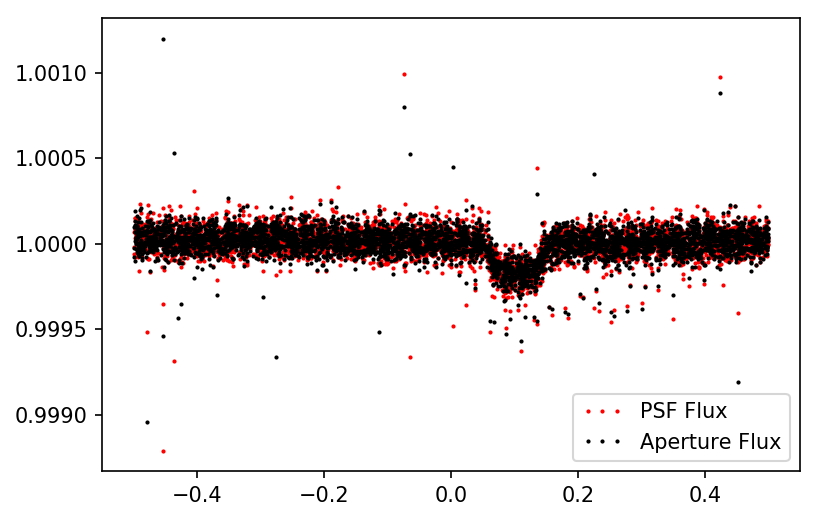

In [18]:
plt.plot(lc_psf.time, lc_psf.flux, 'ro', markersize=1, label='PSF Flux')
plt.plot(lc.time, lc.flux, 'ko', markersize=1, label='Aperture Flux')
plt.legend(numpoints=3)

I think that's ok for a pretty wrong model.